In [3]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers
import pathlib 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import shap

In [4]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install -q git+https://github.com/tensorflow/docs 

  Preparing metadata (setup.py) ... done


In [6]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [7]:
df = pd.read_csv('MVP_Candidates_.csv')
df.fillna(0)

,Unnamed: 0.1,Unnamed: 0,Player,Pos,Pos_No,Age,Tm,G,GS,Seed,...,6.FT+,6.TS+,6.FTr+,6.3PAr+,6.FG Add,6.TS Add,MVP,MVP Rank,MVP Share,Year
0,0,0,Nikola Jokić,C,5,26,DEN,74,74,10,...,105,117,144,55,230.9,286.9,1,1,0.875,2021-22
1,1,1,Joel Embiid,C,5,27,PHI,68,68,8,...,105,109,243,47,6.5,169.0,0,2,0.706,2021-22
2,2,2,Giannis Antetokounmpo,PF,4,27,MIL,67,67,7,...,93,112,248,49,125.1,211.1,0,3,0.595,2021-22
3,3,3,Devin Booker,SG,2,25,PHO,68,68,1,...,112,102,103,84,-4.1,32.6,0,4,0.216,2021-22
4,4,4,Luka Dončić,PG,1,22,DAL,65,65,5,...,96,101,140,102,-8.9,15.3,0,5,0.146,2021-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,481,481,Bernard King,SF,3,34,WSB,64,64,20,...,103,99,100,30,-38.6,-26.0,0,16,0.007,1990-91
481,482,482,Kenny Smith,PG,1,25,HOU,78,78,8,...,110,112,106,164,115.5,148.1,0,17,0.005,1990-91
482,483,483,Hakeem Olajuwon,C,5,28,HOU,56,50,8,...,101,103,90,5,39.4,31.8,0,18,0.004,1990-91
483,484,484,Tim Hardaway,PG,1,24,GSW,82,82,11,...,105,102,77,198,63.4,44.2,0,19,0.001,1990-91


In [23]:
'''
1990-91 to 1998-99
1999-00 to 2011-12
2012-13 to 2021-22
'''
e1 = ('2021-22', '2020-21', '2019-20', '2018-19', '2017-18', '2016-17', '2015-16', '2014-15', '2013-14', '2012-13')
e2 = ('2011-12', '2010-11', '2009-10', '2008-09', '2007-08', '2006-07', '2005-06', '2004-05', '2003-04', '2002-03', '2001-02','2000-01')
e3 = ('1999-00', '1998-99', '1997-98', '1996-97', '1995-96', '1994-95', '1993-94', '1992-93', '1991-92', '1990-91')


df1 = df[(df['Year'] == '2011-12') | (df['Year'] == '2010-11') | (df['Year'] == '2009-10') | (df['Year'] == '2008-09') | (df['Year'] == '2007-08') | (df['Year'] == '2006-07') | (df['Year'] == '2005-06') | (df['Year'] == '2004-05') | (df['Year'] == '2003-04') | (df['Year'] == '2002-03') | (df['Year'] == '2001-02')| (df['Year'] == '2000-01')]


In [24]:
df1

,Unnamed: 0.1,Unnamed: 0,Player,Pos,Pos_No,Age,Tm,G,GS,Seed,...,6.FT+,6.TS+,6.FTr+,6.3PAr+,6.FG Add,6.TS Add,MVP,MVP Rank,MVP Share,Year
129,130,130,LeBron James,SF,3,27,MIA,62,62,4,...,102,115,156,56,156.7,217.8,1,1,0.888,2011-12
130,131,131,Kevin Durant,SF,3,23,OKC,66,66,3,...,114,116,140,117,155.0,250.3,0,2,0.735,2011-12
131,132,132,Chris Paul,PG,1,26,LAC,60,60,9,...,114,110,123,106,61.6,110.7,0,3,0.318,2011-12
132,133,133,Kobe Bryant,SG,2,33,LAL,58,58,6,...,112,100,122,95,-67.1,-1.6,0,4,0.291,2011-12
133,134,134,Tony Parker,PG,1,29,SAS,60,60,2,...,106,102,116,30,0.6,25.0,0,5,0.274,2011-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,305,305,Paul Pierce,SF,3,23,BOS,82,82,20,...,100,109,158,149,90.2,167.6,0,13,0.004,2000-01
305,306,306,Jerry Stackhouse,SG,2,26,DET,80,80,21,...,110,101,136,144,-108.3,15.0,0,14,0.002,2000-01
306,307,307,Michael Finley,SF,3,27,DAL,82,82,5,...,104,101,68,100,45.3,9.5,0,15,0.001,2000-01
307,308,308,Anthony Mason,PF,4,34,MIA,80,80,9,...,104,107,161,0,17.8,85.9,0,15,0.001,2000-01


In [25]:
df1.drop(df1.columns[[0, 1]], axis = 1, inplace=True)
df1


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Player,Pos,Pos_No,Age,Tm,G,GS,Seed,Win %,1.MP,...,6.FT+,6.TS+,6.FTr+,6.3PAr+,6.FG Add,6.TS Add,MVP,MVP Rank,MVP Share,Year
129,LeBron James,SF,3,27,MIA,62,62,4,0.696970,2326,...,102,115,156,56,156.7,217.8,1,1,0.888,2011-12
130,Kevin Durant,SF,3,23,OKC,66,66,3,0.712121,2546,...,114,116,140,117,155.0,250.3,0,2,0.735,2011-12
131,Chris Paul,PG,1,26,LAC,60,60,9,0.606061,2181,...,114,110,123,106,61.6,110.7,0,3,0.318,2011-12
132,Kobe Bryant,SG,2,33,LAL,58,58,6,0.621212,2232,...,112,100,122,95,-67.1,-1.6,0,4,0.291,2011-12
133,Tony Parker,PG,1,29,SAS,60,60,2,0.757576,1923,...,106,102,116,30,0.6,25.0,0,5,0.274,2011-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,Paul Pierce,SF,3,23,BOS,82,82,20,0.439024,3120,...,100,109,158,149,90.2,167.6,0,13,0.004,2000-01
305,Jerry Stackhouse,SG,2,26,DET,80,80,21,0.390244,3215,...,110,101,136,144,-108.3,15.0,0,14,0.002,2000-01
306,Michael Finley,SF,3,27,DAL,82,82,5,0.646341,3443,...,104,101,68,100,45.3,9.5,0,15,0.001,2000-01
307,Anthony Mason,PF,4,34,MIA,80,80,9,0.609756,3254,...,104,107,161,0,17.8,85.9,0,15,0.001,2000-01


In [26]:
df1.to_csv('MedievalEra.csv', index=False)

In [27]:
def calc_metrics(y_test, y_pred):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return rmse, r2

In [28]:
seasons = ['2011-12', '2010-11', '2009-10', '2008-09', '2007-08', '2006-07', '2005-06', '2004-05', '2003-04', '2002-03', '2001-02','2000-01']

In [29]:
col_to_drop = []
for i in df1.columns:
    if i[0] == '3' or i[0] == '4':
        col_to_drop.append(i)

In [30]:
season_metrics = {season:[] for season in seasons}
all_results = pd.DataFrame(columns = ['Year', 'Player', 'MVP Share', 'MVP Rank', 'Predicted MVP Share'])

In [31]:
for season in seasons:
    
    training_data = df1[(df1['Year'] != season)].copy()
    train = training_data.drop(['Player', 'Pos', 'Tm', 'MVP', 'MVP Rank', 'MVP Share', 'Year'] + col_to_drop, axis=1)
    train_labels = training_data['MVP Share']

    train.fillna(0)

    scaler = StandardScaler()
    normed_train_data = scaler.fit_transform(train)


In [32]:
def build_model1_two_hidden_layers():
    # Keras model object created from Sequential class. This will be the container that contains all layers.
    model = Sequential()

    # The model so far is empty. It can be constructed by adding layers and compilation.
    # This is a Keras model wiTh multiple hidden layers.
    
    # Input Layer with 10 Neurons
    model.add(Dense(10, input_shape = (normed_train_data.shape[1],)))    # Input layer => input_shape must be mentioned
#     model.add(Activation('relu')) # relu or sigmoid.
    
    model.add(Dense(50,Activation('relu')))                         # Hidden layer 1 => only output dimension should be designated (output dimension = # of Neurons = 50)
    
    
    model.add(Dense(50, Activation('relu')))                         # Hidden layer 2 => only output dimension should be designated (output dimension = # of Neurons = 50)
    
    
    model.add(Dense(1))                          # Output layer => output dimension = 1 since it is a regression problem
    
    #Activation: sigmoid, softmax, tanh, relu, LeakyReLU. 
    #Optimizer: SGD, Adam, RMSProp
    learning_rate = 0.01
    optimizer = optimizers.RMSprop(learning_rate)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse', 'mape']) # for regression problems, mean squared error (MSE) is often employed
    
    return model

model = build_model1_two_hidden_layers()
print('summary of this model: ')
model.summary()    

summary of this model: 
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 10)                800       
                                                                 
 dense_12 (Dense)            (None, 50)                550       
                                                                 
 dense_13 (Dense)            (None, 50)                2550      
                                                                 
 dense_14 (Dense)            (None, 1)                 51        
                                                                 
Total params: 3,951
Trainable params: 3,951
Non-trainable params: 0
_________________________________________________________________


In [33]:
def build_model3_five_hidden_layers():
    # Keras model object created from Sequential class. This will be the container that contains all layers.
    model = Sequential()

    # The model so far is empty. It can be constructed by adding layers and compilation.
    # This Keras model with multiple hidden layers.
    
    # Input Layer with 32 Neurons
    model.add(Dense(32, input_shape = (normed_train_data.shape[1],)))    # Input layer => input_shape must be explicitly designated
#     model.add(Activation('relu')) # relu or sigmoid.
    
    model.add(Dense(64,Activation('relu')))                         # Hidden layer 1 => only output dimension should be designated (output dimension = # of Neurons = 64)
    
    
    model.add(Dense(64, Activation('relu')))                         # Hidden layer 2 => only output dimension should be designated (output dimension = # of Neurons = 64)
    
    
    model.add(Dense(64, Activation('relu')))                         # Hidden layer 3 => only output dimension should be designated (output dimension = # of Neurons = 64)
    
    
    model.add(Dense(64, Activation('relu')))                         # Hidden layer 4 => only output dimension should be designated (output dimension = # of Neurons = 64)
    
    
    model.add(Dense(64, Activation('relu')))                         # Hidden layer 5 => only output dimension should be designated (output dimension = # of Neurons = 64)

    
    model.add(Dense(1))                          # Output layer => output dimension = 1 since it is a regression problem
    
    # Activation: sigmoid, softmax, tanh, relu, LeakyReLU. 
    #Optimizer: SGD, Adam, RMSProp
    learning_rate = 0.01
    optimizer = optimizers.Adam(learning_rate)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse', 'mape']) # for regression problems, mean squared error (MSE) is often employed
    
    return model

model3 = build_model3_five_hidden_layers()
print('Here is a summary of this model: ')
model3.summary()

Here is a summary of this model: 
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 32)                2560      
                                                                 
 dense_16 (Dense)            (None, 64)                2112      
                                                                 
 dense_17 (Dense)            (None, 64)                4160      
                                                                 
 dense_18 (Dense)            (None, 64)                4160      
                                                                 
 dense_19 (Dense)            (None, 64)                4160      
                                                                 
 dense_20 (Dense)            (None, 64)                4160      
                                                                 
 dense_21 (Dense)   

In [34]:
example_batch = normed_train_data[:10] # take the first 10 data points from the training data.
example_result = model.predict(example_batch)
example_result

1/1 [==============================] - 0s 77ms/step


array([[-0.04768006],
       [-0.49159884],
       [-0.15302044],
       [-0.16079095],
       [-0.31727225],
       [-0.03093666],
       [-0.42369553],
       [-0.24854267],
       [-0.6660741 ],
       [-0.14477217]], dtype=float32)

In [35]:
checkpoint_path = r".\models\NBA_Prediction.ckpt"

# Create a callback that saves the model's weights
ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss',save_best_only=True,save_weights_only=True,verbose=0)

# epoch

In [36]:
for season in seasons:
  testing_data = df1[(df1['Year'] == season)].copy()
  test = testing_data.drop(['Player', 'Pos', 'Tm', 'MVP', 'MVP Rank', 'MVP Share', 'Year'] + col_to_drop, axis=1)
  test_labels = testing_data['MVP Share']

  test.fillna(0)
  scaler = StandardScaler()
  normed_test_data = scaler.fit_transform(test)

  EPOCHS = 80
  batch_size = 50

  model = build_model3_five_hidden_layers()
  print('Here is a summary of this model: ')
  model.summary()


  with tf.device('/CPU:0'): 
      history = model.fit(
          normed_train_data, 
          train_labels,
          batch_size = batch_size,
          epochs=EPOCHS, 
          verbose=1,
          shuffle=True,
          steps_per_epoch = int(normed_train_data.shape[0] / batch_size) ,
          callbacks=[tfdocs.modeling.EpochDots(), 
                  ckpt_callback
                    ],
          
      )
  Y_pred = model.predict(normed_test_data)

  rmse, r2 = calc_metrics(test_labels, Y_pred)

  season_metrics[season] += [rmse, r2]
  print(rmse,r2)

  initial_results = testing_data[['Year', 'Player', 'MVP Share', 'MVP Rank']]
  results = initial_results.copy()
  results['Predicted MVP Share'] = Y_pred
  results = results.sort_values('Predicted MVP Share', ascending=False).reset_index(drop=True)

  print(results)
  all_results = pd.concat([all_results, results])   


Here is a summary of this model: 
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 32)                2560      
                                                                 
 dense_23 (Dense)            (None, 64)                2112      
                                                                 
 dense_24 (Dense)            (None, 64)                4160      
                                                                 
 dense_25 (Dense)            (None, 64)                4160      
                                                                 
 dense_26 (Dense)            (None, 64)                4160      
                                                                 
 dense_27 (Dense)            (None, 64)                4160      
                                                                 
 dense_28 (Dense)   

3/3 [==============================] - 2s 14ms/step - loss: 0.2424 - mae: 0.3815 - mse: 0.2424 - mape: 6746.7432
Epoch 2/80
1/3 [=========>....................] - ETA: 0s - loss: 0.1156 - mae: 0.1788 - mse: 0.1156 - mape: 439.1772.

3/3 [==============================] - 0s 11ms/step - loss: 0.0984 - mae: 0.1946 - mse: 0.0984 - mape: 1156.0165
Epoch 3/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0475 - mae: 0.1256 - mse: 0.0475 - mape: 1438.2517.

3/3 [==============================] - 0s 10ms/step - loss: 0.0584 - mae: 0.1765 - mse: 0.0584 - mape: 3282.1785
Epoch 4/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0790 - mae: 0.2324 - mse: 0.0790 - mape: 2959.7476.

3/3 [==============================] - 0s 9ms/step - loss: 0.0557 - mae: 0.1892 - mse: 0.0557 - mape: 3265.7246
Epoch 5/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0534 - mae: 0.1377 - mse: 0.0534 - mape: 1339.7205.

3/3 [==============================] - 0s 10ms/step - loss: 0.0556 - mae: 0.1445 - mse: 0.0556 - mape: 1107.2655
Epoch 6/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0456 - mae: 0.1101 - mse: 0.0456 - mape: 678.6788.

3/3 [==============================] - 0s 10ms/step - loss: 0.0311 - mae: 0.1121 - mse: 0.0311 - mape: 1236.3545
Epoch 7/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0513 - mae: 0.1770 - mse: 0.0513 - mape: 1660.6530.

3/3 [==============================] - 0s 10ms/step - loss: 0.0384 - mae: 0.1456 - mse: 0.0384 - mape: 1500.9028
Epoch 8/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0223 - mae: 0.1015 - mse: 0.0223 - mape: 991.2134.

3/3 [==============================] - 0s 13ms/step - loss: 0.0293 - mae: 0.1111 - mse: 0.0293 - mape: 1067.7096
Epoch 9/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0336 - mae: 0.1051 - mse: 0.0336 - mape: 834.7101.

3/3 [==============================] - 0s 12ms/step - loss: 0.0281 - mae: 0.1080 - mse: 0.0281 - mape: 1126.8348
Epoch 10/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0136 - mae: 0.0927 - mse: 0.0136 - mape: 2008.1365.

3/3 [==============================] - 0s 12ms/step - loss: 0.0244 - mae: 0.1167 - mse: 0.0244 - mape: 1980.4218
Epoch 11/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0221 - mae: 0.1155 - mse: 0.0221 - mape: 1481.8666.

3/3 [==============================] - 0s 10ms/step - loss: 0.0231 - mae: 0.1062 - mse: 0.0231 - mape: 1183.8229
Epoch 12/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0175 - mae: 0.0948 - mse: 0.0175 - mape: 1337.5408.

3/3 [==============================] - 0s 9ms/step - loss: 0.0169 - mae: 0.0887 - mse: 0.0169 - mape: 1303.3057
Epoch 13/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0120 - mae: 0.0686 - mse: 0.0120 - mape: 688.2403.

3/3 [==============================] - 0s 10ms/step - loss: 0.0202 - mae: 0.0860 - mse: 0.0202 - mape: 673.5730
Epoch 14/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0095 - mae: 0.0603 - mse: 0.0095 - mape: 1011.9114.

3/3 [==============================] - 0s 10ms/step - loss: 0.0202 - mae: 0.0898 - mse: 0.0202 - mape: 759.3281
Epoch 15/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0129 - mae: 0.0746 - mse: 0.0129 - mape: 951.9185.

3/3 [==============================] - 0s 10ms/step - loss: 0.0211 - mae: 0.0861 - mse: 0.0211 - mape: 970.7552
Epoch 16/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0113 - mae: 0.0693 - mse: 0.0113 - mape: 408.0351.

3/3 [==============================] - 0s 11ms/step - loss: 0.0139 - mae: 0.0742 - mse: 0.0139 - mape: 425.2720
Epoch 17/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0283 - mae: 0.0984 - mse: 0.0283 - mape: 562.0668.

3/3 [==============================] - 0s 10ms/step - loss: 0.0223 - mae: 0.0908 - mse: 0.0223 - mape: 877.9188
Epoch 18/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0138 - mae: 0.0678 - mse: 0.0138 - mape: 387.6625.

3/3 [==============================] - 0s 11ms/step - loss: 0.0178 - mae: 0.0798 - mse: 0.0178 - mape: 644.1728
Epoch 19/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0142 - mae: 0.0824 - mse: 0.0142 - mape: 1269.9985.

3/3 [==============================] - 0s 10ms/step - loss: 0.0127 - mae: 0.0774 - mse: 0.0127 - mape: 1025.9596
Epoch 20/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0232 - mae: 0.0919 - mse: 0.0232 - mape: 904.5842.

3/3 [==============================] - 0s 11ms/step - loss: 0.0179 - mae: 0.0792 - mse: 0.0179 - mape: 690.0860
Epoch 21/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0094 - mae: 0.0602 - mse: 0.0094 - mape: 833.1099.

3/3 [==============================] - 0s 10ms/step - loss: 0.0114 - mae: 0.0689 - mse: 0.0114 - mape: 727.4540
Epoch 22/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0323 - mae: 0.1049 - mse: 0.0323 - mape: 235.1084.

3/3 [==============================] - 0s 8ms/step - loss: 0.0185 - mae: 0.0853 - mse: 0.0185 - mape: 810.5375
Epoch 23/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0129 - mae: 0.0817 - mse: 0.0129 - mape: 913.0793.

3/3 [==============================] - 0s 9ms/step - loss: 0.0114 - mae: 0.0768 - mse: 0.0114 - mape: 1335.7950
Epoch 24/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0090 - mae: 0.0676 - mse: 0.0090 - mape: 859.2671.

3/3 [==============================] - 0s 11ms/step - loss: 0.0160 - mae: 0.0824 - mse: 0.0160 - mape: 621.8118
Epoch 25/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0169 - mae: 0.0859 - mse: 0.0169 - mape: 840.3149.

3/3 [==============================] - 0s 8ms/step - loss: 0.0147 - mae: 0.0727 - mse: 0.0147 - mape: 816.8601
Epoch 26/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0533 - mae: 0.1332 - mse: 0.0533 - mape: 962.6777.

3/3 [==============================] - 0s 9ms/step - loss: 0.0134 - mae: 0.0698 - mse: 0.0134 - mape: 823.3912
Epoch 27/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0332 - mae: 0.0988 - mse: 0.0332 - mape: 616.3183.

3/3 [==============================] - 0s 10ms/step - loss: 0.0237 - mae: 0.0893 - mse: 0.0237 - mape: 821.6302
Epoch 28/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0433 - mae: 0.1267 - mse: 0.0433 - mape: 390.1125.

3/3 [==============================] - 0s 10ms/step - loss: 0.0353 - mae: 0.1155 - mse: 0.0353 - mape: 750.7117
Epoch 29/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0317 - mae: 0.1067 - mse: 0.0317 - mape: 636.4874.

3/3 [==============================] - 0s 11ms/step - loss: 0.0292 - mae: 0.1009 - mse: 0.0292 - mape: 703.3701
Epoch 30/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0037 - mae: 0.0407 - mse: 0.0037 - mape: 576.6186.

3/3 [==============================] - 0s 9ms/step - loss: 0.0178 - mae: 0.0776 - mse: 0.0178 - mape: 547.6303
Epoch 31/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0290 - mae: 0.0883 - mse: 0.0290 - mape: 923.2835.

3/3 [==============================] - 0s 9ms/step - loss: 0.0220 - mae: 0.0817 - mse: 0.0220 - mape: 926.6276
Epoch 32/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0223 - mae: 0.0861 - mse: 0.0223 - mape: 459.5813.

3/3 [==============================] - 0s 12ms/step - loss: 0.0181 - mae: 0.0890 - mse: 0.0181 - mape: 970.0835
Epoch 33/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0196 - mae: 0.0937 - mse: 0.0196 - mape: 1152.9198.

3/3 [==============================] - 0s 12ms/step - loss: 0.0150 - mae: 0.0802 - mse: 0.0150 - mape: 982.9606
Epoch 34/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0070 - mae: 0.0609 - mse: 0.0070 - mape: 687.5864.

3/3 [==============================] - 0s 9ms/step - loss: 0.0135 - mae: 0.0739 - mse: 0.0135 - mape: 891.3099
Epoch 35/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0104 - mae: 0.0605 - mse: 0.0104 - mape: 776.0430.

3/3 [==============================] - 0s 10ms/step - loss: 0.0095 - mae: 0.0554 - mse: 0.0095 - mape: 838.7738
Epoch 36/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0104 - mae: 0.0646 - mse: 0.0104 - mape: 402.2899.

3/3 [==============================] - 0s 9ms/step - loss: 0.0112 - mae: 0.0669 - mse: 0.0112 - mape: 459.6347
Epoch 37/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0119 - mae: 0.0661 - mse: 0.0119 - mape: 891.9083.

3/3 [==============================] - 0s 13ms/step - loss: 0.0089 - mae: 0.0580 - mse: 0.0089 - mape: 725.5480
Epoch 38/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0229 - mae: 0.0845 - mse: 0.0229 - mape: 681.2764.

3/3 [==============================] - 0s 11ms/step - loss: 0.0119 - mae: 0.0693 - mse: 0.0119 - mape: 857.5317
Epoch 39/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0111 - mae: 0.0680 - mse: 0.0111 - mape: 753.4801.

3/3 [==============================] - 0s 10ms/step - loss: 0.0092 - mae: 0.0623 - mse: 0.0092 - mape: 553.0117
Epoch 40/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0057 - mae: 0.0504 - mse: 0.0057 - mape: 744.8276.

3/3 [==============================] - 0s 11ms/step - loss: 0.0083 - mae: 0.0561 - mse: 0.0083 - mape: 967.8817
Epoch 41/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0056 - mae: 0.0454 - mse: 0.0056 - mape: 528.9560.

3/3 [==============================] - 0s 10ms/step - loss: 0.0059 - mae: 0.0472 - mse: 0.0059 - mape: 530.5474
Epoch 42/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0032 - mae: 0.0411 - mse: 0.0032 - mape: 247.9434.

3/3 [==============================] - 0s 8ms/step - loss: 0.0053 - mae: 0.0440 - mse: 0.0053 - mape: 427.0821
Epoch 43/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0055 - mae: 0.0494 - mse: 0.0055 - mape: 492.7598.

3/3 [==============================] - 0s 11ms/step - loss: 0.0047 - mae: 0.0431 - mse: 0.0047 - mape: 804.0507
Epoch 44/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0047 - mae: 0.0401 - mse: 0.0047 - mape: 202.8405.

3/3 [==============================] - 0s 8ms/step - loss: 0.0041 - mae: 0.0412 - mse: 0.0041 - mape: 392.3543
Epoch 45/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0044 - mae: 0.0383 - mse: 0.0044 - mape: 393.6890.

3/3 [==============================] - 0s 8ms/step - loss: 0.0042 - mae: 0.0413 - mse: 0.0042 - mape: 472.2364
Epoch 46/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0066 - mae: 0.0511 - mse: 0.0066 - mape: 203.0457.

3/3 [==============================] - 0s 9ms/step - loss: 0.0036 - mae: 0.0392 - mse: 0.0036 - mape: 376.4620
Epoch 47/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0052 - mae: 0.0462 - mse: 0.0052 - mape: 511.1030.

3/3 [==============================] - 0s 8ms/step - loss: 0.0039 - mae: 0.0401 - mse: 0.0039 - mape: 576.3845
Epoch 48/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0058 - mae: 0.0392 - mse: 0.0058 - mape: 388.6412.

3/3 [==============================] - 0s 10ms/step - loss: 0.0067 - mae: 0.0421 - mse: 0.0067 - mape: 273.5861
Epoch 49/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0040 - mae: 0.0371 - mse: 0.0040 - mape: 383.2130.

3/3 [==============================] - 0s 14ms/step - loss: 0.0045 - mae: 0.0414 - mse: 0.0045 - mape: 345.8780
Epoch 50/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0026 - mae: 0.0385 - mse: 0.0026 - mape: 860.7809.

3/3 [==============================] - 0s 9ms/step - loss: 0.0031 - mae: 0.0357 - mse: 0.0031 - mape: 389.0942
Epoch 51/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0078 - mae: 0.0543 - mse: 0.0078 - mape: 474.4066.

3/3 [==============================] - 0s 9ms/step - loss: 0.0050 - mae: 0.0419 - mse: 0.0050 - mape: 414.7370
Epoch 52/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0085 - mae: 0.0533 - mse: 0.0085 - mape: 210.6537.

3/3 [==============================] - 0s 13ms/step - loss: 0.0053 - mae: 0.0412 - mse: 0.0053 - mape: 377.4828
Epoch 53/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0045 - mae: 0.0386 - mse: 0.0045 - mape: 356.0565.

3/3 [==============================] - 0s 14ms/step - loss: 0.0066 - mae: 0.0442 - mse: 0.0066 - mape: 386.3107
Epoch 54/80
1/3 [=========>....................] - ETA: 0s - loss: 6.7791e-04 - mae: 0.0206 - mse: 6.7791e-04 - mape: 645.7922.

3/3 [==============================] - 0s 12ms/step - loss: 0.0069 - mae: 0.0402 - mse: 0.0069 - mape: 291.5783   
Epoch 55/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0174 - mae: 0.0636 - mse: 0.0174 - mape: 704.0835.

3/3 [==============================] - 0s 11ms/step - loss: 0.0135 - mae: 0.0601 - mse: 0.0135 - mape: 817.4333
Epoch 56/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0048 - mae: 0.0475 - mse: 0.0048 - mape: 493.9728.

3/3 [==============================] - 0s 12ms/step - loss: 0.0051 - mae: 0.0515 - mse: 0.0051 - mape: 853.2866
Epoch 57/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0071 - mae: 0.0642 - mse: 0.0071 - mape: 824.4031.

3/3 [==============================] - 0s 12ms/step - loss: 0.0068 - mae: 0.0596 - mse: 0.0068 - mape: 867.6825
Epoch 58/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0077 - mae: 0.0606 - mse: 0.0077 - mape: 416.4581.

3/3 [==============================] - 0s 13ms/step - loss: 0.0104 - mae: 0.0770 - mse: 0.0104 - mape: 712.5020
Epoch 59/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0051 - mae: 0.0530 - mse: 0.0051 - mape: 1266.0173.

3/3 [==============================] - 0s 11ms/step - loss: 0.0102 - mae: 0.0612 - mse: 0.0102 - mape: 963.8289
Epoch 60/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0111 - mae: 0.0637 - mse: 0.0111 - mape: 458.1328.

3/3 [==============================] - 0s 11ms/step - loss: 0.0090 - mae: 0.0588 - mse: 0.0090 - mape: 424.3075
Epoch 61/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0069 - mae: 0.0591 - mse: 0.0069 - mape: 429.8645.

3/3 [==============================] - 0s 11ms/step - loss: 0.0047 - mae: 0.0443 - mse: 0.0047 - mape: 448.7365
Epoch 62/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0046 - mae: 0.0444 - mse: 0.0046 - mape: 663.4535.

3/3 [==============================] - 0s 11ms/step - loss: 0.0043 - mae: 0.0396 - mse: 0.0043 - mape: 333.3992
Epoch 63/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0099 - mae: 0.0535 - mse: 0.0099 - mape: 394.9564.

3/3 [==============================] - 0s 11ms/step - loss: 0.0062 - mae: 0.0448 - mse: 0.0062 - mape: 403.0627
Epoch 64/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0055 - mae: 0.0491 - mse: 0.0055 - mape: 925.0787.

3/3 [==============================] - 0s 11ms/step - loss: 0.0038 - mae: 0.0415 - mse: 0.0038 - mape: 694.5329
Epoch 65/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0023 - mae: 0.0274 - mse: 0.0023 - mape: 355.2469.

3/3 [==============================] - 0s 15ms/step - loss: 0.0050 - mae: 0.0385 - mse: 0.0050 - mape: 292.4817
Epoch 66/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0047 - mae: 0.0404 - mse: 0.0047 - mape: 127.8192.

3/3 [==============================] - 0s 17ms/step - loss: 0.0025 - mae: 0.0335 - mse: 0.0025 - mape: 401.0424
Epoch 67/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0037 - mae: 0.0415 - mse: 0.0037 - mape: 245.0596.

3/3 [==============================] - 0s 15ms/step - loss: 0.0048 - mae: 0.0467 - mse: 0.0048 - mape: 381.1836
Epoch 68/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0041 - mae: 0.0334 - mse: 0.0041 - mape: 565.1243.

3/3 [==============================] - 0s 12ms/step - loss: 0.0031 - mae: 0.0309 - mse: 0.0031 - mape: 442.5041
Epoch 69/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0018 - mae: 0.0277 - mse: 0.0018 - mape: 638.6909.

3/3 [==============================] - 0s 11ms/step - loss: 0.0042 - mae: 0.0377 - mse: 0.0042 - mape: 405.7636
Epoch 70/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0048 - mae: 0.0437 - mse: 0.0048 - mape: 367.9082.

3/3 [==============================] - 0s 14ms/step - loss: 0.0027 - mae: 0.0339 - mse: 0.0027 - mape: 235.4222
Epoch 71/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0034 - mae: 0.0351 - mse: 0.0034 - mape: 275.7948.

3/3 [==============================] - 0s 12ms/step - loss: 0.0038 - mae: 0.0367 - mse: 0.0038 - mape: 429.3220
Epoch 72/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0025 - mae: 0.0321 - mse: 0.0025 - mape: 155.9887.

3/3 [==============================] - 0s 11ms/step - loss: 0.0029 - mae: 0.0318 - mse: 0.0029 - mape: 238.9428
Epoch 73/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0032 - mae: 0.0332 - mse: 0.0032 - mape: 348.3606.

3/3 [==============================] - 0s 10ms/step - loss: 0.0041 - mae: 0.0403 - mse: 0.0041 - mape: 459.3497
Epoch 74/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0138 - mae: 0.0861 - mse: 0.0138 - mape: 573.4088.

3/3 [==============================] - 0s 13ms/step - loss: 0.0028 - mae: 0.0304 - mse: 0.0028 - mape: 232.1230
Epoch 75/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0023 - mae: 0.0298 - mse: 0.0023 - mape: 230.4484.

3/3 [==============================] - 0s 15ms/step - loss: 0.0023 - mae: 0.0296 - mse: 0.0023 - mape: 313.4293
Epoch 76/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0044 - mae: 0.0398 - mse: 0.0044 - mape: 389.1674.

3/3 [==============================] - 0s 14ms/step - loss: 0.0046 - mae: 0.0402 - mse: 0.0046 - mape: 443.1415
Epoch 77/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0024 - mae: 0.0332 - mse: 0.0024 - mape: 342.4960.

3/3 [==============================] - 0s 12ms/step - loss: 0.0025 - mae: 0.0325 - mse: 0.0025 - mape: 380.7415
Epoch 78/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0040 - mae: 0.0453 - mse: 0.0040 - mape: 369.9955.

3/3 [==============================] - 0s 12ms/step - loss: 0.0024 - mae: 0.0293 - mse: 0.0024 - mape: 254.5199
Epoch 79/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0027 - mae: 0.0337 - mse: 0.0027 - mape: 291.7882.

3/3 [==============================] - 0s 11ms/step - loss: 0.0026 - mae: 0.0304 - mse: 0.0026 - mape: 268.6586
Epoch 80/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0020 - mae: 0.0294 - mse: 0.0020 - mape: 321.5318.

1/1 [==============================] - 0s 85ms/step
0.14077702477504814 0.7396810050113031
       Year             Player  MVP Share  MVP Rank  Predicted MVP Share
0   2011-12       LeBron James      0.888         1             0.728308
1   2011-12       Kevin Durant      0.735         2             0.529360
2   2011-12        Kobe Bryant      0.291         4             0.451939
3   2011-12  Russell Westbrook      0.003        12             0.229846
4   2011-12      Dwight Howard      0.011         7             0.219770
5   2011-12        Tony Parker      0.274         5             0.109355
6   2011-12       Derrick Rose      0.004        11             0.097964
7   2011-12        Dwyane Wade      0.005        10             0.092751
8   2011-12         Chris Paul      0.318         3             0.071793
9   2011-12         Steve Nash      0.006         9             0.035576
10  2011-12        Rajon Rondo      0.010         8             0.017969
11  2011-12         Tim Duncan   

3/3 [==============================] - 1s 11ms/step - loss: 0.2519 - mae: 0.3798 - mse: 0.2519 - mape: 8308.0947
Epoch 2/80
1/3 [=========>....................] - ETA: 0s - loss: 0.1526 - mae: 0.2559 - mse: 0.1526 - mape: 1082.8469.

3/3 [==============================] - 0s 8ms/step - loss: 0.0677 - mae: 0.1767 - mse: 0.0677 - mape: 1906.0442
Epoch 3/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0439 - mae: 0.1690 - mse: 0.0439 - mape: 4022.1204.

3/3 [==============================] - 0s 10ms/step - loss: 0.0423 - mae: 0.1597 - mse: 0.0423 - mape: 2506.1028
Epoch 4/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0617 - mae: 0.1575 - mse: 0.0617 - mape: 1627.0400.

3/3 [==============================] - 0s 10ms/step - loss: 0.0443 - mae: 0.1261 - mse: 0.0443 - mape: 1043.1075
Epoch 5/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0615 - mae: 0.1374 - mse: 0.0615 - mape: 275.3831.

3/3 [==============================] - 0s 10ms/step - loss: 0.0379 - mae: 0.1169 - mse: 0.0379 - mape: 911.6677
Epoch 6/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0225 - mae: 0.1143 - mse: 0.0225 - mape: 1773.6896.

3/3 [==============================] - 0s 10ms/step - loss: 0.0296 - mae: 0.1216 - mse: 0.0296 - mape: 1751.3514
Epoch 7/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0206 - mae: 0.0981 - mse: 0.0206 - mape: 1054.3772.

3/3 [==============================] - 0s 10ms/step - loss: 0.0292 - mae: 0.1113 - mse: 0.0292 - mape: 1043.1393
Epoch 8/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0170 - mae: 0.0793 - mse: 0.0170 - mape: 737.9944.

3/3 [==============================] - 0s 10ms/step - loss: 0.0260 - mae: 0.0972 - mse: 0.0260 - mape: 677.3582
Epoch 9/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0092 - mae: 0.0640 - mse: 0.0092 - mape: 873.1472.

3/3 [==============================] - 0s 11ms/step - loss: 0.0286 - mae: 0.1003 - mse: 0.0286 - mape: 792.8517
Epoch 10/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0143 - mae: 0.0926 - mse: 0.0143 - mape: 701.0668.

3/3 [==============================] - 0s 13ms/step - loss: 0.0221 - mae: 0.1059 - mse: 0.0221 - mape: 1528.2762
Epoch 11/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0270 - mae: 0.1196 - mse: 0.0270 - mape: 1437.0923.

3/3 [==============================] - 0s 11ms/step - loss: 0.0296 - mae: 0.1147 - mse: 0.0296 - mape: 1166.6260
Epoch 12/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0160 - mae: 0.0930 - mse: 0.0160 - mape: 1277.6718.

3/3 [==============================] - 0s 11ms/step - loss: 0.0185 - mae: 0.0869 - mse: 0.0185 - mape: 882.7623
Epoch 13/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0089 - mae: 0.0602 - mse: 0.0089 - mape: 899.1572.

3/3 [==============================] - 0s 11ms/step - loss: 0.0177 - mae: 0.0878 - mse: 0.0177 - mape: 763.5904
Epoch 14/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0428 - mae: 0.1127 - mse: 0.0428 - mape: 1713.9231.

3/3 [==============================] - 0s 11ms/step - loss: 0.0215 - mae: 0.0895 - mse: 0.0215 - mape: 904.6367
Epoch 15/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0190 - mae: 0.0853 - mse: 0.0190 - mape: 695.8036.

3/3 [==============================] - 0s 11ms/step - loss: 0.0197 - mae: 0.0854 - mse: 0.0197 - mape: 854.3320
Epoch 16/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0292 - mae: 0.1158 - mse: 0.0292 - mape: 1076.7913.

3/3 [==============================] - 0s 12ms/step - loss: 0.0241 - mae: 0.1034 - mse: 0.0241 - mape: 1320.4277
Epoch 17/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0215 - mae: 0.0909 - mse: 0.0215 - mape: 1691.8875.

3/3 [==============================] - 0s 11ms/step - loss: 0.0191 - mae: 0.0848 - mse: 0.0191 - mape: 917.0949
Epoch 18/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0065 - mae: 0.0559 - mse: 0.0065 - mape: 564.5212.

3/3 [==============================] - 0s 15ms/step - loss: 0.0142 - mae: 0.0738 - mse: 0.0142 - mape: 632.0563
Epoch 19/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0162 - mae: 0.0711 - mse: 0.0162 - mape: 470.8754.

3/3 [==============================] - 0s 12ms/step - loss: 0.0174 - mae: 0.0797 - mse: 0.0174 - mape: 567.9788
Epoch 20/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0186 - mae: 0.1006 - mse: 0.0186 - mape: 1087.6946.

3/3 [==============================] - 0s 13ms/step - loss: 0.0165 - mae: 0.0863 - mse: 0.0165 - mape: 1256.8684
Epoch 21/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0422 - mae: 0.1318 - mse: 0.0422 - mape: 784.7266.

3/3 [==============================] - 0s 12ms/step - loss: 0.0280 - mae: 0.1008 - mse: 0.0280 - mape: 603.4493
Epoch 22/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0067 - mae: 0.0491 - mse: 0.0067 - mape: 174.9656.

3/3 [==============================] - 0s 10ms/step - loss: 0.0246 - mae: 0.1018 - mse: 0.0246 - mape: 798.5542
Epoch 23/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0099 - mae: 0.0524 - mse: 0.0099 - mape: 619.2706.

3/3 [==============================] - 0s 11ms/step - loss: 0.0160 - mae: 0.0677 - mse: 0.0160 - mape: 584.7886
Epoch 24/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0193 - mae: 0.0845 - mse: 0.0193 - mape: 437.3707.

3/3 [==============================] - 0s 10ms/step - loss: 0.0160 - mae: 0.0767 - mse: 0.0160 - mape: 459.1545
Epoch 25/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0224 - mae: 0.0974 - mse: 0.0224 - mape: 710.1796.

3/3 [==============================] - 0s 30ms/step - loss: 0.0151 - mae: 0.0825 - mse: 0.0151 - mape: 1097.1287
Epoch 26/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0167 - mae: 0.0829 - mse: 0.0167 - mape: 319.0341.

3/3 [==============================] - 0s 23ms/step - loss: 0.0146 - mae: 0.0755 - mse: 0.0146 - mape: 377.4703
Epoch 27/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0161 - mae: 0.0734 - mse: 0.0161 - mape: 918.0787.

3/3 [==============================] - 0s 27ms/step - loss: 0.0126 - mae: 0.0687 - mse: 0.0126 - mape: 679.2958
Epoch 28/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0111 - mae: 0.0683 - mse: 0.0111 - mape: 871.1395.

3/3 [==============================] - 0s 13ms/step - loss: 0.0108 - mae: 0.0630 - mse: 0.0108 - mape: 691.2653
Epoch 29/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0083 - mae: 0.0572 - mse: 0.0083 - mape: 615.3274.

3/3 [==============================] - 0s 11ms/step - loss: 0.0085 - mae: 0.0551 - mse: 0.0085 - mape: 473.4356
Epoch 30/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0161 - mae: 0.0836 - mse: 0.0161 - mape: 1233.9957.

3/3 [==============================] - 0s 10ms/step - loss: 0.0089 - mae: 0.0573 - mse: 0.0089 - mape: 675.2040
Epoch 31/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0123 - mae: 0.0691 - mse: 0.0123 - mape: 644.0189.

3/3 [==============================] - 0s 10ms/step - loss: 0.0082 - mae: 0.0559 - mse: 0.0082 - mape: 560.9235
Epoch 32/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0067 - mae: 0.0465 - mse: 0.0067 - mape: 294.6320.

3/3 [==============================] - 0s 10ms/step - loss: 0.0082 - mae: 0.0519 - mse: 0.0082 - mape: 326.4209
Epoch 33/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0100 - mae: 0.0604 - mse: 0.0100 - mape: 592.3735.

3/3 [==============================] - 0s 10ms/step - loss: 0.0086 - mae: 0.0594 - mse: 0.0086 - mape: 600.6220
Epoch 34/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0012 - mae: 0.0227 - mse: 0.0012 - mape: 328.7732.

3/3 [==============================] - 0s 11ms/step - loss: 0.0051 - mae: 0.0417 - mse: 0.0051 - mape: 380.8416
Epoch 35/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0049 - mae: 0.0385 - mse: 0.0049 - mape: 258.6807.

3/3 [==============================] - 0s 11ms/step - loss: 0.0047 - mae: 0.0403 - mse: 0.0047 - mape: 318.6222
Epoch 36/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0024 - mae: 0.0286 - mse: 0.0024 - mape: 383.5854.

3/3 [==============================] - 0s 11ms/step - loss: 0.0049 - mae: 0.0388 - mse: 0.0049 - mape: 349.2787
Epoch 37/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0033 - mae: 0.0363 - mse: 0.0033 - mape: 967.0520.

3/3 [==============================] - 0s 11ms/step - loss: 0.0071 - mae: 0.0561 - mse: 0.0071 - mape: 1073.7745
Epoch 38/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0047 - mae: 0.0522 - mse: 0.0047 - mape: 396.3718.

3/3 [==============================] - 0s 11ms/step - loss: 0.0068 - mae: 0.0548 - mse: 0.0068 - mape: 593.9384
Epoch 39/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0085 - mae: 0.0670 - mse: 0.0085 - mape: 979.5916.

3/3 [==============================] - 0s 11ms/step - loss: 0.0069 - mae: 0.0574 - mse: 0.0069 - mape: 739.7980
Epoch 40/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0083 - mae: 0.0537 - mse: 0.0083 - mape: 360.1823.

3/3 [==============================] - 0s 11ms/step - loss: 0.0142 - mae: 0.0626 - mse: 0.0142 - mape: 344.6971
Epoch 41/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0046 - mae: 0.0420 - mse: 0.0046 - mape: 679.3506.

3/3 [==============================] - 0s 11ms/step - loss: 0.0053 - mae: 0.0472 - mse: 0.0053 - mape: 734.0486
Epoch 42/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0074 - mae: 0.0631 - mse: 0.0074 - mape: 47.0693.

3/3 [==============================] - 0s 21ms/step - loss: 0.0069 - mae: 0.0524 - mse: 0.0069 - mape: 499.4772
Epoch 43/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0071 - mae: 0.0487 - mse: 0.0071 - mape: 444.8626.

3/3 [==============================] - 0s 16ms/step - loss: 0.0098 - mae: 0.0582 - mse: 0.0098 - mape: 481.1128
Epoch 44/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0031 - mae: 0.0346 - mse: 0.0031 - mape: 333.8263.

3/3 [==============================] - 0s 42ms/step - loss: 0.0057 - mae: 0.0470 - mse: 0.0057 - mape: 582.9291
Epoch 45/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0059 - mae: 0.0571 - mse: 0.0059 - mape: 876.8795.

3/3 [==============================] - 0s 27ms/step - loss: 0.0061 - mae: 0.0539 - mse: 0.0061 - mape: 797.5133
Epoch 46/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0038 - mae: 0.0450 - mse: 0.0038 - mape: 1137.3119.

3/3 [==============================] - 0s 12ms/step - loss: 0.0048 - mae: 0.0474 - mse: 0.0048 - mape: 688.6208
Epoch 47/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0028 - mae: 0.0330 - mse: 0.0028 - mape: 274.7788.

3/3 [==============================] - 0s 10ms/step - loss: 0.0057 - mae: 0.0476 - mse: 0.0057 - mape: 573.4144
Epoch 48/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0054 - mae: 0.0473 - mse: 0.0054 - mape: 647.8664.

3/3 [==============================] - 0s 12ms/step - loss: 0.0036 - mae: 0.0375 - mse: 0.0036 - mape: 542.9650
Epoch 49/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0104 - mae: 0.0618 - mse: 0.0104 - mape: 231.2047.

3/3 [==============================] - 0s 11ms/step - loss: 0.0057 - mae: 0.0423 - mse: 0.0057 - mape: 217.9415
Epoch 50/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0015 - mae: 0.0217 - mse: 0.0015 - mape: 192.0175.

3/3 [==============================] - 0s 11ms/step - loss: 0.0112 - mae: 0.0577 - mse: 0.0112 - mape: 388.3596
Epoch 51/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0035 - mae: 0.0349 - mse: 0.0035 - mape: 338.9499.

3/3 [==============================] - 0s 10ms/step - loss: 0.0081 - mae: 0.0511 - mse: 0.0081 - mape: 293.3300
Epoch 52/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0073 - mae: 0.0396 - mse: 0.0073 - mape: 506.0470.

3/3 [==============================] - 0s 10ms/step - loss: 0.0098 - mae: 0.0542 - mse: 0.0098 - mape: 399.4420
Epoch 53/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0229 - mae: 0.0991 - mse: 0.0229 - mape: 570.7380.

3/3 [==============================] - 0s 11ms/step - loss: 0.0128 - mae: 0.0647 - mse: 0.0128 - mape: 656.6891
Epoch 54/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0074 - mae: 0.0532 - mse: 0.0074 - mape: 235.8503.

3/3 [==============================] - 0s 11ms/step - loss: 0.0201 - mae: 0.0734 - mse: 0.0201 - mape: 335.5457
Epoch 55/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0342 - mae: 0.1143 - mse: 0.0342 - mape: 1282.4800.

3/3 [==============================] - 0s 10ms/step - loss: 0.0219 - mae: 0.0914 - mse: 0.0219 - mape: 1369.5238
Epoch 56/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0205 - mae: 0.0792 - mse: 0.0205 - mape: 1094.5503.

3/3 [==============================] - 0s 11ms/step - loss: 0.0142 - mae: 0.0710 - mse: 0.0142 - mape: 795.1932
Epoch 57/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0133 - mae: 0.0670 - mse: 0.0133 - mape: 460.4062.

3/3 [==============================] - 0s 11ms/step - loss: 0.0095 - mae: 0.0618 - mse: 0.0095 - mape: 895.7136
Epoch 58/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0076 - mae: 0.0647 - mse: 0.0076 - mape: 825.9346.

3/3 [==============================] - 0s 10ms/step - loss: 0.0062 - mae: 0.0532 - mse: 0.0062 - mape: 695.9989
Epoch 59/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0129 - mae: 0.0638 - mse: 0.0129 - mape: 493.9577.

3/3 [==============================] - 0s 11ms/step - loss: 0.0175 - mae: 0.0774 - mse: 0.0175 - mape: 1278.4319
Epoch 60/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0220 - mae: 0.1128 - mse: 0.0220 - mape: 3354.6743.

3/3 [==============================] - 0s 10ms/step - loss: 0.0164 - mae: 0.0952 - mse: 0.0164 - mape: 2384.3716
Epoch 61/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0114 - mae: 0.0769 - mse: 0.0114 - mape: 2252.1091.

3/3 [==============================] - 0s 12ms/step - loss: 0.0131 - mae: 0.0781 - mse: 0.0131 - mape: 1658.1559
Epoch 62/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0103 - mae: 0.0697 - mse: 0.0103 - mape: 273.1100.

3/3 [==============================] - 0s 30ms/step - loss: 0.0086 - mae: 0.0656 - mse: 0.0086 - mape: 1462.1195
Epoch 63/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0085 - mae: 0.0530 - mse: 0.0085 - mape: 179.5461.

3/3 [==============================] - 0s 39ms/step - loss: 0.0078 - mae: 0.0572 - mse: 0.0078 - mape: 442.4338
Epoch 64/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0069 - mae: 0.0563 - mse: 0.0069 - mape: 1561.2200.

3/3 [==============================] - 0s 18ms/step - loss: 0.0055 - mae: 0.0515 - mse: 0.0055 - mape: 1136.8690
Epoch 65/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0060 - mae: 0.0524 - mse: 0.0060 - mape: 935.8828.

3/3 [==============================] - 0s 13ms/step - loss: 0.0055 - mae: 0.0529 - mse: 0.0055 - mape: 1169.1067
Epoch 66/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0045 - mae: 0.0473 - mse: 0.0045 - mape: 1194.5364.

3/3 [==============================] - 0s 13ms/step - loss: 0.0053 - mae: 0.0503 - mse: 0.0053 - mape: 1014.7856
Epoch 67/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0035 - mae: 0.0421 - mse: 0.0035 - mape: 623.8640.

3/3 [==============================] - 0s 24ms/step - loss: 0.0056 - mae: 0.0435 - mse: 0.0056 - mape: 519.6099
Epoch 68/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0038 - mae: 0.0350 - mse: 0.0038 - mape: 662.3669.

3/3 [==============================] - 0s 16ms/step - loss: 0.0044 - mae: 0.0351 - mse: 0.0044 - mape: 422.2744
Epoch 69/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0082 - mae: 0.0583 - mse: 0.0082 - mape: 291.3120.

3/3 [==============================] - 0s 16ms/step - loss: 0.0087 - mae: 0.0539 - mse: 0.0087 - mape: 355.9855
Epoch 70/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0129 - mae: 0.0755 - mse: 0.0129 - mape: 394.5034.

3/3 [==============================] - 0s 12ms/step - loss: 0.0269 - mae: 0.1091 - mse: 0.0269 - mape: 671.8633
Epoch 71/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0063 - mae: 0.0498 - mse: 0.0063 - mape: 708.5614.

3/3 [==============================] - 0s 19ms/step - loss: 0.0165 - mae: 0.0686 - mse: 0.0165 - mape: 483.1685
Epoch 72/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0365 - mae: 0.1029 - mse: 0.0365 - mape: 461.4022.

3/3 [==============================] - 0s 24ms/step - loss: 0.0421 - mae: 0.1149 - mse: 0.0421 - mape: 505.2348
Epoch 73/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0215 - mae: 0.0941 - mse: 0.0215 - mape: 1526.8772.

3/3 [==============================] - 0s 21ms/step - loss: 0.0236 - mae: 0.1009 - mse: 0.0236 - mape: 1579.3480
Epoch 74/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0265 - mae: 0.1111 - mse: 0.0265 - mape: 1780.9126.

3/3 [==============================] - 0s 19ms/step - loss: 0.0187 - mae: 0.0891 - mse: 0.0187 - mape: 1297.0966
Epoch 75/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0349 - mae: 0.1073 - mse: 0.0349 - mape: 642.9138.

3/3 [==============================] - 0s 18ms/step - loss: 0.0263 - mae: 0.0946 - mse: 0.0263 - mape: 683.0968
Epoch 76/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0390 - mae: 0.1129 - mse: 0.0390 - mape: 1051.3213.

3/3 [==============================] - 0s 23ms/step - loss: 0.0327 - mae: 0.1046 - mse: 0.0327 - mape: 1048.3617
Epoch 77/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0109 - mae: 0.0662 - mse: 0.0109 - mape: 1079.3550.

3/3 [==============================] - 0s 23ms/step - loss: 0.0148 - mae: 0.0772 - mse: 0.0148 - mape: 1113.4526
Epoch 78/80
1/3 [=========>....................] - ETA: 0s - loss: 0.1152 - mae: 0.2386 - mse: 0.1152 - mape: 1000.3240.

3/3 [==============================] - 0s 20ms/step - loss: 0.0305 - mae: 0.1141 - mse: 0.0305 - mape: 1508.2185
Epoch 79/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0106 - mae: 0.0794 - mse: 0.0106 - mape: 1909.7671.

3/3 [==============================] - 0s 13ms/step - loss: 0.0157 - mae: 0.0877 - mse: 0.0157 - mape: 1807.8146
Epoch 80/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0255 - mae: 0.1105 - mse: 0.0255 - mape: 1670.7009.

1/1 [==============================] - 0s 285ms/step
0.1743126029647753 0.6280720132890427
       Year             Player  MVP Share  MVP Rank  Predicted MVP Share
0   2010-11       LeBron James      0.431         3             0.650102
1   2010-11       Derrick Rose      0.977         1             0.625876
2   2010-11      Dwight Howard      0.531         2             0.351879
3   2010-11        Dwyane Wade      0.020         7             0.350216
4   2010-11       Kevin Durant      0.157         5             0.143822
5   2010-11        Kobe Bryant      0.354         4             0.112748
6   2010-11        Rajon Rondo      0.004        10             0.064157
7   2010-11      Dirk Nowitzki      0.093         6             0.059543
8   2010-11         Chris Paul      0.002        13             0.056726
9   2010-11      Manu Ginóbili      0.017         8             0.037668
10  2010-11  Amar'e Stoudemire      0.007         9            -0.035305
11  2010-11      Blake Griffin   

3/3 [==============================] - 6s 26ms/step - loss: 0.7121 - mae: 0.6363 - mse: 0.7121 - mape: 15764.3184
Epoch 2/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0667 - mae: 0.1756 - mse: 0.0667 - mape: 4715.7729.

3/3 [==============================] - 0s 17ms/step - loss: 0.0851 - mae: 0.1818 - mse: 0.0851 - mape: 2254.3391
Epoch 3/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0780 - mae: 0.2166 - mse: 0.0780 - mape: 4144.3428.

3/3 [==============================] - 0s 23ms/step - loss: 0.0622 - mae: 0.1971 - mse: 0.0622 - mape: 4241.1079
Epoch 4/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0742 - mae: 0.1811 - mse: 0.0742 - mape: 1248.5400.

3/3 [==============================] - 0s 20ms/step - loss: 0.0545 - mae: 0.1588 - mse: 0.0545 - mape: 2131.2556
Epoch 5/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0426 - mae: 0.1502 - mse: 0.0426 - mape: 2379.6433.

3/3 [==============================] - 0s 36ms/step - loss: 0.0417 - mae: 0.1485 - mse: 0.0417 - mape: 2094.1309
Epoch 6/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0387 - mae: 0.1312 - mse: 0.0387 - mape: 2015.1042.

3/3 [==============================] - 0s 28ms/step - loss: 0.0380 - mae: 0.1285 - mse: 0.0380 - mape: 1542.8741
Epoch 7/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0252 - mae: 0.1151 - mse: 0.0252 - mape: 1218.3871.

3/3 [==============================] - 0s 20ms/step - loss: 0.0286 - mae: 0.1246 - mse: 0.0286 - mape: 1376.7686
Epoch 8/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0230 - mae: 0.0974 - mse: 0.0230 - mape: 1481.3014.

3/3 [==============================] - 0s 19ms/step - loss: 0.0258 - mae: 0.1044 - mse: 0.0258 - mape: 1140.7993
Epoch 9/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0239 - mae: 0.1086 - mse: 0.0239 - mape: 1262.9829.

3/3 [==============================] - 0s 27ms/step - loss: 0.0215 - mae: 0.1006 - mse: 0.0215 - mape: 1375.9202
Epoch 10/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0426 - mae: 0.1674 - mse: 0.0426 - mape: 1235.2244.

3/3 [==============================] - 0s 29ms/step - loss: 0.0254 - mae: 0.1071 - mse: 0.0254 - mape: 929.9058
Epoch 11/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0454 - mae: 0.1235 - mse: 0.0454 - mape: 935.7524.

3/3 [==============================] - 0s 23ms/step - loss: 0.0281 - mae: 0.1049 - mse: 0.0281 - mape: 1564.1075
Epoch 12/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0143 - mae: 0.0926 - mse: 0.0143 - mape: 1194.6599.

3/3 [==============================] - 0s 24ms/step - loss: 0.0232 - mae: 0.1118 - mse: 0.0232 - mape: 1801.1229
Epoch 13/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0204 - mae: 0.1042 - mse: 0.0204 - mape: 1482.8265.

3/3 [==============================] - 0s 41ms/step - loss: 0.0186 - mae: 0.0921 - mse: 0.0186 - mape: 1214.9827
Epoch 14/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0280 - mae: 0.0990 - mse: 0.0280 - mape: 328.0187.

3/3 [==============================] - 0s 42ms/step - loss: 0.0178 - mae: 0.0823 - mse: 0.0178 - mape: 812.0181
Epoch 15/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0223 - mae: 0.1059 - mse: 0.0223 - mape: 1110.1669.

3/3 [==============================] - 0s 26ms/step - loss: 0.0161 - mae: 0.0862 - mse: 0.0161 - mape: 992.2104
Epoch 16/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0221 - mae: 0.1045 - mse: 0.0221 - mape: 1232.4609.

3/3 [==============================] - 0s 25ms/step - loss: 0.0215 - mae: 0.1027 - mse: 0.0215 - mape: 1315.7560
Epoch 17/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0250 - mae: 0.1050 - mse: 0.0250 - mape: 798.5553.

3/3 [==============================] - 0s 21ms/step - loss: 0.0269 - mae: 0.0993 - mse: 0.0269 - mape: 613.0618
Epoch 18/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0087 - mae: 0.0663 - mse: 0.0087 - mape: 2474.8855.

3/3 [==============================] - 0s 26ms/step - loss: 0.0145 - mae: 0.0886 - mse: 0.0145 - mape: 2001.7291
Epoch 19/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0138 - mae: 0.0914 - mse: 0.0138 - mape: 1899.8760.

3/3 [==============================] - 0s 30ms/step - loss: 0.0135 - mae: 0.0840 - mse: 0.0135 - mape: 1417.0385
Epoch 20/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0091 - mae: 0.0564 - mse: 0.0091 - mape: 458.8770.

3/3 [==============================] - 0s 18ms/step - loss: 0.0134 - mae: 0.0731 - mse: 0.0134 - mape: 474.6073
Epoch 21/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0073 - mae: 0.0548 - mse: 0.0073 - mape: 865.8356.

3/3 [==============================] - 0s 15ms/step - loss: 0.0126 - mae: 0.0724 - mse: 0.0126 - mape: 860.4010
Epoch 22/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0145 - mae: 0.0849 - mse: 0.0145 - mape: 670.0923.

3/3 [==============================] - 0s 31ms/step - loss: 0.0100 - mae: 0.0580 - mse: 0.0100 - mape: 450.8784
Epoch 23/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0266 - mae: 0.0792 - mse: 0.0266 - mape: 704.6569.

3/3 [==============================] - 0s 24ms/step - loss: 0.0159 - mae: 0.0675 - mse: 0.0159 - mape: 760.1257
Epoch 24/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0272 - mae: 0.0926 - mse: 0.0272 - mape: 505.3842.

3/3 [==============================] - 0s 34ms/step - loss: 0.0220 - mae: 0.0840 - mse: 0.0220 - mape: 964.1082
Epoch 25/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0152 - mae: 0.0806 - mse: 0.0152 - mape: 729.6299.

3/3 [==============================] - 0s 30ms/step - loss: 0.0098 - mae: 0.0656 - mse: 0.0098 - mape: 951.4464
Epoch 26/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0067 - mae: 0.0535 - mse: 0.0067 - mape: 578.6016.

3/3 [==============================] - 0s 37ms/step - loss: 0.0113 - mae: 0.0666 - mse: 0.0113 - mape: 1082.0862
Epoch 27/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0165 - mae: 0.0665 - mse: 0.0165 - mape: 579.8237.

3/3 [==============================] - 0s 28ms/step - loss: 0.0136 - mae: 0.0680 - mse: 0.0136 - mape: 623.6499
Epoch 28/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0154 - mae: 0.0786 - mse: 0.0154 - mape: 1469.3779.

3/3 [==============================] - 0s 16ms/step - loss: 0.0106 - mae: 0.0684 - mse: 0.0106 - mape: 1114.9984
Epoch 29/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0067 - mae: 0.0509 - mse: 0.0067 - mape: 772.3373.

3/3 [==============================] - 0s 13ms/step - loss: 0.0081 - mae: 0.0600 - mse: 0.0081 - mape: 698.2826
Epoch 30/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0241 - mae: 0.0852 - mse: 0.0241 - mape: 1093.0499.

3/3 [==============================] - 0s 16ms/step - loss: 0.0106 - mae: 0.0698 - mse: 0.0106 - mape: 915.1434
Epoch 31/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0177 - mae: 0.0796 - mse: 0.0177 - mape: 1321.6692.

3/3 [==============================] - 0s 12ms/step - loss: 0.0133 - mae: 0.0719 - mse: 0.0133 - mape: 903.6178
Epoch 32/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0201 - mae: 0.0926 - mse: 0.0201 - mape: 568.0674.

3/3 [==============================] - 0s 24ms/step - loss: 0.0188 - mae: 0.0860 - mse: 0.0188 - mape: 506.6120
Epoch 33/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0090 - mae: 0.0761 - mse: 0.0090 - mape: 1761.5759.

3/3 [==============================] - 0s 21ms/step - loss: 0.0193 - mae: 0.0955 - mse: 0.0193 - mape: 1392.4752
Epoch 34/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0050 - mae: 0.0465 - mse: 0.0050 - mape: 960.9073.

3/3 [==============================] - 0s 25ms/step - loss: 0.0148 - mae: 0.0743 - mse: 0.0148 - mape: 674.7889
Epoch 35/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0186 - mae: 0.0759 - mse: 0.0186 - mape: 728.9257.

3/3 [==============================] - 0s 28ms/step - loss: 0.0157 - mae: 0.0752 - mse: 0.0157 - mape: 847.2290
Epoch 36/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0081 - mae: 0.0652 - mse: 0.0081 - mape: 1093.1967.

3/3 [==============================] - 0s 30ms/step - loss: 0.0113 - mae: 0.0719 - mse: 0.0113 - mape: 1252.9919
Epoch 37/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0030 - mae: 0.0384 - mse: 0.0030 - mape: 449.4221.

3/3 [==============================] - 0s 26ms/step - loss: 0.0130 - mae: 0.0620 - mse: 0.0130 - mape: 492.5078
Epoch 38/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0021 - mae: 0.0346 - mse: 0.0021 - mape: 242.3847.

3/3 [==============================] - 0s 24ms/step - loss: 0.0084 - mae: 0.0558 - mse: 0.0084 - mape: 714.3104
Epoch 39/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0065 - mae: 0.0696 - mse: 0.0065 - mape: 1820.3779.

3/3 [==============================] - 0s 15ms/step - loss: 0.0076 - mae: 0.0617 - mse: 0.0076 - mape: 1453.2667
Epoch 40/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0075 - mae: 0.0510 - mse: 0.0075 - mape: 303.5259.

3/3 [==============================] - 0s 22ms/step - loss: 0.0082 - mae: 0.0596 - mse: 0.0082 - mape: 374.2791
Epoch 41/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0064 - mae: 0.0559 - mse: 0.0064 - mape: 596.0198.

3/3 [==============================] - 0s 33ms/step - loss: 0.0064 - mae: 0.0497 - mse: 0.0064 - mape: 528.5233
Epoch 42/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0091 - mae: 0.0681 - mse: 0.0091 - mape: 463.1509.

3/3 [==============================] - 0s 18ms/step - loss: 0.0071 - mae: 0.0530 - mse: 0.0071 - mape: 584.0496
Epoch 43/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0107 - mae: 0.0638 - mse: 0.0107 - mape: 766.6622.

3/3 [==============================] - 0s 20ms/step - loss: 0.0077 - mae: 0.0557 - mse: 0.0077 - mape: 710.8730
Epoch 44/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0052 - mae: 0.0493 - mse: 0.0052 - mape: 939.5310.

3/3 [==============================] - 0s 18ms/step - loss: 0.0055 - mae: 0.0481 - mse: 0.0055 - mape: 593.1428
Epoch 45/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0052 - mae: 0.0475 - mse: 0.0052 - mape: 214.5092.

3/3 [==============================] - 0s 18ms/step - loss: 0.0044 - mae: 0.0434 - mse: 0.0044 - mape: 422.2260
Epoch 46/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0074 - mae: 0.0530 - mse: 0.0074 - mape: 850.3496.

3/3 [==============================] - 0s 18ms/step - loss: 0.0044 - mae: 0.0397 - mse: 0.0044 - mape: 427.7558
Epoch 47/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0028 - mae: 0.0348 - mse: 0.0028 - mape: 368.4318.

3/3 [==============================] - 0s 28ms/step - loss: 0.0034 - mae: 0.0385 - mse: 0.0034 - mape: 329.7773
Epoch 48/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0052 - mae: 0.0432 - mse: 0.0052 - mape: 279.3370.

3/3 [==============================] - 0s 16ms/step - loss: 0.0037 - mae: 0.0392 - mse: 0.0037 - mape: 530.4968
Epoch 49/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0021 - mae: 0.0335 - mse: 0.0021 - mape: 481.0002.

3/3 [==============================] - 0s 15ms/step - loss: 0.0033 - mae: 0.0347 - mse: 0.0033 - mape: 410.9053
Epoch 50/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0022 - mae: 0.0297 - mse: 0.0022 - mape: 119.1808.

3/3 [==============================] - 0s 28ms/step - loss: 0.0040 - mae: 0.0413 - mse: 0.0040 - mape: 444.9162
Epoch 51/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0026 - mae: 0.0341 - mse: 0.0026 - mape: 426.9615.

3/3 [==============================] - 0s 11ms/step - loss: 0.0029 - mae: 0.0359 - mse: 0.0029 - mape: 304.0185
Epoch 52/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0021 - mae: 0.0271 - mse: 0.0021 - mape: 287.5781.

3/3 [==============================] - 0s 16ms/step - loss: 0.0022 - mae: 0.0299 - mse: 0.0022 - mape: 329.6350
Epoch 53/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0027 - mae: 0.0352 - mse: 0.0027 - mape: 217.0859.

3/3 [==============================] - 0s 24ms/step - loss: 0.0029 - mae: 0.0348 - mse: 0.0029 - mape: 375.9108
Epoch 54/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0019 - mae: 0.0360 - mse: 0.0019 - mape: 646.7910.

3/3 [==============================] - 0s 19ms/step - loss: 0.0018 - mae: 0.0293 - mse: 0.0018 - mape: 426.1682
Epoch 55/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0035 - mae: 0.0379 - mse: 0.0035 - mape: 394.3179.

3/3 [==============================] - 0s 29ms/step - loss: 0.0024 - mae: 0.0316 - mse: 0.0024 - mape: 325.9803
Epoch 56/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0018 - mae: 0.0300 - mse: 0.0018 - mape: 591.8812.

3/3 [==============================] - 0s 19ms/step - loss: 0.0025 - mae: 0.0353 - mse: 0.0025 - mape: 723.0528
Epoch 57/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0012 - mae: 0.0260 - mse: 0.0012 - mape: 574.8677.

3/3 [==============================] - 0s 28ms/step - loss: 0.0014 - mae: 0.0260 - mse: 0.0014 - mape: 366.8004
Epoch 58/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0039 - mae: 0.0427 - mse: 0.0039 - mape: 286.4240.

3/3 [==============================] - 0s 18ms/step - loss: 0.0028 - mae: 0.0376 - mse: 0.0028 - mape: 403.9182
Epoch 59/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0024 - mae: 0.0314 - mse: 0.0024 - mape: 504.1631.

3/3 [==============================] - 0s 18ms/step - loss: 0.0020 - mae: 0.0301 - mse: 0.0020 - mape: 399.1620
Epoch 60/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0015 - mae: 0.0261 - mse: 0.0015 - mape: 240.1270.

3/3 [==============================] - 0s 18ms/step - loss: 0.0019 - mae: 0.0287 - mse: 0.0019 - mape: 292.5211
Epoch 61/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0014 - mae: 0.0272 - mse: 0.0014 - mape: 309.9948.

3/3 [==============================] - 0s 20ms/step - loss: 0.0011 - mae: 0.0226 - mse: 0.0011 - mape: 292.3048
Epoch 62/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0016 - mae: 0.0308 - mse: 0.0016 - mape: 356.7542.

3/3 [==============================] - 0s 20ms/step - loss: 9.8209e-04 - mae: 0.0209 - mse: 9.8209e-04 - mape: 232.6479
Epoch 63/80
1/3 [=========>....................] - ETA: 0s - loss: 6.1735e-04 - mae: 0.0172 - mse: 6.1735e-04 - mape: 180.5350.

3/3 [==============================] - 0s 16ms/step - loss: 7.3577e-04 - mae: 0.0177 - mse: 7.3577e-04 - mape: 198.9033
Epoch 64/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0010 - mae: 0.0209 - mse: 0.0010 - mape: 98.3233.

3/3 [==============================] - 0s 20ms/step - loss: 7.7597e-04 - mae: 0.0179 - mse: 7.7597e-04 - mape: 165.4499
Epoch 65/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0021 - mae: 0.0254 - mse: 0.0021 - mape: 200.7782.

3/3 [==============================] - 0s 24ms/step - loss: 0.0010 - mae: 0.0188 - mse: 0.0010 - mape: 224.4785
Epoch 66/80
1/3 [=========>....................] - ETA: 0s - loss: 5.6673e-04 - mae: 0.0171 - mse: 5.6673e-04 - mape: 40.4955.

3/3 [==============================] - 0s 10ms/step - loss: 6.4792e-04 - mae: 0.0168 - mse: 6.4792e-04 - mape: 207.0768
Epoch 67/80
1/3 [=========>....................] - ETA: 0s - loss: 6.7352e-04 - mae: 0.0176 - mse: 6.7352e-04 - mape: 199.2494.

3/3 [==============================] - 0s 11ms/step - loss: 6.0516e-04 - mae: 0.0156 - mse: 6.0516e-04 - mape: 180.8288
Epoch 68/80
1/3 [=========>....................] - ETA: 0s - loss: 7.2601e-04 - mae: 0.0163 - mse: 7.2601e-04 - mape: 177.4964.

3/3 [==============================] - 0s 23ms/step - loss: 8.5441e-04 - mae: 0.0169 - mse: 8.5441e-04 - mape: 159.8857
Epoch 69/80
1/3 [=========>....................] - ETA: 0s - loss: 5.4707e-04 - mae: 0.0172 - mse: 5.4707e-04 - mape: 188.4411.

3/3 [==============================] - 0s 29ms/step - loss: 8.4541e-04 - mae: 0.0193 - mse: 8.4541e-04 - mape: 197.0268
Epoch 70/80
1/3 [=========>....................] - ETA: 0s - loss: 1.0111e-04 - mae: 0.0071 - mse: 1.0111e-04 - mape: 210.9894.

3/3 [==============================] - 0s 26ms/step - loss: 0.0011 - mae: 0.0209 - mse: 0.0011 - mape: 155.0194   
Epoch 71/80
1/3 [=========>....................] - ETA: 0s - loss: 9.8546e-04 - mae: 0.0213 - mse: 9.8546e-04 - mape: 218.0065.

3/3 [==============================] - 0s 20ms/step - loss: 8.5540e-04 - mae: 0.0182 - mse: 8.5540e-04 - mape: 254.2021
Epoch 72/80
1/3 [=========>....................] - ETA: 0s - loss: 9.2802e-04 - mae: 0.0190 - mse: 9.2802e-04 - mape: 165.4456.

3/3 [==============================] - 0s 21ms/step - loss: 0.0010 - mae: 0.0206 - mse: 0.0010 - mape: 164.6971   
Epoch 73/80
1/3 [=========>....................] - ETA: 0s - loss: 7.7169e-04 - mae: 0.0189 - mse: 7.7169e-04 - mape: 155.5961.

3/3 [==============================] - 0s 22ms/step - loss: 4.9680e-04 - mae: 0.0137 - mse: 4.9680e-04 - mape: 150.2416
Epoch 74/80
1/3 [=========>....................] - ETA: 0s - loss: 2.9778e-04 - mae: 0.0126 - mse: 2.9778e-04 - mape: 139.2923.

3/3 [==============================] - 0s 35ms/step - loss: 4.5212e-04 - mae: 0.0145 - mse: 4.5212e-04 - mape: 180.8907
Epoch 75/80
1/3 [=========>....................] - ETA: 0s - loss: 7.9898e-04 - mae: 0.0165 - mse: 7.9898e-04 - mape: 143.4851.

3/3 [==============================] - 0s 19ms/step - loss: 6.2272e-04 - mae: 0.0147 - mse: 6.2272e-04 - mape: 132.4257
Epoch 76/80
1/3 [=========>....................] - ETA: 0s - loss: 5.6138e-04 - mae: 0.0138 - mse: 5.6138e-04 - mape: 153.0465.

3/3 [==============================] - 0s 23ms/step - loss: 4.3082e-04 - mae: 0.0127 - mse: 4.3082e-04 - mape: 178.2488
Epoch 77/80
1/3 [=========>....................] - ETA: 0s - loss: 3.8389e-04 - mae: 0.0132 - mse: 3.8389e-04 - mape: 191.3206.

3/3 [==============================] - 0s 16ms/step - loss: 5.4252e-04 - mae: 0.0142 - mse: 5.4252e-04 - mape: 152.1922
Epoch 78/80
1/3 [=========>....................] - ETA: 0s - loss: 1.8529e-04 - mae: 0.0102 - mse: 1.8529e-04 - mape: 220.6216.

3/3 [==============================] - 0s 22ms/step - loss: 6.7491e-04 - mae: 0.0175 - mse: 6.7491e-04 - mape: 142.4254
Epoch 79/80
1/3 [=========>....................] - ETA: 0s - loss: 2.2996e-04 - mae: 0.0102 - mse: 2.2996e-04 - mape: 141.0005.

3/3 [==============================] - 0s 23ms/step - loss: 4.7434e-04 - mae: 0.0135 - mse: 4.7434e-04 - mape: 174.3317
Epoch 80/80
1/3 [=========>....................] - ETA: 0s - loss: 3.6190e-04 - mae: 0.0117 - mse: 3.6190e-04 - mape: 217.9757.

3/3 [==============================] - 0s 16ms/step - loss: 4.1308e-04 - mae: 0.0125 - mse: 4.1308e-04 - mape: 157.3011


1/1 [==============================] - 0s 197ms/step
0.07285856003221965 0.931265902709791
       Year             Player  MVP Share  MVP Rank  Predicted MVP Share
0   2009-10       LeBron James      0.980         1             1.008539
1   2009-10      Dwight Howard      0.389         4             0.541528
2   2009-10       Kevin Durant      0.495         2             0.453094
3   2009-10        Kobe Bryant      0.487         3             0.277973
4   2009-10        Dwyane Wade      0.097         5             0.152744
5   2009-10    Carmelo Anthony      0.053         6             0.132419
6   2009-10         Steve Nash      0.040         8             0.060124
7   2009-10      Dirk Nowitzki      0.045         7             0.031155
8   2009-10         Chris Bosh      0.001        12             0.006563
9   2009-10     Deron Williams      0.006         9             0.006073
10  2009-10   Chauncey Billups      0.001        12             0.005378
11  2009-10    Stephen Jackson   

3/3 [==============================] - 2s 13ms/step - loss: 0.3742 - mae: 0.4786 - mse: 0.3742 - mape: 13695.3887
Epoch 2/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0268 - mae: 0.0991 - mse: 0.0268 - mape: 868.8698.

3/3 [==============================] - 0s 10ms/step - loss: 0.0751 - mae: 0.1491 - mse: 0.0751 - mape: 889.2771
Epoch 3/80
1/3 [=========>....................] - ETA: 0s - loss: 0.1231 - mae: 0.2190 - mse: 0.1231 - mape: 1609.8845.

3/3 [==============================] - 0s 11ms/step - loss: 0.0983 - mae: 0.2205 - mse: 0.0983 - mape: 3139.2266
Epoch 4/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0605 - mae: 0.2113 - mse: 0.0605 - mape: 3993.6621.

3/3 [==============================] - 0s 13ms/step - loss: 0.0526 - mae: 0.1852 - mse: 0.0526 - mape: 3824.7676
Epoch 5/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0369 - mae: 0.1334 - mse: 0.0369 - mape: 1966.9878.

3/3 [==============================] - 0s 12ms/step - loss: 0.0455 - mae: 0.1449 - mse: 0.0455 - mape: 1748.8788
Epoch 6/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0417 - mae: 0.1086 - mse: 0.0417 - mape: 793.3058.

3/3 [==============================] - 0s 10ms/step - loss: 0.0403 - mae: 0.1346 - mse: 0.0403 - mape: 1354.6403
Epoch 7/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0316 - mae: 0.1326 - mse: 0.0316 - mape: 2688.3000.

3/3 [==============================] - 0s 11ms/step - loss: 0.0443 - mae: 0.1446 - mse: 0.0443 - mape: 1776.5623
Epoch 8/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0323 - mae: 0.1318 - mse: 0.0323 - mape: 2221.2822.

3/3 [==============================] - 0s 11ms/step - loss: 0.0348 - mae: 0.1419 - mse: 0.0348 - mape: 2915.5562
Epoch 9/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0356 - mae: 0.1393 - mse: 0.0356 - mape: 2450.3801.

3/3 [==============================] - 0s 11ms/step - loss: 0.0349 - mae: 0.1247 - mse: 0.0349 - mape: 1389.6283
Epoch 10/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0259 - mae: 0.1107 - mse: 0.0259 - mape: 1361.8083.

3/3 [==============================] - 0s 11ms/step - loss: 0.0368 - mae: 0.1214 - mse: 0.0368 - mape: 1143.1920
Epoch 11/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0295 - mae: 0.1108 - mse: 0.0295 - mape: 1201.5315.

3/3 [==============================] - 0s 10ms/step - loss: 0.0273 - mae: 0.1165 - mse: 0.0273 - mape: 1561.6895
Epoch 12/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0311 - mae: 0.1221 - mse: 0.0311 - mape: 1618.0363.

3/3 [==============================] - 0s 12ms/step - loss: 0.0253 - mae: 0.1142 - mse: 0.0253 - mape: 1577.2773
Epoch 13/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0198 - mae: 0.0939 - mse: 0.0198 - mape: 1644.7399.

3/3 [==============================] - 0s 12ms/step - loss: 0.0217 - mae: 0.1000 - mse: 0.0217 - mape: 1391.6907
Epoch 14/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0185 - mae: 0.1013 - mse: 0.0185 - mape: 736.0190.

3/3 [==============================] - 0s 13ms/step - loss: 0.0171 - mae: 0.0899 - mse: 0.0171 - mape: 1179.6530
Epoch 15/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0222 - mae: 0.1033 - mse: 0.0222 - mape: 938.0428.

3/3 [==============================] - 0s 12ms/step - loss: 0.0142 - mae: 0.0777 - mse: 0.0142 - mape: 776.8563
Epoch 16/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0109 - mae: 0.0674 - mse: 0.0109 - mape: 640.3500.

3/3 [==============================] - 0s 13ms/step - loss: 0.0180 - mae: 0.0848 - mse: 0.0180 - mape: 692.2144
Epoch 17/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0080 - mae: 0.0638 - mse: 0.0080 - mape: 963.4709.

3/3 [==============================] - 0s 12ms/step - loss: 0.0090 - mae: 0.0623 - mse: 0.0090 - mape: 836.6169
Epoch 18/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0528 - mae: 0.1587 - mse: 0.0528 - mape: 704.6812.

3/3 [==============================] - 0s 12ms/step - loss: 0.0187 - mae: 0.0863 - mse: 0.0187 - mape: 1047.8428
Epoch 19/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0376 - mae: 0.1035 - mse: 0.0376 - mape: 795.4462.

3/3 [==============================] - 0s 11ms/step - loss: 0.0260 - mae: 0.0924 - mse: 0.0260 - mape: 788.1088
Epoch 20/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0370 - mae: 0.1316 - mse: 0.0370 - mape: 797.2500.

3/3 [==============================] - 0s 11ms/step - loss: 0.0275 - mae: 0.0997 - mse: 0.0275 - mape: 874.7580
Epoch 21/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0289 - mae: 0.1306 - mse: 0.0289 - mape: 1051.7114.

3/3 [==============================] - 0s 11ms/step - loss: 0.0283 - mae: 0.1129 - mse: 0.0283 - mape: 1209.4139
Epoch 22/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0114 - mae: 0.0824 - mse: 0.0114 - mape: 1298.7155.

3/3 [==============================] - 0s 13ms/step - loss: 0.0223 - mae: 0.0879 - mse: 0.0223 - mape: 581.0589
Epoch 23/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0152 - mae: 0.0756 - mse: 0.0152 - mape: 440.2904.

3/3 [==============================] - 0s 13ms/step - loss: 0.0140 - mae: 0.0724 - mse: 0.0140 - mape: 590.8515
Epoch 24/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0159 - mae: 0.0860 - mse: 0.0159 - mape: 1319.1915.

3/3 [==============================] - 0s 12ms/step - loss: 0.0187 - mae: 0.0888 - mse: 0.0187 - mape: 1188.5449
Epoch 25/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0203 - mae: 0.0931 - mse: 0.0203 - mape: 972.1269.

3/3 [==============================] - 0s 11ms/step - loss: 0.0148 - mae: 0.0753 - mse: 0.0148 - mape: 586.1799
Epoch 26/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0083 - mae: 0.0483 - mse: 0.0083 - mape: 613.6224.

3/3 [==============================] - 0s 12ms/step - loss: 0.0102 - mae: 0.0633 - mse: 0.0102 - mape: 696.4840
Epoch 27/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0102 - mae: 0.0626 - mse: 0.0102 - mape: 708.5969.

3/3 [==============================] - 0s 11ms/step - loss: 0.0126 - mae: 0.0662 - mse: 0.0126 - mape: 754.0106
Epoch 28/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0105 - mae: 0.0682 - mse: 0.0105 - mape: 568.1730.

3/3 [==============================] - 0s 11ms/step - loss: 0.0113 - mae: 0.0686 - mse: 0.0113 - mape: 837.4114
Epoch 29/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0192 - mae: 0.0818 - mse: 0.0192 - mape: 861.2219.

3/3 [==============================] - 0s 11ms/step - loss: 0.0167 - mae: 0.0799 - mse: 0.0167 - mape: 881.5707
Epoch 30/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0093 - mae: 0.0694 - mse: 0.0093 - mape: 1088.8077.

3/3 [==============================] - 0s 12ms/step - loss: 0.0107 - mae: 0.0699 - mse: 0.0107 - mape: 1005.6221
Epoch 31/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0069 - mae: 0.0513 - mse: 0.0069 - mape: 500.5476.

3/3 [==============================] - 0s 11ms/step - loss: 0.0089 - mae: 0.0596 - mse: 0.0089 - mape: 751.7403
Epoch 32/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0045 - mae: 0.0430 - mse: 0.0045 - mape: 397.4277.

3/3 [==============================] - 0s 14ms/step - loss: 0.0101 - mae: 0.0564 - mse: 0.0101 - mape: 429.6304
Epoch 33/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0074 - mae: 0.0600 - mse: 0.0074 - mape: 872.4968.

3/3 [==============================] - 0s 15ms/step - loss: 0.0082 - mae: 0.0549 - mse: 0.0082 - mape: 655.9890
Epoch 34/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0170 - mae: 0.0917 - mse: 0.0170 - mape: 459.5289.

3/3 [==============================] - 0s 10ms/step - loss: 0.0106 - mae: 0.0630 - mse: 0.0106 - mape: 411.8666
Epoch 35/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0091 - mae: 0.0557 - mse: 0.0091 - mape: 338.9991.

3/3 [==============================] - 0s 11ms/step - loss: 0.0082 - mae: 0.0497 - mse: 0.0082 - mape: 365.4055
Epoch 36/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0047 - mae: 0.0472 - mse: 0.0047 - mape: 1001.1609.

3/3 [==============================] - 0s 11ms/step - loss: 0.0071 - mae: 0.0538 - mse: 0.0071 - mape: 795.0156
Epoch 37/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0054 - mae: 0.0382 - mse: 0.0054 - mape: 502.8321.

3/3 [==============================] - 0s 10ms/step - loss: 0.0056 - mae: 0.0455 - mse: 0.0056 - mape: 444.2508
Epoch 38/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0147 - mae: 0.0568 - mse: 0.0147 - mape: 315.1525.

3/3 [==============================] - 0s 11ms/step - loss: 0.0061 - mae: 0.0445 - mse: 0.0061 - mape: 461.6961
Epoch 39/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0118 - mae: 0.0620 - mse: 0.0118 - mape: 368.4036.

3/3 [==============================] - 0s 10ms/step - loss: 0.0098 - mae: 0.0566 - mse: 0.0098 - mape: 326.1232
Epoch 40/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0027 - mae: 0.0329 - mse: 0.0027 - mape: 944.8539.

3/3 [==============================] - 0s 11ms/step - loss: 0.0053 - mae: 0.0442 - mse: 0.0053 - mape: 601.2906
Epoch 41/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0032 - mae: 0.0353 - mse: 0.0032 - mape: 343.9411.

3/3 [==============================] - 0s 10ms/step - loss: 0.0072 - mae: 0.0519 - mse: 0.0072 - mape: 446.4844
Epoch 42/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0039 - mae: 0.0369 - mse: 0.0039 - mape: 213.7007.

3/3 [==============================] - 0s 10ms/step - loss: 0.0094 - mae: 0.0541 - mse: 0.0094 - mape: 317.5806
Epoch 43/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0086 - mae: 0.0536 - mse: 0.0086 - mape: 406.4990.

3/3 [==============================] - 0s 11ms/step - loss: 0.0076 - mae: 0.0540 - mse: 0.0076 - mape: 567.3059
Epoch 44/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0037 - mae: 0.0431 - mse: 0.0037 - mape: 821.4695.

3/3 [==============================] - 0s 11ms/step - loss: 0.0055 - mae: 0.0487 - mse: 0.0055 - mape: 540.0781
Epoch 45/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0025 - mae: 0.0337 - mse: 0.0025 - mape: 325.3213.

3/3 [==============================] - 0s 12ms/step - loss: 0.0058 - mae: 0.0473 - mse: 0.0058 - mape: 372.7330
Epoch 46/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0029 - mae: 0.0362 - mse: 0.0029 - mape: 282.2576.

3/3 [==============================] - 0s 11ms/step - loss: 0.0036 - mae: 0.0380 - mse: 0.0036 - mape: 456.4618
Epoch 47/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0037 - mae: 0.0384 - mse: 0.0037 - mape: 412.6886.

3/3 [==============================] - 0s 10ms/step - loss: 0.0039 - mae: 0.0391 - mse: 0.0039 - mape: 401.7065
Epoch 48/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0035 - mae: 0.0380 - mse: 0.0035 - mape: 174.6375.

3/3 [==============================] - 0s 11ms/step - loss: 0.0044 - mae: 0.0412 - mse: 0.0044 - mape: 302.5390
Epoch 49/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0041 - mae: 0.0394 - mse: 0.0041 - mape: 154.5564.

3/3 [==============================] - 0s 12ms/step - loss: 0.0045 - mae: 0.0400 - mse: 0.0045 - mape: 226.8292
Epoch 50/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0011 - mae: 0.0223 - mse: 0.0011 - mape: 98.5341.

3/3 [==============================] - 0s 14ms/step - loss: 0.0035 - mae: 0.0366 - mse: 0.0035 - mape: 453.8920
Epoch 51/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0094 - mae: 0.0527 - mse: 0.0094 - mape: 416.6785.

3/3 [==============================] - 0s 12ms/step - loss: 0.0078 - mae: 0.0518 - mse: 0.0078 - mape: 329.5331
Epoch 52/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0138 - mae: 0.0744 - mse: 0.0138 - mape: 418.3641.

3/3 [==============================] - 0s 11ms/step - loss: 0.0152 - mae: 0.0740 - mse: 0.0152 - mape: 378.7781
Epoch 53/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0054 - mae: 0.0499 - mse: 0.0054 - mape: 701.9397.

3/3 [==============================] - 0s 11ms/step - loss: 0.0113 - mae: 0.0754 - mse: 0.0113 - mape: 1287.4159
Epoch 54/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0351 - mae: 0.1023 - mse: 0.0351 - mape: 1322.3477.

3/3 [==============================] - 0s 13ms/step - loss: 0.0154 - mae: 0.0663 - mse: 0.0154 - mape: 560.8708
Epoch 55/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0274 - mae: 0.1023 - mse: 0.0274 - mape: 155.5582.

3/3 [==============================] - 0s 12ms/step - loss: 0.0163 - mae: 0.0704 - mse: 0.0163 - mape: 217.8926
Epoch 56/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0082 - mae: 0.0517 - mse: 0.0082 - mape: 336.8028.

3/3 [==============================] - 0s 12ms/step - loss: 0.0132 - mae: 0.0698 - mse: 0.0132 - mape: 493.9653
Epoch 57/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0066 - mae: 0.0507 - mse: 0.0066 - mape: 884.3368.

3/3 [==============================] - 0s 12ms/step - loss: 0.0074 - mae: 0.0561 - mse: 0.0074 - mape: 649.8059
Epoch 58/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0054 - mae: 0.0481 - mse: 0.0054 - mape: 557.1077.

3/3 [==============================] - 0s 12ms/step - loss: 0.0059 - mae: 0.0503 - mse: 0.0059 - mape: 504.8435
Epoch 59/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0190 - mae: 0.0822 - mse: 0.0190 - mape: 533.0002.

3/3 [==============================] - 0s 11ms/step - loss: 0.0117 - mae: 0.0631 - mse: 0.0117 - mape: 497.0547
Epoch 60/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0083 - mae: 0.0623 - mse: 0.0083 - mape: 885.5199.

3/3 [==============================] - 0s 11ms/step - loss: 0.0097 - mae: 0.0622 - mse: 0.0097 - mape: 525.2458
Epoch 61/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0063 - mae: 0.0424 - mse: 0.0063 - mape: 330.8362.

3/3 [==============================] - 0s 15ms/step - loss: 0.0114 - mae: 0.0490 - mse: 0.0114 - mape: 353.4771
Epoch 62/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0020 - mae: 0.0354 - mse: 0.0020 - mape: 883.3422.

3/3 [==============================] - 0s 10ms/step - loss: 0.0095 - mae: 0.0538 - mse: 0.0095 - mape: 666.9736
Epoch 63/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0040 - mae: 0.0388 - mse: 0.0040 - mape: 781.7225.

3/3 [==============================] - 0s 15ms/step - loss: 0.0062 - mae: 0.0484 - mse: 0.0062 - mape: 699.9645
Epoch 64/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0054 - mae: 0.0519 - mse: 0.0054 - mape: 554.6795.

3/3 [==============================] - 0s 14ms/step - loss: 0.0087 - mae: 0.0576 - mse: 0.0087 - mape: 481.6976
Epoch 65/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0060 - mae: 0.0491 - mse: 0.0060 - mape: 305.8658.

3/3 [==============================] - 0s 13ms/step - loss: 0.0091 - mae: 0.0564 - mse: 0.0091 - mape: 342.4579
Epoch 66/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0226 - mae: 0.0759 - mse: 0.0226 - mape: 385.7038.

3/3 [==============================] - 0s 11ms/step - loss: 0.0112 - mae: 0.0617 - mse: 0.0112 - mape: 379.0926
Epoch 67/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0177 - mae: 0.0792 - mse: 0.0177 - mape: 763.0698.

3/3 [==============================] - 0s 12ms/step - loss: 0.0135 - mae: 0.0667 - mse: 0.0135 - mape: 628.3973
Epoch 68/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0057 - mae: 0.0433 - mse: 0.0057 - mape: 306.7623.

3/3 [==============================] - 0s 12ms/step - loss: 0.0074 - mae: 0.0509 - mse: 0.0074 - mape: 374.8261
Epoch 69/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0042 - mae: 0.0463 - mse: 0.0042 - mape: 384.1363.

3/3 [==============================] - 0s 14ms/step - loss: 0.0081 - mae: 0.0557 - mse: 0.0081 - mape: 660.2526
Epoch 70/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0039 - mae: 0.0421 - mse: 0.0039 - mape: 787.9691.

3/3 [==============================] - 0s 16ms/step - loss: 0.0052 - mae: 0.0392 - mse: 0.0052 - mape: 347.5116
Epoch 71/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0051 - mae: 0.0441 - mse: 0.0051 - mape: 477.2919.

3/3 [==============================] - 0s 11ms/step - loss: 0.0045 - mae: 0.0404 - mse: 0.0045 - mape: 444.3026
Epoch 72/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0042 - mae: 0.0382 - mse: 0.0042 - mape: 387.2415.

3/3 [==============================] - 0s 12ms/step - loss: 0.0055 - mae: 0.0411 - mse: 0.0055 - mape: 355.2378
Epoch 73/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0032 - mae: 0.0349 - mse: 0.0032 - mape: 485.6421.

3/3 [==============================] - 0s 13ms/step - loss: 0.0035 - mae: 0.0367 - mse: 0.0035 - mape: 556.9083
Epoch 74/80
1/3 [=========>....................] - ETA: 0s - loss: 7.1993e-04 - mae: 0.0173 - mse: 7.1993e-04 - mape: 218.6565.

3/3 [==============================] - 0s 12ms/step - loss: 0.0031 - mae: 0.0310 - mse: 0.0031 - mape: 292.3880   
Epoch 75/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0024 - mae: 0.0331 - mse: 0.0024 - mape: 240.0652.

3/3 [==============================] - 0s 11ms/step - loss: 0.0040 - mae: 0.0377 - mse: 0.0040 - mape: 252.9670
Epoch 76/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0038 - mae: 0.0333 - mse: 0.0038 - mape: 398.3923.

3/3 [==============================] - 0s 11ms/step - loss: 0.0030 - mae: 0.0320 - mse: 0.0030 - mape: 376.5987
Epoch 77/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0078 - mae: 0.0425 - mse: 0.0078 - mape: 297.9179.

3/3 [==============================] - 0s 12ms/step - loss: 0.0064 - mae: 0.0411 - mse: 0.0064 - mape: 367.4413
Epoch 78/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0019 - mae: 0.0314 - mse: 0.0019 - mape: 1291.7263.

3/3 [==============================] - 0s 12ms/step - loss: 0.0039 - mae: 0.0374 - mse: 0.0039 - mape: 434.2338
Epoch 79/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0025 - mae: 0.0303 - mse: 0.0025 - mape: 311.7106.

3/3 [==============================] - 0s 12ms/step - loss: 0.0030 - mae: 0.0323 - mse: 0.0030 - mape: 327.7036
Epoch 80/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0052 - mae: 0.0452 - mse: 0.0052 - mape: 544.0287.

3/3 [==============================] - 0s 11ms/step - loss: 0.0044 - mae: 0.0403 - mse: 0.0044 - mape: 459.8891


1/1 [==============================] - 0s 139ms/step
0.11591415607589751 0.8565841245373591
       Year            Player  MVP Share  MVP Rank  Predicted MVP Share
0   2008-09      LeBron James      0.969         1             0.924310
1   2008-09       Kobe Bryant      0.577         2             0.420756
2   2008-09     Dwight Howard      0.271         4             0.298972
3   2008-09       Dwyane Wade      0.562         3             0.278501
4   2008-09       Tony Parker      0.007         8             0.229309
5   2008-09        Chris Paul      0.159         5             0.109282
6   2008-09        Tim Duncan      0.002        11             0.008121
7   2008-09     Dirk Nowitzki      0.002        10             0.007042
8   2008-09          Yao Ming      0.001        12             0.004439
9   2008-09       Brandon Roy      0.006         9             0.000684
10  2008-09       Paul Pierce      0.017         7             0.000114
11  2008-09  Chauncey Billups      0.027    

3/3 [==============================] - 1s 16ms/step - loss: 0.2943 - mae: 0.3998 - mse: 0.2943 - mape: 6652.7974
Epoch 2/80
1/3 [=========>....................] - ETA: 0s - loss: 0.2132 - mae: 0.3207 - mse: 0.2132 - mape: 957.0918.

3/3 [==============================] - 0s 11ms/step - loss: 0.0675 - mae: 0.1441 - mse: 0.0675 - mape: 923.9713
Epoch 3/80
1/3 [=========>....................] - ETA: 0s - loss: 0.1175 - mae: 0.2520 - mse: 0.1175 - mape: 3001.3462.

3/3 [==============================] - 0s 11ms/step - loss: 0.1356 - mae: 0.2848 - mse: 0.1356 - mape: 4741.3154
Epoch 4/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0693 - mae: 0.2243 - mse: 0.0693 - mape: 4340.5659.

3/3 [==============================] - 0s 14ms/step - loss: 0.0462 - mae: 0.1714 - mse: 0.0462 - mape: 3656.9336
Epoch 5/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0374 - mae: 0.1009 - mse: 0.0374 - mape: 620.4284.

3/3 [==============================] - 0s 11ms/step - loss: 0.0573 - mae: 0.1368 - mse: 0.0573 - mape: 734.9684
Epoch 6/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0573 - mae: 0.1582 - mse: 0.0573 - mape: 1123.0229.

3/3 [==============================] - 0s 12ms/step - loss: 0.0349 - mae: 0.1304 - mse: 0.0349 - mape: 1939.2939
Epoch 7/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0602 - mae: 0.1801 - mse: 0.0602 - mape: 1672.9894.

3/3 [==============================] - 0s 13ms/step - loss: 0.0590 - mae: 0.1726 - mse: 0.0590 - mape: 2087.6758
Epoch 8/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0449 - mae: 0.1420 - mse: 0.0449 - mape: 1763.7421.

3/3 [==============================] - 0s 16ms/step - loss: 0.0353 - mae: 0.1179 - mse: 0.0353 - mape: 1217.3728
Epoch 9/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0479 - mae: 0.1144 - mse: 0.0479 - mape: 729.3898.

3/3 [==============================] - 0s 13ms/step - loss: 0.0552 - mae: 0.1374 - mse: 0.0552 - mape: 820.6171
Epoch 10/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0103 - mae: 0.0702 - mse: 0.0103 - mape: 935.4303.

3/3 [==============================] - 0s 11ms/step - loss: 0.0339 - mae: 0.1209 - mse: 0.0339 - mape: 1055.6478
Epoch 11/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0299 - mae: 0.1086 - mse: 0.0299 - mape: 1594.6600.

3/3 [==============================] - 0s 11ms/step - loss: 0.0228 - mae: 0.0990 - mse: 0.0228 - mape: 1585.8594
Epoch 12/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0264 - mae: 0.1042 - mse: 0.0264 - mape: 1071.8319.

3/3 [==============================] - 0s 10ms/step - loss: 0.0318 - mae: 0.1180 - mse: 0.0318 - mape: 1236.2096
Epoch 13/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0261 - mae: 0.1065 - mse: 0.0261 - mape: 1017.1264.

3/3 [==============================] - 0s 11ms/step - loss: 0.0288 - mae: 0.1071 - mse: 0.0288 - mape: 1074.6925
Epoch 14/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0377 - mae: 0.1423 - mse: 0.0377 - mape: 1325.1731.

3/3 [==============================] - 0s 10ms/step - loss: 0.0188 - mae: 0.0908 - mse: 0.0188 - mape: 1129.2896
Epoch 15/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0272 - mae: 0.1140 - mse: 0.0272 - mape: 1218.6934.

3/3 [==============================] - 0s 13ms/step - loss: 0.0261 - mae: 0.1126 - mse: 0.0261 - mape: 1194.4137
Epoch 16/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0200 - mae: 0.0920 - mse: 0.0200 - mape: 1026.7046.

3/3 [==============================] - 0s 13ms/step - loss: 0.0239 - mae: 0.0996 - mse: 0.0239 - mape: 1145.3525
Epoch 17/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0223 - mae: 0.1144 - mse: 0.0223 - mape: 2157.8149.

3/3 [==============================] - 0s 11ms/step - loss: 0.0280 - mae: 0.1137 - mse: 0.0280 - mape: 1573.6050
Epoch 18/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0188 - mae: 0.1006 - mse: 0.0188 - mape: 1197.3639.

3/3 [==============================] - 0s 11ms/step - loss: 0.0198 - mae: 0.0989 - mse: 0.0198 - mape: 1564.6146
Epoch 19/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0244 - mae: 0.1049 - mse: 0.0244 - mape: 1709.9758.

3/3 [==============================] - 0s 10ms/step - loss: 0.0285 - mae: 0.1192 - mse: 0.0285 - mape: 1565.2275
Epoch 20/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0189 - mae: 0.0938 - mse: 0.0189 - mape: 1424.4655.

3/3 [==============================] - 0s 11ms/step - loss: 0.0160 - mae: 0.0846 - mse: 0.0160 - mape: 1273.7686
Epoch 21/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0128 - mae: 0.0702 - mse: 0.0128 - mape: 402.3203.

3/3 [==============================] - 0s 10ms/step - loss: 0.0194 - mae: 0.0833 - mse: 0.0194 - mape: 665.6938
Epoch 22/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0119 - mae: 0.0689 - mse: 0.0119 - mape: 860.8344.

3/3 [==============================] - 0s 10ms/step - loss: 0.0153 - mae: 0.0739 - mse: 0.0153 - mape: 1019.6917
Epoch 23/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0145 - mae: 0.0849 - mse: 0.0145 - mape: 1135.4548.

3/3 [==============================] - 0s 10ms/step - loss: 0.0154 - mae: 0.0829 - mse: 0.0154 - mape: 909.4946
Epoch 24/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0134 - mae: 0.0816 - mse: 0.0134 - mape: 757.5002.

3/3 [==============================] - 0s 11ms/step - loss: 0.0156 - mae: 0.0833 - mse: 0.0156 - mape: 1058.3480
Epoch 25/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0113 - mae: 0.0634 - mse: 0.0113 - mape: 945.8052.

3/3 [==============================] - 0s 11ms/step - loss: 0.0111 - mae: 0.0656 - mse: 0.0111 - mape: 681.1923
Epoch 26/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0148 - mae: 0.0771 - mse: 0.0148 - mape: 294.9051.

3/3 [==============================] - 0s 10ms/step - loss: 0.0118 - mae: 0.0709 - mse: 0.0118 - mape: 1186.5062
Epoch 27/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0073 - mae: 0.0543 - mse: 0.0073 - mape: 380.8659.

3/3 [==============================] - 0s 9ms/step - loss: 0.0068 - mae: 0.0537 - mse: 0.0068 - mape: 424.8478
Epoch 28/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0091 - mae: 0.0671 - mse: 0.0091 - mape: 870.4921.

3/3 [==============================] - 0s 10ms/step - loss: 0.0136 - mae: 0.0693 - mse: 0.0136 - mape: 767.9365
Epoch 29/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0087 - mae: 0.0542 - mse: 0.0087 - mape: 691.9966.

3/3 [==============================] - 0s 11ms/step - loss: 0.0065 - mae: 0.0508 - mse: 0.0065 - mape: 600.6650
Epoch 30/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0133 - mae: 0.0728 - mse: 0.0133 - mape: 645.1329.

3/3 [==============================] - 0s 10ms/step - loss: 0.0125 - mae: 0.0628 - mse: 0.0125 - mape: 622.4132
Epoch 31/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0085 - mae: 0.0557 - mse: 0.0085 - mape: 378.1503.

3/3 [==============================] - 0s 9ms/step - loss: 0.0123 - mae: 0.0624 - mse: 0.0123 - mape: 406.2200
Epoch 32/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0054 - mae: 0.0446 - mse: 0.0054 - mape: 437.3837.

3/3 [==============================] - 0s 10ms/step - loss: 0.0050 - mae: 0.0427 - mse: 0.0050 - mape: 401.2612
Epoch 33/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0064 - mae: 0.0517 - mse: 0.0064 - mape: 507.1441.

3/3 [==============================] - 0s 11ms/step - loss: 0.0083 - mae: 0.0525 - mse: 0.0083 - mape: 445.9068
Epoch 34/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0154 - mae: 0.0806 - mse: 0.0154 - mape: 1157.3962.

3/3 [==============================] - 0s 10ms/step - loss: 0.0068 - mae: 0.0519 - mse: 0.0068 - mape: 424.4417
Epoch 35/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0132 - mae: 0.0694 - mse: 0.0132 - mape: 942.7028.

3/3 [==============================] - 0s 10ms/step - loss: 0.0085 - mae: 0.0558 - mse: 0.0085 - mape: 795.9203
Epoch 36/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0033 - mae: 0.0372 - mse: 0.0033 - mape: 565.7548.

3/3 [==============================] - 0s 10ms/step - loss: 0.0050 - mae: 0.0430 - mse: 0.0050 - mape: 379.3827
Epoch 37/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0033 - mae: 0.0366 - mse: 0.0033 - mape: 456.0659.

3/3 [==============================] - 0s 10ms/step - loss: 0.0072 - mae: 0.0415 - mse: 0.0072 - mape: 389.3852
Epoch 38/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0113 - mae: 0.0592 - mse: 0.0113 - mape: 344.8880.

3/3 [==============================] - 0s 13ms/step - loss: 0.0108 - mae: 0.0570 - mse: 0.0108 - mape: 520.6564
Epoch 39/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0121 - mae: 0.0679 - mse: 0.0121 - mape: 1548.4664.

3/3 [==============================] - 0s 14ms/step - loss: 0.0183 - mae: 0.0780 - mse: 0.0183 - mape: 960.7840
Epoch 40/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0083 - mae: 0.0568 - mse: 0.0083 - mape: 554.1440.

3/3 [==============================] - 0s 13ms/step - loss: 0.0192 - mae: 0.0678 - mse: 0.0192 - mape: 535.4415
Epoch 41/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0132 - mae: 0.0801 - mse: 0.0132 - mape: 1279.7563.

3/3 [==============================] - 0s 13ms/step - loss: 0.0274 - mae: 0.1001 - mse: 0.0274 - mape: 1119.5630
Epoch 42/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0533 - mae: 0.1428 - mse: 0.0533 - mape: 731.5481.

3/3 [==============================] - 0s 12ms/step - loss: 0.0321 - mae: 0.1240 - mse: 0.0321 - mape: 2397.4851
Epoch 43/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0342 - mae: 0.1091 - mse: 0.0342 - mape: 1233.8569.

3/3 [==============================] - 0s 11ms/step - loss: 0.0297 - mae: 0.1006 - mse: 0.0297 - mape: 1164.9379
Epoch 44/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0291 - mae: 0.0996 - mse: 0.0291 - mape: 899.0446.

3/3 [==============================] - 0s 12ms/step - loss: 0.0266 - mae: 0.0883 - mse: 0.0266 - mape: 671.7634
Epoch 45/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0152 - mae: 0.0671 - mse: 0.0152 - mape: 595.5375.

3/3 [==============================] - 0s 10ms/step - loss: 0.0179 - mae: 0.0767 - mse: 0.0179 - mape: 726.3877
Epoch 46/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0292 - mae: 0.1260 - mse: 0.0292 - mape: 2629.7073.

3/3 [==============================] - 0s 11ms/step - loss: 0.0206 - mae: 0.0959 - mse: 0.0206 - mape: 1870.6538
Epoch 47/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0224 - mae: 0.0784 - mse: 0.0224 - mape: 826.2153.

3/3 [==============================] - 0s 11ms/step - loss: 0.0188 - mae: 0.0819 - mse: 0.0188 - mape: 670.3364
Epoch 48/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0153 - mae: 0.0700 - mse: 0.0153 - mape: 1042.8030.

3/3 [==============================] - 0s 11ms/step - loss: 0.0138 - mae: 0.0724 - mse: 0.0138 - mape: 1300.4587
Epoch 49/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0164 - mae: 0.0755 - mse: 0.0164 - mape: 1114.4448.

3/3 [==============================] - 0s 11ms/step - loss: 0.0105 - mae: 0.0648 - mse: 0.0105 - mape: 1062.8469
Epoch 50/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0275 - mae: 0.1140 - mse: 0.0275 - mape: 1343.9718.

3/3 [==============================] - 0s 14ms/step - loss: 0.0276 - mae: 0.0899 - mse: 0.0276 - mape: 669.9388
Epoch 51/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0199 - mae: 0.0881 - mse: 0.0199 - mape: 781.4953.

3/3 [==============================] - 0s 11ms/step - loss: 0.0207 - mae: 0.0815 - mse: 0.0207 - mape: 1013.6899
Epoch 52/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0362 - mae: 0.1118 - mse: 0.0362 - mape: 974.3730.

3/3 [==============================] - 0s 11ms/step - loss: 0.0441 - mae: 0.1280 - mse: 0.0441 - mape: 918.4337
Epoch 53/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0217 - mae: 0.0996 - mse: 0.0217 - mape: 1822.2225.

3/3 [==============================] - 0s 11ms/step - loss: 0.0259 - mae: 0.1037 - mse: 0.0259 - mape: 1717.6633
Epoch 54/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0065 - mae: 0.0497 - mse: 0.0065 - mape: 663.5006.

3/3 [==============================] - 0s 10ms/step - loss: 0.0250 - mae: 0.0806 - mse: 0.0250 - mape: 835.0867
Epoch 55/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0207 - mae: 0.0839 - mse: 0.0207 - mape: 1174.1135.

3/3 [==============================] - 0s 14ms/step - loss: 0.0181 - mae: 0.0890 - mse: 0.0181 - mape: 1537.7290
Epoch 56/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0258 - mae: 0.1106 - mse: 0.0258 - mape: 1743.5568.

3/3 [==============================] - 0s 12ms/step - loss: 0.0326 - mae: 0.1180 - mse: 0.0326 - mape: 1511.1560
Epoch 57/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0302 - mae: 0.1013 - mse: 0.0302 - mape: 1304.1636.

3/3 [==============================] - 0s 12ms/step - loss: 0.0228 - mae: 0.0928 - mse: 0.0228 - mape: 1524.6737
Epoch 58/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0058 - mae: 0.0659 - mse: 0.0058 - mape: 1315.2578.

3/3 [==============================] - 0s 11ms/step - loss: 0.0204 - mae: 0.0883 - mse: 0.0204 - mape: 1599.0610
Epoch 59/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0288 - mae: 0.0865 - mse: 0.0288 - mape: 795.2718.

3/3 [==============================] - 0s 11ms/step - loss: 0.0282 - mae: 0.0854 - mse: 0.0282 - mape: 932.0281
Epoch 60/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0253 - mae: 0.1001 - mse: 0.0253 - mape: 1534.2089.

3/3 [==============================] - 0s 11ms/step - loss: 0.0209 - mae: 0.0957 - mse: 0.0209 - mape: 2053.4460
Epoch 61/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0216 - mae: 0.0964 - mse: 0.0216 - mape: 1410.7444.

3/3 [==============================] - 0s 10ms/step - loss: 0.0208 - mae: 0.0829 - mse: 0.0208 - mape: 1097.5221
Epoch 62/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0017 - mae: 0.0339 - mse: 0.0017 - mape: 895.4247.

3/3 [==============================] - 0s 11ms/step - loss: 0.0166 - mae: 0.0695 - mse: 0.0166 - mape: 926.0378
Epoch 63/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0157 - mae: 0.0733 - mse: 0.0157 - mape: 822.5951.

3/3 [==============================] - 0s 11ms/step - loss: 0.0123 - mae: 0.0678 - mse: 0.0123 - mape: 751.5658
Epoch 64/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0165 - mae: 0.0846 - mse: 0.0165 - mape: 2059.7498.

3/3 [==============================] - 0s 11ms/step - loss: 0.0184 - mae: 0.0863 - mse: 0.0184 - mape: 1458.1506
Epoch 65/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0188 - mae: 0.0760 - mse: 0.0188 - mape: 995.7154.

3/3 [==============================] - 0s 11ms/step - loss: 0.0248 - mae: 0.0894 - mse: 0.0248 - mape: 1687.3096
Epoch 66/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0064 - mae: 0.0713 - mse: 0.0064 - mape: 2148.4019.

3/3 [==============================] - 0s 13ms/step - loss: 0.0123 - mae: 0.0577 - mse: 0.0123 - mape: 862.3610
Epoch 67/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0375 - mae: 0.1040 - mse: 0.0375 - mape: 909.5278.

3/3 [==============================] - 0s 13ms/step - loss: 0.0237 - mae: 0.0830 - mse: 0.0237 - mape: 1103.1454
Epoch 68/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0072 - mae: 0.0720 - mse: 0.0072 - mape: 2177.1831.

3/3 [==============================] - 0s 11ms/step - loss: 0.0182 - mae: 0.0850 - mse: 0.0182 - mape: 1729.1523
Epoch 69/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0160 - mae: 0.0673 - mse: 0.0160 - mape: 658.2130.

3/3 [==============================] - 0s 11ms/step - loss: 0.0121 - mae: 0.0583 - mse: 0.0121 - mape: 878.3798
Epoch 70/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0640 - mae: 0.1341 - mse: 0.0640 - mape: 504.7817.

3/3 [==============================] - 0s 11ms/step - loss: 0.0212 - mae: 0.0919 - mse: 0.0212 - mape: 1677.6405
Epoch 71/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0144 - mae: 0.0859 - mse: 0.0144 - mape: 1900.5769.

3/3 [==============================] - 0s 11ms/step - loss: 0.0118 - mae: 0.0717 - mse: 0.0118 - mape: 1339.2554
Epoch 72/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0129 - mae: 0.0798 - mse: 0.0129 - mape: 745.0904.

3/3 [==============================] - 0s 12ms/step - loss: 0.0118 - mae: 0.0719 - mse: 0.0118 - mape: 1144.5686
Epoch 73/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0078 - mae: 0.0506 - mse: 0.0078 - mape: 640.0253.

3/3 [==============================] - 0s 11ms/step - loss: 0.0067 - mae: 0.0520 - mse: 0.0067 - mape: 810.2321
Epoch 74/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0242 - mae: 0.1111 - mse: 0.0242 - mape: 888.4695.

3/3 [==============================] - 0s 10ms/step - loss: 0.0122 - mae: 0.0717 - mse: 0.0122 - mape: 1020.8749
Epoch 75/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0026 - mae: 0.0426 - mse: 0.0026 - mape: 1205.9875.

3/3 [==============================] - 0s 14ms/step - loss: 0.0051 - mae: 0.0478 - mse: 0.0051 - mape: 887.0955
Epoch 76/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0101 - mae: 0.0618 - mse: 0.0101 - mape: 1040.9314.

3/3 [==============================] - 0s 12ms/step - loss: 0.0085 - mae: 0.0635 - mse: 0.0085 - mape: 1379.4427
Epoch 77/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0095 - mae: 0.0670 - mse: 0.0095 - mape: 1611.7465.

3/3 [==============================] - 0s 14ms/step - loss: 0.0097 - mae: 0.0608 - mse: 0.0097 - mape: 949.6068
Epoch 78/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0017 - mae: 0.0355 - mse: 0.0017 - mape: 975.6453.

3/3 [==============================] - 0s 12ms/step - loss: 0.0092 - mae: 0.0591 - mse: 0.0092 - mape: 1047.3075
Epoch 79/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0149 - mae: 0.0667 - mse: 0.0149 - mape: 728.3718.

3/3 [==============================] - 0s 10ms/step - loss: 0.0106 - mae: 0.0563 - mse: 0.0106 - mape: 670.7111
Epoch 80/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0079 - mae: 0.0558 - mse: 0.0079 - mape: 319.9892.

1/1 [==============================] - 0s 137ms/step
0.10333822378065896 0.8577335371909559
       Year             Player  MVP Share  MVP Rank  Predicted MVP Share
0   2007-08        Kobe Bryant      0.873         1             0.899537
1   2007-08      Kevin Garnett      0.532         3             0.741502
2   2007-08         Chris Paul      0.710         2             0.439864
3   2007-08       LeBron James      0.348         4             0.317446
4   2007-08        Paul Pierce      0.001        14             0.234411
5   2007-08         Steve Nash      0.014         9             0.066203
6   2007-08         Tim Duncan      0.020         7             0.057418
7   2007-08     Antawn Jamison      0.001        14             0.035891
8   2007-08     Deron Williams      0.003        12             0.033641
9   2007-08      Manu Ginóbili      0.007        10             0.033185
10  2007-08      Dirk Nowitzki      0.004        11             0.028530
11  2007-08  Amar'e Stoudemire  

3/3 [==============================] - 2s 18ms/step - loss: 0.6808 - mae: 0.5932 - mse: 0.6808 - mape: 15335.3213
Epoch 2/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0590 - mae: 0.1627 - mse: 0.0590 - mape: 310.5464.

3/3 [==============================] - 0s 15ms/step - loss: 0.0973 - mae: 0.1771 - mse: 0.0973 - mape: 659.0247
Epoch 3/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0847 - mae: 0.1761 - mse: 0.0847 - mape: 393.8141.

3/3 [==============================] - 0s 11ms/step - loss: 0.0720 - mae: 0.1781 - mse: 0.0720 - mape: 1853.8187
Epoch 4/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0665 - mae: 0.2085 - mse: 0.0665 - mape: 5090.0439.

3/3 [==============================] - 0s 16ms/step - loss: 0.0545 - mae: 0.1851 - mse: 0.0545 - mape: 3974.6140
Epoch 5/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0753 - mae: 0.1833 - mse: 0.0753 - mape: 1782.1720.

3/3 [==============================] - 0s 14ms/step - loss: 0.0595 - mae: 0.1523 - mse: 0.0595 - mape: 1736.3783
Epoch 6/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0535 - mae: 0.1688 - mse: 0.0535 - mape: 1351.6044.

3/3 [==============================] - 0s 11ms/step - loss: 0.0423 - mae: 0.1511 - mse: 0.0423 - mape: 2436.4622
Epoch 7/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0363 - mae: 0.1363 - mse: 0.0363 - mape: 2768.7476.

3/3 [==============================] - 0s 13ms/step - loss: 0.0357 - mae: 0.1233 - mse: 0.0357 - mape: 1885.8208
Epoch 8/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0280 - mae: 0.1146 - mse: 0.0280 - mape: 1795.0001.

3/3 [==============================] - 0s 14ms/step - loss: 0.0401 - mae: 0.1347 - mse: 0.0401 - mape: 1677.1428
Epoch 9/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0646 - mae: 0.1900 - mse: 0.0646 - mape: 2189.1553.

3/3 [==============================] - 0s 11ms/step - loss: 0.0393 - mae: 0.1372 - mse: 0.0393 - mape: 1871.6071
Epoch 10/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0995 - mae: 0.1937 - mse: 0.0995 - mape: 705.3181.

3/3 [==============================] - 0s 10ms/step - loss: 0.0407 - mae: 0.1207 - mse: 0.0407 - mape: 1317.8092
Epoch 11/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0371 - mae: 0.1420 - mse: 0.0371 - mape: 1410.7329.

3/3 [==============================] - 0s 10ms/step - loss: 0.0346 - mae: 0.1351 - mse: 0.0346 - mape: 2070.3005
Epoch 12/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0310 - mae: 0.1242 - mse: 0.0310 - mape: 1529.3378.

3/3 [==============================] - 0s 11ms/step - loss: 0.0273 - mae: 0.1100 - mse: 0.0273 - mape: 1393.8293
Epoch 13/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0344 - mae: 0.1110 - mse: 0.0344 - mape: 774.7958.

3/3 [==============================] - 0s 15ms/step - loss: 0.0306 - mae: 0.1091 - mse: 0.0306 - mape: 1015.9530
Epoch 14/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0271 - mae: 0.0900 - mse: 0.0271 - mape: 318.7837.

3/3 [==============================] - 0s 13ms/step - loss: 0.0248 - mae: 0.1051 - mse: 0.0248 - mape: 1016.7020
Epoch 15/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0199 - mae: 0.0910 - mse: 0.0199 - mape: 599.4989.

3/3 [==============================] - 0s 10ms/step - loss: 0.0256 - mae: 0.0985 - mse: 0.0256 - mape: 840.6879
Epoch 16/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0275 - mae: 0.1175 - mse: 0.0275 - mape: 1045.7664.

3/3 [==============================] - 0s 11ms/step - loss: 0.0215 - mae: 0.1005 - mse: 0.0215 - mape: 943.6237
Epoch 17/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0216 - mae: 0.0755 - mse: 0.0216 - mape: 591.7361.

3/3 [==============================] - 0s 10ms/step - loss: 0.0255 - mae: 0.0963 - mse: 0.0255 - mape: 688.9598
Epoch 18/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0466 - mae: 0.1408 - mse: 0.0466 - mape: 1012.2989.

3/3 [==============================] - 0s 11ms/step - loss: 0.0183 - mae: 0.0936 - mse: 0.0183 - mape: 1298.9719
Epoch 19/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0252 - mae: 0.1211 - mse: 0.0252 - mape: 1849.7725.

3/3 [==============================] - 0s 11ms/step - loss: 0.0264 - mae: 0.1121 - mse: 0.0264 - mape: 1531.4550
Epoch 20/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0175 - mae: 0.0903 - mse: 0.0175 - mape: 633.0888.

3/3 [==============================] - 0s 11ms/step - loss: 0.0194 - mae: 0.0942 - mse: 0.0194 - mape: 526.1787
Epoch 21/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0078 - mae: 0.0583 - mse: 0.0078 - mape: 568.4614.

3/3 [==============================] - 0s 10ms/step - loss: 0.0175 - mae: 0.0804 - mse: 0.0175 - mape: 577.9938
Epoch 22/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0134 - mae: 0.0894 - mse: 0.0134 - mape: 1002.9104.

3/3 [==============================] - 0s 12ms/step - loss: 0.0238 - mae: 0.1009 - mse: 0.0238 - mape: 801.5618
Epoch 23/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0284 - mae: 0.1063 - mse: 0.0284 - mape: 1426.9025.

3/3 [==============================] - 0s 12ms/step - loss: 0.0238 - mae: 0.0954 - mse: 0.0238 - mape: 862.1673
Epoch 24/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0240 - mae: 0.0887 - mse: 0.0240 - mape: 324.8853.

3/3 [==============================] - 0s 14ms/step - loss: 0.0264 - mae: 0.0955 - mse: 0.0264 - mape: 549.3899
Epoch 25/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0097 - mae: 0.0585 - mse: 0.0097 - mape: 685.6715.

3/3 [==============================] - 0s 12ms/step - loss: 0.0164 - mae: 0.0861 - mse: 0.0164 - mape: 1077.9049
Epoch 26/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0168 - mae: 0.0973 - mse: 0.0168 - mape: 1235.0013.

3/3 [==============================] - 0s 11ms/step - loss: 0.0212 - mae: 0.1044 - mse: 0.0212 - mape: 1379.3878
Epoch 27/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0114 - mae: 0.0701 - mse: 0.0114 - mape: 433.2387.

3/3 [==============================] - 0s 11ms/step - loss: 0.0138 - mae: 0.0756 - mse: 0.0138 - mape: 353.7543
Epoch 28/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0169 - mae: 0.0691 - mse: 0.0169 - mape: 372.3746.

3/3 [==============================] - 0s 14ms/step - loss: 0.0181 - mae: 0.0744 - mse: 0.0181 - mape: 556.0393
Epoch 29/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0088 - mae: 0.0600 - mse: 0.0088 - mape: 607.6735.

3/3 [==============================] - 0s 15ms/step - loss: 0.0153 - mae: 0.0792 - mse: 0.0153 - mape: 1045.4711
Epoch 30/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0226 - mae: 0.1134 - mse: 0.0226 - mape: 485.5711.

3/3 [==============================] - 0s 13ms/step - loss: 0.0097 - mae: 0.0626 - mse: 0.0097 - mape: 727.8295
Epoch 31/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0300 - mae: 0.1040 - mse: 0.0300 - mape: 261.3689.

3/3 [==============================] - 0s 14ms/step - loss: 0.0231 - mae: 0.0832 - mse: 0.0231 - mape: 395.2358
Epoch 32/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0447 - mae: 0.1202 - mse: 0.0447 - mape: 2174.5078.

3/3 [==============================] - 0s 13ms/step - loss: 0.0301 - mae: 0.1021 - mse: 0.0301 - mape: 1815.9314
Epoch 33/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0243 - mae: 0.0972 - mse: 0.0243 - mape: 1419.7329.

3/3 [==============================] - 0s 12ms/step - loss: 0.0195 - mae: 0.0916 - mse: 0.0195 - mape: 893.6721
Epoch 34/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0229 - mae: 0.1053 - mse: 0.0229 - mape: 2414.9961.

3/3 [==============================] - 0s 13ms/step - loss: 0.0194 - mae: 0.0879 - mse: 0.0194 - mape: 655.1230
Epoch 35/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0280 - mae: 0.0949 - mse: 0.0280 - mape: 552.9588.

3/3 [==============================] - 0s 13ms/step - loss: 0.0220 - mae: 0.0872 - mse: 0.0220 - mape: 715.7814
Epoch 36/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0291 - mae: 0.1108 - mse: 0.0291 - mape: 1157.8114.

3/3 [==============================] - 0s 15ms/step - loss: 0.0252 - mae: 0.1032 - mse: 0.0252 - mape: 856.7964
Epoch 37/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0176 - mae: 0.0882 - mse: 0.0176 - mape: 571.3767.

3/3 [==============================] - 0s 12ms/step - loss: 0.0161 - mae: 0.0769 - mse: 0.0161 - mape: 470.9838
Epoch 38/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0116 - mae: 0.0713 - mse: 0.0116 - mape: 1095.6058.

3/3 [==============================] - 0s 10ms/step - loss: 0.0191 - mae: 0.0836 - mse: 0.0191 - mape: 440.6851
Epoch 39/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0105 - mae: 0.0590 - mse: 0.0105 - mape: 829.7752.

3/3 [==============================] - 0s 14ms/step - loss: 0.0109 - mae: 0.0627 - mse: 0.0109 - mape: 878.4014
Epoch 40/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0202 - mae: 0.0972 - mse: 0.0202 - mape: 1101.6748.

3/3 [==============================] - 0s 11ms/step - loss: 0.0174 - mae: 0.0915 - mse: 0.0174 - mape: 1166.0551
Epoch 41/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0057 - mae: 0.0490 - mse: 0.0057 - mape: 593.6240.

3/3 [==============================] - 0s 10ms/step - loss: 0.0133 - mae: 0.0696 - mse: 0.0133 - mape: 638.1288
Epoch 42/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0050 - mae: 0.0462 - mse: 0.0050 - mape: 162.1272.

3/3 [==============================] - 0s 11ms/step - loss: 0.0123 - mae: 0.0660 - mse: 0.0123 - mape: 627.5787
Epoch 43/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0131 - mae: 0.0748 - mse: 0.0131 - mape: 453.0394.

3/3 [==============================] - 0s 11ms/step - loss: 0.0112 - mae: 0.0692 - mse: 0.0112 - mape: 784.6564
Epoch 44/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0085 - mae: 0.0621 - mse: 0.0085 - mape: 496.5592.

3/3 [==============================] - 0s 11ms/step - loss: 0.0091 - mae: 0.0631 - mse: 0.0091 - mape: 448.0768
Epoch 45/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0136 - mae: 0.0769 - mse: 0.0136 - mape: 368.7302.

3/3 [==============================] - 0s 10ms/step - loss: 0.0084 - mae: 0.0586 - mse: 0.0084 - mape: 630.6388
Epoch 46/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0095 - mae: 0.0726 - mse: 0.0095 - mape: 1459.0822.

3/3 [==============================] - 0s 10ms/step - loss: 0.0064 - mae: 0.0509 - mse: 0.0064 - mape: 551.4578
Epoch 47/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0085 - mae: 0.0604 - mse: 0.0085 - mape: 444.3380.

3/3 [==============================] - 0s 12ms/step - loss: 0.0098 - mae: 0.0622 - mse: 0.0098 - mape: 384.3370
Epoch 48/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0061 - mae: 0.0487 - mse: 0.0061 - mape: 512.9286.

3/3 [==============================] - 0s 15ms/step - loss: 0.0053 - mae: 0.0466 - mse: 0.0053 - mape: 425.0347
Epoch 49/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0021 - mae: 0.0312 - mse: 0.0021 - mape: 499.8713.

3/3 [==============================] - 0s 14ms/step - loss: 0.0052 - mae: 0.0456 - mse: 0.0052 - mape: 480.6642
Epoch 50/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0114 - mae: 0.0704 - mse: 0.0114 - mape: 535.9443.

3/3 [==============================] - 0s 12ms/step - loss: 0.0072 - mae: 0.0505 - mse: 0.0072 - mape: 382.5027
Epoch 51/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0053 - mae: 0.0469 - mse: 0.0053 - mape: 385.5559.

3/3 [==============================] - 0s 10ms/step - loss: 0.0055 - mae: 0.0465 - mse: 0.0055 - mape: 480.3528
Epoch 52/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0073 - mae: 0.0539 - mse: 0.0073 - mape: 574.8784.

3/3 [==============================] - 0s 14ms/step - loss: 0.0059 - mae: 0.0485 - mse: 0.0059 - mape: 525.3972
Epoch 53/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0067 - mae: 0.0450 - mse: 0.0067 - mape: 332.7472.

3/3 [==============================] - 0s 13ms/step - loss: 0.0045 - mae: 0.0384 - mse: 0.0045 - mape: 419.1548
Epoch 54/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0053 - mae: 0.0481 - mse: 0.0053 - mape: 719.2198.

3/3 [==============================] - 0s 13ms/step - loss: 0.0044 - mae: 0.0430 - mse: 0.0044 - mape: 322.6420
Epoch 55/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0079 - mae: 0.0535 - mse: 0.0079 - mape: 418.0954.

3/3 [==============================] - 0s 13ms/step - loss: 0.0058 - mae: 0.0468 - mse: 0.0058 - mape: 539.8535
Epoch 56/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0069 - mae: 0.0392 - mse: 0.0069 - mape: 291.1492.

3/3 [==============================] - 0s 12ms/step - loss: 0.0059 - mae: 0.0437 - mse: 0.0059 - mape: 300.3980
Epoch 57/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0072 - mae: 0.0576 - mse: 0.0072 - mape: 786.0906.

3/3 [==============================] - 0s 11ms/step - loss: 0.0057 - mae: 0.0462 - mse: 0.0057 - mape: 532.1971
Epoch 58/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0028 - mae: 0.0304 - mse: 0.0028 - mape: 333.6566.

3/3 [==============================] - 0s 11ms/step - loss: 0.0060 - mae: 0.0498 - mse: 0.0060 - mape: 247.0745
Epoch 59/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0041 - mae: 0.0383 - mse: 0.0041 - mape: 463.1732.

3/3 [==============================] - 0s 11ms/step - loss: 0.0066 - mae: 0.0417 - mse: 0.0066 - mape: 450.6685
Epoch 60/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0067 - mae: 0.0493 - mse: 0.0067 - mape: 621.8529.

3/3 [==============================] - 0s 11ms/step - loss: 0.0144 - mae: 0.0662 - mse: 0.0144 - mape: 788.4993
Epoch 61/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0052 - mae: 0.0377 - mse: 0.0052 - mape: 266.4844.

3/3 [==============================] - 0s 12ms/step - loss: 0.0093 - mae: 0.0550 - mse: 0.0093 - mape: 312.0062
Epoch 62/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0228 - mae: 0.0970 - mse: 0.0228 - mape: 191.7952.

3/3 [==============================] - 0s 13ms/step - loss: 0.0139 - mae: 0.0640 - mse: 0.0139 - mape: 391.0310
Epoch 63/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0073 - mae: 0.0559 - mse: 0.0073 - mape: 562.1053.

3/3 [==============================] - 0s 13ms/step - loss: 0.0085 - mae: 0.0549 - mse: 0.0085 - mape: 555.3792
Epoch 64/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0080 - mae: 0.0587 - mse: 0.0080 - mape: 549.9293.

3/3 [==============================] - 0s 11ms/step - loss: 0.0130 - mae: 0.0653 - mse: 0.0130 - mape: 509.8339
Epoch 65/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0136 - mae: 0.0727 - mse: 0.0136 - mape: 601.6970.

3/3 [==============================] - 0s 13ms/step - loss: 0.0146 - mae: 0.0772 - mse: 0.0146 - mape: 982.4443
Epoch 66/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0054 - mae: 0.0572 - mse: 0.0054 - mape: 678.4503.

3/3 [==============================] - 0s 12ms/step - loss: 0.0094 - mae: 0.0583 - mse: 0.0094 - mape: 965.0824
Epoch 67/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0080 - mae: 0.0514 - mse: 0.0080 - mape: 646.1875.

3/3 [==============================] - 0s 12ms/step - loss: 0.0066 - mae: 0.0502 - mse: 0.0066 - mape: 580.5862
Epoch 68/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0067 - mae: 0.0470 - mse: 0.0067 - mape: 540.2473.

3/3 [==============================] - 0s 11ms/step - loss: 0.0101 - mae: 0.0508 - mse: 0.0101 - mape: 450.2084
Epoch 69/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0027 - mae: 0.0320 - mse: 0.0027 - mape: 355.4189.

3/3 [==============================] - 0s 10ms/step - loss: 0.0080 - mae: 0.0481 - mse: 0.0080 - mape: 453.1512
Epoch 70/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0030 - mae: 0.0362 - mse: 0.0030 - mape: 533.2383.

3/3 [==============================] - 0s 11ms/step - loss: 0.0052 - mae: 0.0455 - mse: 0.0052 - mape: 411.7910
Epoch 71/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0042 - mae: 0.0422 - mse: 0.0042 - mape: 824.5646.

3/3 [==============================] - 0s 13ms/step - loss: 0.0114 - mae: 0.0545 - mse: 0.0114 - mape: 820.8092
Epoch 72/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0094 - mae: 0.0582 - mse: 0.0094 - mape: 939.4105.

3/3 [==============================] - 0s 14ms/step - loss: 0.0062 - mae: 0.0512 - mse: 0.0062 - mape: 1023.4363
Epoch 73/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0040 - mae: 0.0416 - mse: 0.0040 - mape: 277.5008.

3/3 [==============================] - 0s 10ms/step - loss: 0.0066 - mae: 0.0443 - mse: 0.0066 - mape: 476.3313
Epoch 74/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0040 - mae: 0.0379 - mse: 0.0040 - mape: 600.6913.

3/3 [==============================] - 0s 10ms/step - loss: 0.0065 - mae: 0.0424 - mse: 0.0065 - mape: 444.8581
Epoch 75/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0065 - mae: 0.0520 - mse: 0.0065 - mape: 553.8572.

3/3 [==============================] - 0s 11ms/step - loss: 0.0052 - mae: 0.0467 - mse: 0.0052 - mape: 448.5145
Epoch 76/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0036 - mae: 0.0411 - mse: 0.0036 - mape: 577.1653.

3/3 [==============================] - 0s 10ms/step - loss: 0.0116 - mae: 0.0570 - mse: 0.0116 - mape: 469.4982
Epoch 77/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0016 - mae: 0.0305 - mse: 0.0016 - mape: 596.4602.

3/3 [==============================] - 0s 10ms/step - loss: 0.0095 - mae: 0.0561 - mse: 0.0095 - mape: 724.3378
Epoch 78/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0226 - mae: 0.0605 - mse: 0.0226 - mape: 410.5470.

3/3 [==============================] - 0s 10ms/step - loss: 0.0087 - mae: 0.0568 - mse: 0.0087 - mape: 789.8927
Epoch 79/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0127 - mae: 0.0690 - mse: 0.0127 - mape: 451.2975.

3/3 [==============================] - 0s 9ms/step - loss: 0.0092 - mae: 0.0557 - mse: 0.0092 - mape: 564.5101
Epoch 80/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0078 - mae: 0.0581 - mse: 0.0078 - mape: 910.0136.

1/1 [==============================] - 0s 174ms/step
0.121940481581213 0.795886726607559
       Year             Player  MVP Share  MVP Rank  Predicted MVP Share
0   2006-07         Steve Nash      0.785         2             1.174935
1   2006-07      Dirk Nowitzki      0.882         1             1.025874
2   2006-07        Kobe Bryant      0.404         3             0.436672
3   2006-07       LeBron James      0.142         5             0.376397
4   2006-07         Tim Duncan      0.222         4             0.364070
5   2006-07      Tracy McGrady      0.085         6             0.057329
6   2006-07         Chris Bosh      0.033         7             0.045767
7   2006-07        Dwyane Wade      0.002        12             0.034749
8   2006-07        Tony Parker      0.001        15             0.027620
9   2006-07      Carlos Boozer      0.005         9             0.014987
10  2006-07    Carmelo Anthony      0.001        15             0.014166
11  2006-07   Shaquille O'Neal     

3/3 [==============================] - 3s 15ms/step - loss: 0.2351 - mae: 0.3816 - mse: 0.2351 - mape: 9777.2979
Epoch 2/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0977 - mae: 0.1946 - mse: 0.0977 - mape: 449.3988.

3/3 [==============================] - 0s 12ms/step - loss: 0.0688 - mae: 0.1580 - mse: 0.0688 - mape: 1030.3501
Epoch 3/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0764 - mae: 0.1992 - mse: 0.0764 - mape: 2848.9028.

3/3 [==============================] - 0s 11ms/step - loss: 0.0694 - mae: 0.1998 - mse: 0.0694 - mape: 3068.1609
Epoch 4/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0397 - mae: 0.1587 - mse: 0.0397 - mape: 2661.7954.

3/3 [==============================] - 0s 15ms/step - loss: 0.0342 - mae: 0.1320 - mse: 0.0342 - mape: 1981.5812
Epoch 5/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0512 - mae: 0.1287 - mse: 0.0512 - mape: 1058.8451.

3/3 [==============================] - 0s 13ms/step - loss: 0.0428 - mae: 0.1380 - mse: 0.0428 - mape: 1838.1365
Epoch 6/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0967 - mae: 0.2489 - mse: 0.0967 - mape: 1609.8147.

3/3 [==============================] - 0s 12ms/step - loss: 0.0421 - mae: 0.1507 - mse: 0.0421 - mape: 2326.3035
Epoch 7/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0274 - mae: 0.0975 - mse: 0.0274 - mape: 646.5484.

3/3 [==============================] - 0s 14ms/step - loss: 0.0373 - mae: 0.1214 - mse: 0.0373 - mape: 819.9360
Epoch 8/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0268 - mae: 0.1132 - mse: 0.0268 - mape: 1302.8679.

3/3 [==============================] - 0s 13ms/step - loss: 0.0340 - mae: 0.1271 - mse: 0.0340 - mape: 1658.4281
Epoch 9/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0217 - mae: 0.0963 - mse: 0.0217 - mape: 1805.4905.

3/3 [==============================] - 0s 14ms/step - loss: 0.0390 - mae: 0.1255 - mse: 0.0390 - mape: 1255.9730
Epoch 10/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0259 - mae: 0.1098 - mse: 0.0259 - mape: 1251.8809.

3/3 [==============================] - 0s 10ms/step - loss: 0.0346 - mae: 0.1258 - mse: 0.0346 - mape: 1526.2498
Epoch 11/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0492 - mae: 0.1530 - mse: 0.0492 - mape: 1011.5081.

3/3 [==============================] - 0s 11ms/step - loss: 0.0372 - mae: 0.1403 - mse: 0.0372 - mape: 1511.5658
Epoch 12/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0379 - mae: 0.1495 - mse: 0.0379 - mape: 2410.2544.

3/3 [==============================] - 0s 13ms/step - loss: 0.0315 - mae: 0.1358 - mse: 0.0315 - mape: 2089.3623
Epoch 13/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0377 - mae: 0.1222 - mse: 0.0377 - mape: 822.2020.

3/3 [==============================] - 0s 17ms/step - loss: 0.0280 - mae: 0.1066 - mse: 0.0280 - mape: 1014.1671
Epoch 14/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0066 - mae: 0.0591 - mse: 0.0066 - mape: 2486.5610.

3/3 [==============================] - 0s 11ms/step - loss: 0.0225 - mae: 0.0880 - mse: 0.0225 - mape: 1226.8872
Epoch 15/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0235 - mae: 0.1042 - mse: 0.0235 - mape: 988.0541.

3/3 [==============================] - 0s 10ms/step - loss: 0.0200 - mae: 0.0951 - mse: 0.0200 - mape: 878.0921
Epoch 16/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0155 - mae: 0.0891 - mse: 0.0155 - mape: 1612.1128.

3/3 [==============================] - 0s 11ms/step - loss: 0.0193 - mae: 0.0968 - mse: 0.0193 - mape: 1451.1420
Epoch 17/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0440 - mae: 0.1332 - mse: 0.0440 - mape: 1465.4008.

3/3 [==============================] - 0s 13ms/step - loss: 0.0285 - mae: 0.1059 - mse: 0.0285 - mape: 1248.0831
Epoch 18/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0438 - mae: 0.1567 - mse: 0.0438 - mape: 343.4816.

3/3 [==============================] - 0s 12ms/step - loss: 0.0249 - mae: 0.0959 - mse: 0.0249 - mape: 624.7132
Epoch 19/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0246 - mae: 0.0978 - mse: 0.0246 - mape: 1352.9832.

3/3 [==============================] - 0s 10ms/step - loss: 0.0197 - mae: 0.0977 - mse: 0.0197 - mape: 1378.6982
Epoch 20/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0322 - mae: 0.1299 - mse: 0.0322 - mape: 2817.7212.

3/3 [==============================] - 0s 13ms/step - loss: 0.0279 - mae: 0.1139 - mse: 0.0279 - mape: 1765.3101
Epoch 21/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0335 - mae: 0.1091 - mse: 0.0335 - mape: 482.4412.

3/3 [==============================] - 0s 12ms/step - loss: 0.0282 - mae: 0.0999 - mse: 0.0282 - mape: 646.3224
Epoch 22/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0421 - mae: 0.0858 - mse: 0.0421 - mape: 228.2868.

3/3 [==============================] - 0s 11ms/step - loss: 0.0364 - mae: 0.1106 - mse: 0.0364 - mape: 1475.7679
Epoch 23/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0259 - mae: 0.1224 - mse: 0.0259 - mape: 1887.0223.

3/3 [==============================] - 0s 11ms/step - loss: 0.0263 - mae: 0.1153 - mse: 0.0263 - mape: 1560.2908
Epoch 24/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0295 - mae: 0.0990 - mse: 0.0295 - mape: 969.6406.

3/3 [==============================] - 0s 13ms/step - loss: 0.0286 - mae: 0.1062 - mse: 0.0286 - mape: 1162.8832
Epoch 25/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0164 - mae: 0.0874 - mse: 0.0164 - mape: 2105.6172.

3/3 [==============================] - 0s 10ms/step - loss: 0.0224 - mae: 0.1017 - mse: 0.0224 - mape: 1405.7987
Epoch 26/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0666 - mae: 0.1672 - mse: 0.0666 - mape: 833.0601.

3/3 [==============================] - 0s 11ms/step - loss: 0.0256 - mae: 0.1037 - mse: 0.0256 - mape: 1218.8290
Epoch 27/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0232 - mae: 0.0982 - mse: 0.0232 - mape: 768.2012.

3/3 [==============================] - 0s 10ms/step - loss: 0.0208 - mae: 0.0943 - mse: 0.0208 - mape: 914.4301
Epoch 28/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0205 - mae: 0.0909 - mse: 0.0205 - mape: 693.5627.

3/3 [==============================] - 0s 11ms/step - loss: 0.0336 - mae: 0.1171 - mse: 0.0336 - mape: 660.1182
Epoch 29/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0285 - mae: 0.1037 - mse: 0.0285 - mape: 926.2678.

3/3 [==============================] - 0s 11ms/step - loss: 0.0243 - mae: 0.0989 - mse: 0.0243 - mape: 1185.5935
Epoch 30/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0078 - mae: 0.0525 - mse: 0.0078 - mape: 803.1374.

3/3 [==============================] - 0s 10ms/step - loss: 0.0128 - mae: 0.0727 - mse: 0.0128 - mape: 818.0219
Epoch 31/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0311 - mae: 0.1158 - mse: 0.0311 - mape: 988.9080.

3/3 [==============================] - 0s 11ms/step - loss: 0.0210 - mae: 0.0968 - mse: 0.0210 - mape: 785.8527
Epoch 32/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0141 - mae: 0.0784 - mse: 0.0141 - mape: 2145.1536.

3/3 [==============================] - 0s 11ms/step - loss: 0.0176 - mae: 0.0894 - mse: 0.0176 - mape: 1448.5438
Epoch 33/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0138 - mae: 0.0790 - mse: 0.0138 - mape: 796.6523.

3/3 [==============================] - 0s 14ms/step - loss: 0.0174 - mae: 0.0828 - mse: 0.0174 - mape: 865.2587
Epoch 34/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0110 - mae: 0.0633 - mse: 0.0110 - mape: 1015.9429.

3/3 [==============================] - 0s 12ms/step - loss: 0.0131 - mae: 0.0718 - mse: 0.0131 - mape: 878.4658
Epoch 35/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0128 - mae: 0.0741 - mse: 0.0128 - mape: 606.2453.

3/3 [==============================] - 0s 13ms/step - loss: 0.0128 - mae: 0.0794 - mse: 0.0128 - mape: 870.3210
Epoch 36/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0118 - mae: 0.0707 - mse: 0.0118 - mape: 1098.5266.

3/3 [==============================] - 0s 11ms/step - loss: 0.0115 - mae: 0.0655 - mse: 0.0115 - mape: 806.5919
Epoch 37/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0111 - mae: 0.0698 - mse: 0.0111 - mape: 489.3498.

3/3 [==============================] - 0s 11ms/step - loss: 0.0116 - mae: 0.0672 - mse: 0.0116 - mape: 730.3555
Epoch 38/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0190 - mae: 0.0826 - mse: 0.0190 - mape: 162.8768.

3/3 [==============================] - 0s 12ms/step - loss: 0.0167 - mae: 0.0907 - mse: 0.0167 - mape: 1503.6201
Epoch 39/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0170 - mae: 0.0878 - mse: 0.0170 - mape: 1207.2611.

3/3 [==============================] - 0s 11ms/step - loss: 0.0146 - mae: 0.0779 - mse: 0.0146 - mape: 862.6874
Epoch 40/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0208 - mae: 0.0924 - mse: 0.0208 - mape: 913.6024.

3/3 [==============================] - 0s 11ms/step - loss: 0.0213 - mae: 0.0929 - mse: 0.0213 - mape: 1117.3678
Epoch 41/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0143 - mae: 0.0770 - mse: 0.0143 - mape: 1116.6813.

3/3 [==============================] - 0s 12ms/step - loss: 0.0159 - mae: 0.0851 - mse: 0.0159 - mape: 1346.0789
Epoch 42/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0184 - mae: 0.0792 - mse: 0.0184 - mape: 1313.7115.

3/3 [==============================] - 0s 12ms/step - loss: 0.0163 - mae: 0.0812 - mse: 0.0163 - mape: 837.7917
Epoch 43/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0068 - mae: 0.0532 - mse: 0.0068 - mape: 914.6683.

3/3 [==============================] - 0s 11ms/step - loss: 0.0144 - mae: 0.0754 - mse: 0.0144 - mape: 1039.0354
Epoch 44/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0087 - mae: 0.0523 - mse: 0.0087 - mape: 617.2636.

3/3 [==============================] - 0s 10ms/step - loss: 0.0092 - mae: 0.0576 - mse: 0.0092 - mape: 626.3422
Epoch 45/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0140 - mae: 0.0738 - mse: 0.0140 - mape: 755.3094.

3/3 [==============================] - 0s 11ms/step - loss: 0.0110 - mae: 0.0639 - mse: 0.0110 - mape: 769.3361
Epoch 46/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0195 - mae: 0.1008 - mse: 0.0195 - mape: 554.4882.

3/3 [==============================] - 0s 12ms/step - loss: 0.0110 - mae: 0.0671 - mse: 0.0110 - mape: 1028.1283
Epoch 47/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0085 - mae: 0.0657 - mse: 0.0085 - mape: 736.7775.

3/3 [==============================] - 0s 11ms/step - loss: 0.0093 - mae: 0.0608 - mse: 0.0093 - mape: 730.6790
Epoch 48/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0103 - mae: 0.0613 - mse: 0.0103 - mape: 629.2178.

3/3 [==============================] - 0s 12ms/step - loss: 0.0100 - mae: 0.0650 - mse: 0.0100 - mape: 630.1401
Epoch 49/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0059 - mae: 0.0469 - mse: 0.0059 - mape: 602.9106.

3/3 [==============================] - 0s 12ms/step - loss: 0.0082 - mae: 0.0568 - mse: 0.0082 - mape: 615.5630
Epoch 50/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0110 - mae: 0.0643 - mse: 0.0110 - mape: 347.0142.

3/3 [==============================] - 0s 11ms/step - loss: 0.0089 - mae: 0.0608 - mse: 0.0089 - mape: 751.2172
Epoch 51/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0034 - mae: 0.0440 - mse: 0.0034 - mape: 768.6792.

3/3 [==============================] - 0s 11ms/step - loss: 0.0060 - mae: 0.0488 - mse: 0.0060 - mape: 506.1011
Epoch 52/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0053 - mae: 0.0417 - mse: 0.0053 - mape: 291.9871.

3/3 [==============================] - 0s 13ms/step - loss: 0.0082 - mae: 0.0502 - mse: 0.0082 - mape: 399.2584
Epoch 53/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0073 - mae: 0.0533 - mse: 0.0073 - mape: 706.7648.

3/3 [==============================] - 0s 9ms/step - loss: 0.0068 - mae: 0.0576 - mse: 0.0068 - mape: 1116.2600
Epoch 54/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0041 - mae: 0.0439 - mse: 0.0041 - mape: 1084.4125.

3/3 [==============================] - 0s 12ms/step - loss: 0.0064 - mae: 0.0491 - mse: 0.0064 - mape: 564.0329
Epoch 55/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0050 - mae: 0.0477 - mse: 0.0050 - mape: 450.7294.

3/3 [==============================] - 0s 10ms/step - loss: 0.0068 - mae: 0.0497 - mse: 0.0068 - mape: 375.1731
Epoch 56/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0070 - mae: 0.0531 - mse: 0.0070 - mape: 324.5046.

3/3 [==============================] - 0s 11ms/step - loss: 0.0066 - mae: 0.0520 - mse: 0.0066 - mape: 430.6152
Epoch 57/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0084 - mae: 0.0581 - mse: 0.0084 - mape: 527.1234.

3/3 [==============================] - 0s 13ms/step - loss: 0.0071 - mae: 0.0522 - mse: 0.0071 - mape: 404.0209
Epoch 58/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0134 - mae: 0.0727 - mse: 0.0134 - mape: 289.3441.

3/3 [==============================] - 0s 10ms/step - loss: 0.0059 - mae: 0.0518 - mse: 0.0059 - mape: 496.3247
Epoch 59/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0048 - mae: 0.0436 - mse: 0.0048 - mape: 613.0935.

3/3 [==============================] - 0s 12ms/step - loss: 0.0036 - mae: 0.0394 - mse: 0.0036 - mape: 461.8464
Epoch 60/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0062 - mae: 0.0507 - mse: 0.0062 - mape: 472.4495.

3/3 [==============================] - 0s 11ms/step - loss: 0.0046 - mae: 0.0424 - mse: 0.0046 - mape: 426.3268
Epoch 61/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0048 - mae: 0.0462 - mse: 0.0048 - mape: 460.3997.

3/3 [==============================] - 0s 12ms/step - loss: 0.0036 - mae: 0.0428 - mse: 0.0036 - mape: 645.9609
Epoch 62/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0016 - mae: 0.0300 - mse: 0.0016 - mape: 626.2925.

3/3 [==============================] - 0s 9ms/step - loss: 0.0023 - mae: 0.0293 - mse: 0.0023 - mape: 390.4442
Epoch 63/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0026 - mae: 0.0339 - mse: 0.0026 - mape: 284.8176.

3/3 [==============================] - 0s 11ms/step - loss: 0.0020 - mae: 0.0303 - mse: 0.0020 - mape: 287.3373
Epoch 64/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0031 - mae: 0.0370 - mse: 0.0031 - mape: 363.5394.

3/3 [==============================] - 0s 12ms/step - loss: 0.0035 - mae: 0.0379 - mse: 0.0035 - mape: 384.7249
Epoch 65/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0035 - mae: 0.0318 - mse: 0.0035 - mape: 306.6730.

3/3 [==============================] - 0s 11ms/step - loss: 0.0045 - mae: 0.0394 - mse: 0.0045 - mape: 362.1907
Epoch 66/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0028 - mae: 0.0352 - mse: 0.0028 - mape: 188.8943.

3/3 [==============================] - 0s 11ms/step - loss: 0.0023 - mae: 0.0330 - mse: 0.0023 - mape: 697.5958
Epoch 67/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0037 - mae: 0.0399 - mse: 0.0037 - mape: 575.7819.

3/3 [==============================] - 0s 11ms/step - loss: 0.0038 - mae: 0.0387 - mse: 0.0038 - mape: 472.8844
Epoch 68/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0048 - mae: 0.0469 - mse: 0.0048 - mape: 520.2810.

3/3 [==============================] - 0s 12ms/step - loss: 0.0090 - mae: 0.0541 - mse: 0.0090 - mape: 400.2775
Epoch 69/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0033 - mae: 0.0372 - mse: 0.0033 - mape: 461.5740.

3/3 [==============================] - 0s 10ms/step - loss: 0.0042 - mae: 0.0407 - mse: 0.0042 - mape: 477.7722
Epoch 70/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0019 - mae: 0.0313 - mse: 0.0019 - mape: 732.1954.

3/3 [==============================] - 0s 10ms/step - loss: 0.0029 - mae: 0.0359 - mse: 0.0029 - mape: 506.6896
Epoch 71/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0029 - mae: 0.0355 - mse: 0.0029 - mape: 333.3330.

3/3 [==============================] - 0s 13ms/step - loss: 0.0025 - mae: 0.0330 - mse: 0.0025 - mape: 343.0641
Epoch 72/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0042 - mae: 0.0365 - mse: 0.0042 - mape: 342.2352.

3/3 [==============================] - 0s 10ms/step - loss: 0.0034 - mae: 0.0353 - mse: 0.0034 - mape: 371.9021
Epoch 73/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0015 - mae: 0.0258 - mse: 0.0015 - mape: 354.7677.

3/3 [==============================] - 0s 12ms/step - loss: 0.0019 - mae: 0.0287 - mse: 0.0019 - mape: 392.3437
Epoch 74/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0064 - mae: 0.0509 - mse: 0.0064 - mape: 278.9971.

3/3 [==============================] - 0s 10ms/step - loss: 0.0033 - mae: 0.0358 - mse: 0.0033 - mape: 405.2900
Epoch 75/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0032 - mae: 0.0405 - mse: 0.0032 - mape: 919.0454.

3/3 [==============================] - 0s 10ms/step - loss: 0.0047 - mae: 0.0425 - mse: 0.0047 - mape: 796.9384
Epoch 76/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0013 - mae: 0.0236 - mse: 0.0013 - mape: 402.3697.

3/3 [==============================] - 0s 11ms/step - loss: 0.0031 - mae: 0.0340 - mse: 0.0031 - mape: 472.9276
Epoch 77/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0104 - mae: 0.0399 - mse: 0.0104 - mape: 396.7786.

3/3 [==============================] - 0s 11ms/step - loss: 0.0063 - mae: 0.0412 - mse: 0.0063 - mape: 616.6236
Epoch 78/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0034 - mae: 0.0464 - mse: 0.0034 - mape: 1023.3109.

3/3 [==============================] - 0s 10ms/step - loss: 0.0035 - mae: 0.0440 - mse: 0.0035 - mape: 1081.0822
Epoch 79/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0020 - mae: 0.0303 - mse: 0.0020 - mape: 564.1478.

3/3 [==============================] - 0s 10ms/step - loss: 0.0022 - mae: 0.0303 - mse: 0.0022 - mape: 415.8468
Epoch 80/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0047 - mae: 0.0431 - mse: 0.0047 - mape: 696.5671.

1/1 [==============================] - 0s 131ms/step
0.27809358262819195 -0.2181830793963051
       Year            Player  MVP Share  MVP Rank  Predicted MVP Share
0   2005-06       Kobe Bryant      0.386         4             0.381896
1   2005-06      LeBron James      0.550         2             0.231563
2   2005-06     Dirk Nowitzki      0.435         3             0.085020
3   2005-06     Allen Iverson      0.001        10             0.024284
4   2005-06  Chauncey Billups      0.344         5             0.023515
5   2005-06       Dwyane Wade      0.070         6             0.020962
6   2005-06        Steve Nash      0.739         1             0.018397
7   2005-06        Tim Duncan      0.026         8             0.006143
8   2005-06       Elton Brand      0.040         7             0.003491
9   2005-06      Shawn Marion      0.001        10             0.003484
10  2005-06       Tony Parker      0.007         9            -0.004500
Here is a summary of this model: 
Model: "s

3/3 [==============================] - 2s 15ms/step - loss: 0.4072 - mae: 0.4690 - mse: 0.4072 - mape: 9989.9629
Epoch 2/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0689 - mae: 0.2148 - mse: 0.0689 - mape: 6100.7344.

3/3 [==============================] - 0s 13ms/step - loss: 0.0542 - mae: 0.1772 - mse: 0.0542 - mape: 3472.3931
Epoch 3/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0589 - mae: 0.1925 - mse: 0.0589 - mape: 2482.8679.

3/3 [==============================] - 0s 12ms/step - loss: 0.0509 - mae: 0.1670 - mse: 0.0509 - mape: 1896.8534
Epoch 4/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0287 - mae: 0.1200 - mse: 0.0287 - mape: 1023.2170.

3/3 [==============================] - 0s 13ms/step - loss: 0.0426 - mae: 0.1372 - mse: 0.0426 - mape: 1515.5229
Epoch 5/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0326 - mae: 0.1260 - mse: 0.0326 - mape: 1497.3146.

3/3 [==============================] - 0s 11ms/step - loss: 0.0346 - mae: 0.1280 - mse: 0.0346 - mape: 1368.7856
Epoch 6/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0577 - mae: 0.1566 - mse: 0.0577 - mape: 533.4864.

3/3 [==============================] - 0s 13ms/step - loss: 0.0392 - mae: 0.1535 - mse: 0.0392 - mape: 2007.8773
Epoch 7/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0200 - mae: 0.1041 - mse: 0.0200 - mape: 2309.0098.

3/3 [==============================] - 0s 11ms/step - loss: 0.0246 - mae: 0.1060 - mse: 0.0246 - mape: 1777.8545
Epoch 8/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0299 - mae: 0.1219 - mse: 0.0299 - mape: 804.7681.

3/3 [==============================] - 0s 12ms/step - loss: 0.0277 - mae: 0.1231 - mse: 0.0277 - mape: 1172.9579
Epoch 9/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0703 - mae: 0.2078 - mse: 0.0703 - mape: 1467.3102.

3/3 [==============================] - 0s 11ms/step - loss: 0.0430 - mae: 0.1461 - mse: 0.0430 - mape: 1484.1746
Epoch 10/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0509 - mae: 0.1641 - mse: 0.0509 - mape: 909.8127.

3/3 [==============================] - 0s 11ms/step - loss: 0.0302 - mae: 0.1149 - mse: 0.0302 - mape: 1091.5789
Epoch 11/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0186 - mae: 0.0937 - mse: 0.0186 - mape: 1120.0872.

3/3 [==============================] - 0s 12ms/step - loss: 0.0229 - mae: 0.1114 - mse: 0.0229 - mape: 1375.8805
Epoch 12/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0324 - mae: 0.1313 - mse: 0.0324 - mape: 1677.5004.

3/3 [==============================] - 0s 12ms/step - loss: 0.0291 - mae: 0.1146 - mse: 0.0291 - mape: 1362.2003
Epoch 13/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0306 - mae: 0.1159 - mse: 0.0306 - mape: 1464.6207.

3/3 [==============================] - 0s 12ms/step - loss: 0.0201 - mae: 0.0990 - mse: 0.0201 - mape: 1380.5043
Epoch 14/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0316 - mae: 0.1418 - mse: 0.0316 - mape: 1833.8267.

3/3 [==============================] - 0s 12ms/step - loss: 0.0210 - mae: 0.1097 - mse: 0.0210 - mape: 1444.3448
Epoch 15/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0265 - mae: 0.1150 - mse: 0.0265 - mape: 927.5761.

3/3 [==============================] - 0s 12ms/step - loss: 0.0212 - mae: 0.0989 - mse: 0.0212 - mape: 895.7584
Epoch 16/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0311 - mae: 0.0835 - mse: 0.0311 - mape: 571.2244.

3/3 [==============================] - 0s 12ms/step - loss: 0.0227 - mae: 0.0839 - mse: 0.0227 - mape: 569.4299
Epoch 17/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0175 - mae: 0.0857 - mse: 0.0175 - mape: 400.6693.

3/3 [==============================] - 0s 13ms/step - loss: 0.0140 - mae: 0.0743 - mse: 0.0140 - mape: 575.6565
Epoch 18/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0225 - mae: 0.1238 - mse: 0.0225 - mape: 575.7442.

3/3 [==============================] - 0s 12ms/step - loss: 0.0161 - mae: 0.0819 - mse: 0.0161 - mape: 492.6303
Epoch 19/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0176 - mae: 0.0836 - mse: 0.0176 - mape: 1149.4058.

3/3 [==============================] - 0s 11ms/step - loss: 0.0198 - mae: 0.0901 - mse: 0.0198 - mape: 803.3614
Epoch 20/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0130 - mae: 0.0699 - mse: 0.0130 - mape: 897.2466.

3/3 [==============================] - 0s 11ms/step - loss: 0.0144 - mae: 0.0820 - mse: 0.0144 - mape: 1041.0886
Epoch 21/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0151 - mae: 0.0627 - mse: 0.0151 - mape: 344.8940.

3/3 [==============================] - 0s 17ms/step - loss: 0.0187 - mae: 0.0778 - mse: 0.0187 - mape: 392.5060
Epoch 22/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0313 - mae: 0.1161 - mse: 0.0313 - mape: 109.4380.

3/3 [==============================] - 0s 11ms/step - loss: 0.0144 - mae: 0.0742 - mse: 0.0144 - mape: 522.7046
Epoch 23/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0243 - mae: 0.1071 - mse: 0.0243 - mape: 718.2047.

3/3 [==============================] - 0s 13ms/step - loss: 0.0174 - mae: 0.0811 - mse: 0.0174 - mape: 609.2047
Epoch 24/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0212 - mae: 0.0838 - mse: 0.0212 - mape: 275.2299.

3/3 [==============================] - 0s 12ms/step - loss: 0.0304 - mae: 0.1067 - mse: 0.0304 - mape: 358.4894
Epoch 25/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0132 - mae: 0.0670 - mse: 0.0132 - mape: 274.2611.

3/3 [==============================] - 0s 13ms/step - loss: 0.0228 - mae: 0.0923 - mse: 0.0228 - mape: 559.6949
Epoch 26/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0468 - mae: 0.1466 - mse: 0.0468 - mape: 612.3210.

3/3 [==============================] - 0s 14ms/step - loss: 0.0229 - mae: 0.0905 - mse: 0.0229 - mape: 1066.7778
Epoch 27/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0345 - mae: 0.1153 - mse: 0.0345 - mape: 1190.6821.

3/3 [==============================] - 0s 9ms/step - loss: 0.0370 - mae: 0.1128 - mse: 0.0370 - mape: 1390.1418
Epoch 28/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0158 - mae: 0.0742 - mse: 0.0158 - mape: 1118.9106.

3/3 [==============================] - 0s 10ms/step - loss: 0.0238 - mae: 0.0950 - mse: 0.0238 - mape: 762.2906
Epoch 29/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0380 - mae: 0.1247 - mse: 0.0380 - mape: 515.3459.

3/3 [==============================] - 0s 11ms/step - loss: 0.0225 - mae: 0.0981 - mse: 0.0225 - mape: 988.8644
Epoch 30/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0343 - mae: 0.1362 - mse: 0.0343 - mape: 2551.4741.

3/3 [==============================] - 0s 11ms/step - loss: 0.0188 - mae: 0.0941 - mse: 0.0188 - mape: 1200.0509
Epoch 31/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0202 - mae: 0.0912 - mse: 0.0202 - mape: 1086.1062.

3/3 [==============================] - 0s 11ms/step - loss: 0.0207 - mae: 0.0921 - mse: 0.0207 - mape: 937.3803
Epoch 32/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0169 - mae: 0.0850 - mse: 0.0169 - mape: 851.8429.

3/3 [==============================] - 0s 12ms/step - loss: 0.0152 - mae: 0.0800 - mse: 0.0152 - mape: 956.1843
Epoch 33/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0109 - mae: 0.0826 - mse: 0.0109 - mape: 825.0302.

3/3 [==============================] - 0s 14ms/step - loss: 0.0128 - mae: 0.0793 - mse: 0.0128 - mape: 864.6883
Epoch 34/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0036 - mae: 0.0427 - mse: 0.0036 - mape: 916.4706.

3/3 [==============================] - 0s 15ms/step - loss: 0.0158 - mae: 0.0788 - mse: 0.0158 - mape: 682.2830
Epoch 35/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0139 - mae: 0.0703 - mse: 0.0139 - mape: 669.5441.

3/3 [==============================] - 0s 20ms/step - loss: 0.0148 - mae: 0.0740 - mse: 0.0148 - mape: 506.5485
Epoch 36/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0090 - mae: 0.0636 - mse: 0.0090 - mape: 487.8938.

3/3 [==============================] - 0s 11ms/step - loss: 0.0097 - mae: 0.0618 - mse: 0.0097 - mape: 353.2578
Epoch 37/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0134 - mae: 0.0780 - mse: 0.0134 - mape: 429.2532.

3/3 [==============================] - 0s 12ms/step - loss: 0.0121 - mae: 0.0707 - mse: 0.0121 - mape: 556.9525
Epoch 38/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0022 - mae: 0.0369 - mse: 0.0022 - mape: 717.3192.

3/3 [==============================] - 0s 10ms/step - loss: 0.0078 - mae: 0.0529 - mse: 0.0078 - mape: 703.5383
Epoch 39/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0075 - mae: 0.0547 - mse: 0.0075 - mape: 447.1368.

3/3 [==============================] - 0s 9ms/step - loss: 0.0109 - mae: 0.0670 - mse: 0.0109 - mape: 412.9031
Epoch 40/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0139 - mae: 0.0790 - mse: 0.0139 - mape: 1143.9580.

3/3 [==============================] - 0s 15ms/step - loss: 0.0131 - mae: 0.0775 - mse: 0.0131 - mape: 1001.9168
Epoch 41/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0076 - mae: 0.0549 - mse: 0.0076 - mape: 324.1860.

3/3 [==============================] - 0s 15ms/step - loss: 0.0107 - mae: 0.0562 - mse: 0.0107 - mape: 318.1727
Epoch 42/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0115 - mae: 0.0690 - mse: 0.0115 - mape: 70.2055.

3/3 [==============================] - 0s 11ms/step - loss: 0.0127 - mae: 0.0649 - mse: 0.0127 - mape: 358.7118
Epoch 43/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0133 - mae: 0.0721 - mse: 0.0133 - mape: 500.2199.

3/3 [==============================] - 0s 10ms/step - loss: 0.0131 - mae: 0.0640 - mse: 0.0131 - mape: 429.0312
Epoch 44/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0116 - mae: 0.0582 - mse: 0.0116 - mape: 206.4437.

3/3 [==============================] - 0s 11ms/step - loss: 0.0090 - mae: 0.0534 - mse: 0.0090 - mape: 299.6627
Epoch 45/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0166 - mae: 0.0752 - mse: 0.0166 - mape: 323.2841.

3/3 [==============================] - 0s 9ms/step - loss: 0.0133 - mae: 0.0611 - mse: 0.0133 - mape: 263.8329
Epoch 46/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0031 - mae: 0.0405 - mse: 0.0031 - mape: 801.6700.

3/3 [==============================] - 0s 11ms/step - loss: 0.0146 - mae: 0.0802 - mse: 0.0146 - mape: 963.9896
Epoch 47/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0098 - mae: 0.0722 - mse: 0.0098 - mape: 950.1824.

3/3 [==============================] - 0s 10ms/step - loss: 0.0111 - mae: 0.0649 - mse: 0.0111 - mape: 684.9251
Epoch 48/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0147 - mae: 0.0701 - mse: 0.0147 - mape: 435.3653.

3/3 [==============================] - 0s 13ms/step - loss: 0.0147 - mae: 0.0684 - mse: 0.0147 - mape: 551.5004
Epoch 49/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0050 - mae: 0.0517 - mse: 0.0050 - mape: 917.5192.

3/3 [==============================] - 0s 12ms/step - loss: 0.0067 - mae: 0.0550 - mse: 0.0067 - mape: 717.6433
Epoch 50/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0035 - mae: 0.0341 - mse: 0.0035 - mape: 250.6388.

3/3 [==============================] - 0s 11ms/step - loss: 0.0069 - mae: 0.0533 - mse: 0.0069 - mape: 462.8145
Epoch 51/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0073 - mae: 0.0455 - mse: 0.0073 - mape: 262.0709.

3/3 [==============================] - 0s 12ms/step - loss: 0.0070 - mae: 0.0439 - mse: 0.0070 - mape: 330.8328
Epoch 52/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0196 - mae: 0.0818 - mse: 0.0196 - mape: 908.5245.

3/3 [==============================] - 0s 12ms/step - loss: 0.0169 - mae: 0.0752 - mse: 0.0169 - mape: 959.5093
Epoch 53/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0088 - mae: 0.0462 - mse: 0.0088 - mape: 566.3685.

3/3 [==============================] - 0s 12ms/step - loss: 0.0089 - mae: 0.0532 - mse: 0.0089 - mape: 327.7686
Epoch 54/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0024 - mae: 0.0337 - mse: 0.0024 - mape: 131.7927.

3/3 [==============================] - 0s 12ms/step - loss: 0.0076 - mae: 0.0478 - mse: 0.0076 - mape: 254.7205
Epoch 55/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0109 - mae: 0.0604 - mse: 0.0109 - mape: 272.3458.

3/3 [==============================] - 0s 13ms/step - loss: 0.0077 - mae: 0.0504 - mse: 0.0077 - mape: 339.6653
Epoch 56/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0068 - mae: 0.0470 - mse: 0.0068 - mape: 155.4973.

3/3 [==============================] - 0s 13ms/step - loss: 0.0061 - mae: 0.0439 - mse: 0.0061 - mape: 337.5597
Epoch 57/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0050 - mae: 0.0434 - mse: 0.0050 - mape: 714.8287.

3/3 [==============================] - 0s 13ms/step - loss: 0.0061 - mae: 0.0489 - mse: 0.0061 - mape: 596.8516
Epoch 58/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0096 - mae: 0.0739 - mse: 0.0096 - mape: 687.0728.

3/3 [==============================] - 0s 12ms/step - loss: 0.0061 - mae: 0.0510 - mse: 0.0061 - mape: 588.6616
Epoch 59/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0063 - mae: 0.0440 - mse: 0.0063 - mape: 914.9595.

3/3 [==============================] - 0s 12ms/step - loss: 0.0060 - mae: 0.0456 - mse: 0.0060 - mape: 569.8334
Epoch 60/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0064 - mae: 0.0490 - mse: 0.0064 - mape: 474.1017.

3/3 [==============================] - 0s 13ms/step - loss: 0.0055 - mae: 0.0425 - mse: 0.0055 - mape: 361.2632
Epoch 61/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0061 - mae: 0.0418 - mse: 0.0061 - mape: 388.0835.

3/3 [==============================] - 0s 13ms/step - loss: 0.0057 - mae: 0.0435 - mse: 0.0057 - mape: 314.3224
Epoch 62/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0096 - mae: 0.0649 - mse: 0.0096 - mape: 252.3468.

3/3 [==============================] - 0s 12ms/step - loss: 0.0040 - mae: 0.0394 - mse: 0.0040 - mape: 435.3634
Epoch 63/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0101 - mae: 0.0685 - mse: 0.0101 - mape: 431.7507.

3/3 [==============================] - 0s 10ms/step - loss: 0.0071 - mae: 0.0524 - mse: 0.0071 - mape: 322.0875
Epoch 64/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0077 - mae: 0.0518 - mse: 0.0077 - mape: 233.3391.

3/3 [==============================] - 0s 12ms/step - loss: 0.0058 - mae: 0.0440 - mse: 0.0058 - mape: 218.3014
Epoch 65/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0035 - mae: 0.0389 - mse: 0.0035 - mape: 234.6208.

3/3 [==============================] - 0s 12ms/step - loss: 0.0065 - mae: 0.0469 - mse: 0.0065 - mape: 284.6794
Epoch 66/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0026 - mae: 0.0349 - mse: 0.0026 - mape: 225.6248.

3/3 [==============================] - 0s 12ms/step - loss: 0.0048 - mae: 0.0418 - mse: 0.0048 - mape: 284.4461
Epoch 67/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0031 - mae: 0.0334 - mse: 0.0031 - mape: 174.6286.

3/3 [==============================] - 0s 13ms/step - loss: 0.0023 - mae: 0.0291 - mse: 0.0023 - mape: 255.3609
Epoch 68/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0033 - mae: 0.0358 - mse: 0.0033 - mape: 335.0793.

3/3 [==============================] - 0s 9ms/step - loss: 0.0035 - mae: 0.0359 - mse: 0.0035 - mape: 340.6417
Epoch 69/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0032 - mae: 0.0359 - mse: 0.0032 - mape: 381.5447.

3/3 [==============================] - 0s 10ms/step - loss: 0.0028 - mae: 0.0313 - mse: 0.0028 - mape: 326.9580
Epoch 70/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0030 - mae: 0.0412 - mse: 0.0030 - mape: 312.9659.

3/3 [==============================] - 0s 10ms/step - loss: 0.0026 - mae: 0.0313 - mse: 0.0026 - mape: 268.4819
Epoch 71/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0012 - mae: 0.0239 - mse: 0.0012 - mape: 235.7616.

3/3 [==============================] - 0s 10ms/step - loss: 0.0020 - mae: 0.0276 - mse: 0.0020 - mape: 398.6300
Epoch 72/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0092 - mae: 0.0599 - mse: 0.0092 - mape: 181.4503.

3/3 [==============================] - 0s 12ms/step - loss: 0.0051 - mae: 0.0429 - mse: 0.0051 - mape: 182.7194
Epoch 73/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0022 - mae: 0.0273 - mse: 0.0022 - mape: 301.5974.

3/3 [==============================] - 0s 10ms/step - loss: 0.0037 - mae: 0.0352 - mse: 0.0037 - mape: 201.1415
Epoch 74/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0059 - mae: 0.0465 - mse: 0.0059 - mape: 96.8565.

3/3 [==============================] - 0s 10ms/step - loss: 0.0041 - mae: 0.0371 - mse: 0.0041 - mape: 212.1061
Epoch 75/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0034 - mae: 0.0341 - mse: 0.0034 - mape: 318.9141.

3/3 [==============================] - 0s 10ms/step - loss: 0.0025 - mae: 0.0285 - mse: 0.0025 - mape: 271.6418
Epoch 76/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0063 - mae: 0.0400 - mse: 0.0063 - mape: 233.0039.

3/3 [==============================] - 0s 13ms/step - loss: 0.0059 - mae: 0.0416 - mse: 0.0059 - mape: 196.4139
Epoch 77/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0013 - mae: 0.0224 - mse: 0.0013 - mape: 269.2246.

3/3 [==============================] - 0s 11ms/step - loss: 0.0020 - mae: 0.0304 - mse: 0.0020 - mape: 424.0994
Epoch 78/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0028 - mae: 0.0421 - mse: 0.0028 - mape: 464.2642.

3/3 [==============================] - 0s 9ms/step - loss: 0.0020 - mae: 0.0296 - mse: 0.0020 - mape: 301.4846
Epoch 79/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0022 - mae: 0.0296 - mse: 0.0022 - mape: 344.4146.

3/3 [==============================] - 0s 12ms/step - loss: 0.0022 - mae: 0.0289 - mse: 0.0022 - mape: 299.4271
Epoch 80/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0016 - mae: 0.0263 - mse: 0.0016 - mape: 330.9794.

1/1 [==============================] - 0s 174ms/step
0.11678560584144339 0.806920396146542
       Year             Player  MVP Share  MVP Rank  Predicted MVP Share
0   2004-05         Steve Nash      0.839         1             0.958662
1   2004-05   Shaquille O'Neal      0.813         2             0.682717
2   2004-05      Kevin Garnett      0.012        11             0.413725
3   2004-05      Dirk Nowitzki      0.275         3             0.352206
4   2004-05         Tim Duncan      0.258         4             0.301848
5   2004-05       LeBron James      0.073         6             0.164754
6   2004-05      Allen Iverson      0.189         5             0.098085
7   2004-05      Tracy McGrady      0.035         7             0.038635
8   2004-05  Amar'e Stoudemire      0.032         9             0.035474
9   2004-05        Dwyane Wade      0.034         8             0.015403
10  2004-05          Ray Allen      0.032         9             0.014597
11  2004-05       Shawn Marion   

3/3 [==============================] - 2s 14ms/step - loss: 0.3583 - mae: 0.4434 - mse: 0.3583 - mape: 13347.8896
Epoch 2/80
1/3 [=========>....................] - ETA: 0s - loss: 0.1474 - mae: 0.2422 - mse: 0.1474 - mape: 987.8735.

3/3 [==============================] - 0s 14ms/step - loss: 0.0943 - mae: 0.1892 - mse: 0.0943 - mape: 1562.8801
Epoch 3/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0672 - mae: 0.2254 - mse: 0.0672 - mape: 4866.3652.

3/3 [==============================] - 0s 13ms/step - loss: 0.0630 - mae: 0.2091 - mse: 0.0630 - mape: 4047.5066
Epoch 4/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0557 - mae: 0.1682 - mse: 0.0557 - mape: 2831.1904.

3/3 [==============================] - 0s 14ms/step - loss: 0.0444 - mae: 0.1493 - mse: 0.0444 - mape: 2343.0513
Epoch 5/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0473 - mae: 0.1367 - mse: 0.0473 - mape: 1891.1578.

3/3 [==============================] - 0s 11ms/step - loss: 0.0431 - mae: 0.1468 - mse: 0.0431 - mape: 2224.5662
Epoch 6/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0865 - mae: 0.2158 - mse: 0.0865 - mape: 1389.1394.

3/3 [==============================] - 0s 13ms/step - loss: 0.0413 - mae: 0.1460 - mse: 0.0413 - mape: 2559.5696
Epoch 7/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0373 - mae: 0.1332 - mse: 0.0373 - mape: 1097.0820.

3/3 [==============================] - 0s 12ms/step - loss: 0.0359 - mae: 0.1306 - mse: 0.0359 - mape: 1621.7706
Epoch 8/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0329 - mae: 0.1179 - mse: 0.0329 - mape: 1226.3893.

3/3 [==============================] - 0s 14ms/step - loss: 0.0342 - mae: 0.1322 - mse: 0.0342 - mape: 1817.7604
Epoch 9/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0508 - mae: 0.1438 - mse: 0.0508 - mape: 925.2662.

3/3 [==============================] - 0s 15ms/step - loss: 0.0367 - mae: 0.1204 - mse: 0.0367 - mape: 1061.7744
Epoch 10/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0405 - mae: 0.1231 - mse: 0.0405 - mape: 864.9987.

3/3 [==============================] - 0s 13ms/step - loss: 0.0328 - mae: 0.1369 - mse: 0.0328 - mape: 2051.2100
Epoch 11/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0370 - mae: 0.1273 - mse: 0.0370 - mape: 1527.0570.

3/3 [==============================] - 0s 16ms/step - loss: 0.0381 - mae: 0.1224 - mse: 0.0381 - mape: 1062.5084
Epoch 12/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0374 - mae: 0.1141 - mse: 0.0374 - mape: 824.5480.

3/3 [==============================] - 0s 14ms/step - loss: 0.0316 - mae: 0.1189 - mse: 0.0316 - mape: 1050.7772
Epoch 13/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0219 - mae: 0.1040 - mse: 0.0219 - mape: 1153.1384.

3/3 [==============================] - 0s 14ms/step - loss: 0.0245 - mae: 0.1105 - mse: 0.0245 - mape: 1196.2750
Epoch 14/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0235 - mae: 0.1044 - mse: 0.0235 - mape: 754.0499.

3/3 [==============================] - 0s 12ms/step - loss: 0.0190 - mae: 0.0897 - mse: 0.0190 - mape: 832.9931
Epoch 15/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0247 - mae: 0.1040 - mse: 0.0247 - mape: 804.9562.

3/3 [==============================] - 0s 15ms/step - loss: 0.0260 - mae: 0.1119 - mse: 0.0260 - mape: 1233.4585
Epoch 16/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0233 - mae: 0.1071 - mse: 0.0233 - mape: 1765.9993.

3/3 [==============================] - 0s 12ms/step - loss: 0.0279 - mae: 0.1152 - mse: 0.0279 - mape: 1468.6272
Epoch 17/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0202 - mae: 0.0864 - mse: 0.0202 - mape: 561.2719.

3/3 [==============================] - 0s 13ms/step - loss: 0.0233 - mae: 0.0957 - mse: 0.0233 - mape: 698.9030
Epoch 18/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0134 - mae: 0.0842 - mse: 0.0134 - mape: 1767.4238.

3/3 [==============================] - 0s 12ms/step - loss: 0.0161 - mae: 0.0844 - mse: 0.0161 - mape: 1094.8262
Epoch 19/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0336 - mae: 0.1200 - mse: 0.0336 - mape: 678.8649.

3/3 [==============================] - 0s 12ms/step - loss: 0.0262 - mae: 0.1003 - mse: 0.0262 - mape: 595.9697
Epoch 20/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0088 - mae: 0.0546 - mse: 0.0088 - mape: 310.8209.

3/3 [==============================] - 0s 11ms/step - loss: 0.0157 - mae: 0.0749 - mse: 0.0157 - mape: 566.9322
Epoch 21/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0090 - mae: 0.0605 - mse: 0.0090 - mape: 537.5916.

3/3 [==============================] - 0s 12ms/step - loss: 0.0159 - mae: 0.0790 - mse: 0.0159 - mape: 682.5939
Epoch 22/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0217 - mae: 0.1089 - mse: 0.0217 - mape: 295.2437.

3/3 [==============================] - 0s 15ms/step - loss: 0.0198 - mae: 0.0894 - mse: 0.0198 - mape: 433.7757
Epoch 23/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0189 - mae: 0.0792 - mse: 0.0189 - mape: 454.1774.

3/3 [==============================] - 0s 12ms/step - loss: 0.0137 - mae: 0.0679 - mse: 0.0137 - mape: 456.2203
Epoch 24/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0230 - mae: 0.0973 - mse: 0.0230 - mape: 738.3036.

3/3 [==============================] - 0s 12ms/step - loss: 0.0173 - mae: 0.0852 - mse: 0.0173 - mape: 849.5295
Epoch 25/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0110 - mae: 0.0692 - mse: 0.0110 - mape: 767.2759.

3/3 [==============================] - 0s 13ms/step - loss: 0.0160 - mae: 0.0785 - mse: 0.0160 - mape: 790.3055
Epoch 26/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0377 - mae: 0.1185 - mse: 0.0377 - mape: 298.3105.

3/3 [==============================] - 0s 11ms/step - loss: 0.0189 - mae: 0.0837 - mse: 0.0189 - mape: 571.4387
Epoch 27/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0161 - mae: 0.0819 - mse: 0.0161 - mape: 737.4334.

3/3 [==============================] - 0s 13ms/step - loss: 0.0177 - mae: 0.0860 - mse: 0.0177 - mape: 945.5057
Epoch 28/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0257 - mae: 0.0998 - mse: 0.0257 - mape: 841.5617.

3/3 [==============================] - 0s 12ms/step - loss: 0.0200 - mae: 0.0882 - mse: 0.0200 - mape: 620.6890
Epoch 29/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0135 - mae: 0.0690 - mse: 0.0135 - mape: 418.8898.

3/3 [==============================] - 0s 12ms/step - loss: 0.0152 - mae: 0.0833 - mse: 0.0152 - mape: 822.0486
Epoch 30/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0056 - mae: 0.0543 - mse: 0.0056 - mape: 1394.3666.

3/3 [==============================] - 0s 14ms/step - loss: 0.0145 - mae: 0.0728 - mse: 0.0145 - mape: 674.6558
Epoch 31/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0075 - mae: 0.0524 - mse: 0.0075 - mape: 315.1453.

3/3 [==============================] - 0s 14ms/step - loss: 0.0100 - mae: 0.0560 - mse: 0.0100 - mape: 440.2817
Epoch 32/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0093 - mae: 0.0613 - mse: 0.0093 - mape: 320.8871.

3/3 [==============================] - 0s 14ms/step - loss: 0.0108 - mae: 0.0619 - mse: 0.0108 - mape: 366.4552
Epoch 33/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0140 - mae: 0.0761 - mse: 0.0140 - mape: 502.1291.

3/3 [==============================] - 0s 14ms/step - loss: 0.0101 - mae: 0.0600 - mse: 0.0101 - mape: 498.1574
Epoch 34/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0066 - mae: 0.0541 - mse: 0.0066 - mape: 884.2102.

3/3 [==============================] - 0s 11ms/step - loss: 0.0076 - mae: 0.0513 - mse: 0.0076 - mape: 470.5467
Epoch 35/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0119 - mae: 0.0604 - mse: 0.0119 - mape: 427.0172.

3/3 [==============================] - 0s 13ms/step - loss: 0.0087 - mae: 0.0542 - mse: 0.0087 - mape: 391.1333
Epoch 36/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0057 - mae: 0.0418 - mse: 0.0057 - mape: 369.8898.

3/3 [==============================] - 0s 12ms/step - loss: 0.0097 - mae: 0.0585 - mse: 0.0097 - mape: 362.3708
Epoch 37/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0057 - mae: 0.0445 - mse: 0.0057 - mape: 249.6153.

3/3 [==============================] - 0s 12ms/step - loss: 0.0131 - mae: 0.0650 - mse: 0.0131 - mape: 367.9027
Epoch 38/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0040 - mae: 0.0421 - mse: 0.0040 - mape: 502.9672.

3/3 [==============================] - 0s 11ms/step - loss: 0.0061 - mae: 0.0587 - mse: 0.0061 - mape: 1151.7769
Epoch 39/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0108 - mae: 0.0709 - mse: 0.0108 - mape: 710.0679.

3/3 [==============================] - 0s 14ms/step - loss: 0.0107 - mae: 0.0658 - mse: 0.0107 - mape: 572.2391
Epoch 40/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0072 - mae: 0.0492 - mse: 0.0072 - mape: 418.9824.

3/3 [==============================] - 0s 15ms/step - loss: 0.0066 - mae: 0.0479 - mse: 0.0066 - mape: 492.3462
Epoch 41/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0052 - mae: 0.0410 - mse: 0.0052 - mape: 344.8298.

3/3 [==============================] - 0s 11ms/step - loss: 0.0064 - mae: 0.0465 - mse: 0.0064 - mape: 435.2213
Epoch 42/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0055 - mae: 0.0446 - mse: 0.0055 - mape: 640.4668.

3/3 [==============================] - 0s 10ms/step - loss: 0.0091 - mae: 0.0519 - mse: 0.0091 - mape: 521.5153
Epoch 43/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0140 - mae: 0.0655 - mse: 0.0140 - mape: 693.6050.

3/3 [==============================] - 0s 11ms/step - loss: 0.0100 - mae: 0.0613 - mse: 0.0100 - mape: 1046.9561
Epoch 44/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0204 - mae: 0.0878 - mse: 0.0204 - mape: 556.5424.

3/3 [==============================] - 0s 11ms/step - loss: 0.0155 - mae: 0.0728 - mse: 0.0155 - mape: 697.6917
Epoch 45/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0061 - mae: 0.0467 - mse: 0.0061 - mape: 298.4299.

3/3 [==============================] - 0s 12ms/step - loss: 0.0092 - mae: 0.0566 - mse: 0.0092 - mape: 564.2771
Epoch 46/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0160 - mae: 0.0963 - mse: 0.0160 - mape: 1115.6927.

3/3 [==============================] - 0s 13ms/step - loss: 0.0120 - mae: 0.0690 - mse: 0.0120 - mape: 704.0000
Epoch 47/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0108 - mae: 0.0641 - mse: 0.0108 - mape: 403.3899.

3/3 [==============================] - 0s 12ms/step - loss: 0.0090 - mae: 0.0588 - mse: 0.0090 - mape: 459.6205
Epoch 48/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0055 - mae: 0.0489 - mse: 0.0055 - mape: 747.8746.

3/3 [==============================] - 0s 14ms/step - loss: 0.0074 - mae: 0.0561 - mse: 0.0074 - mape: 737.6616
Epoch 49/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0037 - mae: 0.0393 - mse: 0.0037 - mape: 404.2640.

3/3 [==============================] - 0s 11ms/step - loss: 0.0079 - mae: 0.0509 - mse: 0.0079 - mape: 338.4014
Epoch 50/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0021 - mae: 0.0229 - mse: 0.0021 - mape: 292.9146.

3/3 [==============================] - 0s 12ms/step - loss: 0.0046 - mae: 0.0436 - mse: 0.0046 - mape: 627.8828
Epoch 51/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0042 - mae: 0.0416 - mse: 0.0042 - mape: 511.4977.

3/3 [==============================] - 0s 11ms/step - loss: 0.0049 - mae: 0.0440 - mse: 0.0049 - mape: 395.7253
Epoch 52/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0112 - mae: 0.0606 - mse: 0.0112 - mape: 218.8089.

3/3 [==============================] - 0s 15ms/step - loss: 0.0114 - mae: 0.0594 - mse: 0.0114 - mape: 291.6994
Epoch 53/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0134 - mae: 0.0740 - mse: 0.0134 - mape: 838.1935.

3/3 [==============================] - 0s 13ms/step - loss: 0.0123 - mae: 0.0701 - mse: 0.0123 - mape: 725.7300
Epoch 54/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0065 - mae: 0.0497 - mse: 0.0065 - mape: 197.1096.

3/3 [==============================] - 0s 14ms/step - loss: 0.0118 - mae: 0.0607 - mse: 0.0118 - mape: 367.4249
Epoch 55/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0030 - mae: 0.0355 - mse: 0.0030 - mape: 460.2521.

3/3 [==============================] - 0s 11ms/step - loss: 0.0034 - mae: 0.0383 - mse: 0.0034 - mape: 450.6860
Epoch 56/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0101 - mae: 0.0634 - mse: 0.0101 - mape: 515.0331.

3/3 [==============================] - 0s 11ms/step - loss: 0.0086 - mae: 0.0602 - mse: 0.0086 - mape: 649.6002
Epoch 57/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0065 - mae: 0.0474 - mse: 0.0065 - mape: 370.4223.

3/3 [==============================] - 0s 10ms/step - loss: 0.0057 - mae: 0.0438 - mse: 0.0057 - mape: 382.4530
Epoch 58/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0089 - mae: 0.0665 - mse: 0.0089 - mape: 745.0800.

3/3 [==============================] - 0s 10ms/step - loss: 0.0038 - mae: 0.0359 - mse: 0.0038 - mape: 574.7847
Epoch 59/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0055 - mae: 0.0479 - mse: 0.0055 - mape: 355.7840.

3/3 [==============================] - 0s 10ms/step - loss: 0.0038 - mae: 0.0382 - mse: 0.0038 - mape: 390.0031
Epoch 60/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0034 - mae: 0.0384 - mse: 0.0034 - mape: 216.3590.

3/3 [==============================] - 0s 10ms/step - loss: 0.0047 - mae: 0.0419 - mse: 0.0047 - mape: 306.2827
Epoch 61/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0029 - mae: 0.0341 - mse: 0.0029 - mape: 416.4307.

3/3 [==============================] - 0s 11ms/step - loss: 0.0033 - mae: 0.0338 - mse: 0.0033 - mape: 310.8523
Epoch 62/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0050 - mae: 0.0466 - mse: 0.0050 - mape: 413.4902.

3/3 [==============================] - 0s 10ms/step - loss: 0.0031 - mae: 0.0360 - mse: 0.0031 - mape: 411.6601
Epoch 63/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0043 - mae: 0.0430 - mse: 0.0043 - mape: 604.9333.

3/3 [==============================] - 0s 10ms/step - loss: 0.0032 - mae: 0.0355 - mse: 0.0032 - mape: 451.3956
Epoch 64/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0032 - mae: 0.0371 - mse: 0.0032 - mape: 392.8115.

3/3 [==============================] - 0s 10ms/step - loss: 0.0037 - mae: 0.0364 - mse: 0.0037 - mape: 292.7620
Epoch 65/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0030 - mae: 0.0326 - mse: 0.0030 - mape: 465.1779.

3/3 [==============================] - 0s 10ms/step - loss: 0.0026 - mae: 0.0309 - mse: 0.0026 - mape: 326.1873
Epoch 66/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0037 - mae: 0.0347 - mse: 0.0037 - mape: 154.4126.

3/3 [==============================] - 0s 10ms/step - loss: 0.0043 - mae: 0.0350 - mse: 0.0043 - mape: 314.6932
Epoch 67/80
1/3 [=========>....................] - ETA: 0s - loss: 6.6458e-04 - mae: 0.0184 - mse: 6.6458e-04 - mape: 324.7614.

3/3 [==============================] - 0s 10ms/step - loss: 0.0018 - mae: 0.0241 - mse: 0.0018 - mape: 317.7530   
Epoch 68/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0032 - mae: 0.0352 - mse: 0.0032 - mape: 454.4422.

3/3 [==============================] - 0s 10ms/step - loss: 0.0081 - mae: 0.0486 - mse: 0.0081 - mape: 348.2941
Epoch 69/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0048 - mae: 0.0383 - mse: 0.0048 - mape: 365.8555.

3/3 [==============================] - 0s 12ms/step - loss: 0.0049 - mae: 0.0409 - mse: 0.0049 - mape: 309.0297
Epoch 70/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0060 - mae: 0.0581 - mse: 0.0060 - mape: 430.9791.

3/3 [==============================] - 0s 11ms/step - loss: 0.0035 - mae: 0.0393 - mse: 0.0035 - mape: 402.6761
Epoch 71/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0052 - mae: 0.0320 - mse: 0.0052 - mape: 256.5087.

3/3 [==============================] - 0s 9ms/step - loss: 0.0058 - mae: 0.0374 - mse: 0.0058 - mape: 240.3869
Epoch 72/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0027 - mae: 0.0318 - mse: 0.0027 - mape: 507.6606.

3/3 [==============================] - 0s 10ms/step - loss: 0.0039 - mae: 0.0382 - mse: 0.0039 - mape: 370.4097
Epoch 73/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0032 - mae: 0.0365 - mse: 0.0032 - mape: 310.8328.

3/3 [==============================] - 0s 11ms/step - loss: 0.0040 - mae: 0.0378 - mse: 0.0040 - mape: 421.2195
Epoch 74/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0056 - mae: 0.0478 - mse: 0.0056 - mape: 316.7149.

3/3 [==============================] - 0s 11ms/step - loss: 0.0034 - mae: 0.0357 - mse: 0.0034 - mape: 361.2487
Epoch 75/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0089 - mae: 0.0517 - mse: 0.0089 - mape: 497.0162.

3/3 [==============================] - 0s 10ms/step - loss: 0.0060 - mae: 0.0426 - mse: 0.0060 - mape: 351.6917
Epoch 76/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0074 - mae: 0.0522 - mse: 0.0074 - mape: 303.8602.

3/3 [==============================] - 0s 10ms/step - loss: 0.0069 - mae: 0.0505 - mse: 0.0069 - mape: 245.5493
Epoch 77/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0059 - mae: 0.0409 - mse: 0.0059 - mape: 291.8355.

3/3 [==============================] - 0s 10ms/step - loss: 0.0061 - mae: 0.0491 - mse: 0.0061 - mape: 640.8784
Epoch 78/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0042 - mae: 0.0388 - mse: 0.0042 - mape: 461.0628.

3/3 [==============================] - 0s 11ms/step - loss: 0.0030 - mae: 0.0333 - mse: 0.0030 - mape: 446.7240
Epoch 79/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0072 - mae: 0.0457 - mse: 0.0072 - mape: 257.3174.

3/3 [==============================] - 0s 10ms/step - loss: 0.0055 - mae: 0.0382 - mse: 0.0055 - mape: 297.2691
Epoch 80/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0047 - mae: 0.0414 - mse: 0.0047 - mape: 274.0822.

1/1 [==============================] - 0s 160ms/step
0.086135174026366 0.899589851693626
       Year            Player  MVP Share  MVP Rank  Predicted MVP Share
0   2003-04     Kevin Garnett      0.991         1             1.110152
1   2003-04        Tim Duncan      0.582         2             0.714313
2   2003-04   Jermaine O'Neal      0.425         3             0.469766
3   2003-04  Shaquille O'Neal      0.145         6             0.340962
4   2003-04       Kobe Bryant      0.172         5             0.323190
5   2003-04   Peja Stojaković      0.228         4             0.261226
6   2003-04       Sam Cassell      0.003        10             0.138550
7   2003-04        Jason Kidd      0.014         8             0.038160
8   2003-04       Baron Davis      0.003        10             0.035232
9   2003-04      LeBron James      0.009         9             0.035180
10  2003-04   Carmelo Anthony      0.001        14             0.024778
11  2003-04     Dirk Nowitzki      0.003       

3/3 [==============================] - 3s 15ms/step - loss: 0.2288 - mae: 0.3810 - mse: 0.2288 - mape: 8273.9062
Epoch 2/80
1/3 [=========>....................] - ETA: 0s - loss: 0.1853 - mae: 0.2478 - mse: 0.1853 - mape: 1180.2709.

3/3 [==============================] - 0s 13ms/step - loss: 0.0921 - mae: 0.1756 - mse: 0.0921 - mape: 1358.9159
Epoch 3/80
1/3 [=========>....................] - ETA: 0s - loss: 0.1089 - mae: 0.2317 - mse: 0.1089 - mape: 2621.2869.

3/3 [==============================] - 0s 10ms/step - loss: 0.0948 - mae: 0.2379 - mse: 0.0948 - mape: 3731.8945
Epoch 4/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0543 - mae: 0.1927 - mse: 0.0543 - mape: 4715.4492.

3/3 [==============================] - 0s 11ms/step - loss: 0.0441 - mae: 0.1612 - mse: 0.0441 - mape: 3462.3540
Epoch 5/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0333 - mae: 0.1347 - mse: 0.0333 - mape: 1681.7859.

3/3 [==============================] - 0s 10ms/step - loss: 0.0382 - mae: 0.1405 - mse: 0.0382 - mape: 1747.2526
Epoch 6/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0671 - mae: 0.2039 - mse: 0.0671 - mape: 3043.4729.

3/3 [==============================] - 0s 11ms/step - loss: 0.0328 - mae: 0.1221 - mse: 0.0328 - mape: 1288.9700
Epoch 7/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0370 - mae: 0.1203 - mse: 0.0370 - mape: 1782.7690.

3/3 [==============================] - 0s 11ms/step - loss: 0.0283 - mae: 0.1033 - mse: 0.0283 - mape: 1616.8094
Epoch 8/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0203 - mae: 0.1102 - mse: 0.0203 - mape: 2164.0605.

3/3 [==============================] - 0s 12ms/step - loss: 0.0319 - mae: 0.1338 - mse: 0.0319 - mape: 2058.4827
Epoch 9/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0204 - mae: 0.1233 - mse: 0.0204 - mape: 3501.7141.

3/3 [==============================] - 0s 11ms/step - loss: 0.0244 - mae: 0.1265 - mse: 0.0244 - mape: 2242.8909
Epoch 10/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0167 - mae: 0.0947 - mse: 0.0167 - mape: 2980.7314.

3/3 [==============================] - 0s 11ms/step - loss: 0.0203 - mae: 0.0909 - mse: 0.0203 - mape: 1156.3882
Epoch 11/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0294 - mae: 0.1241 - mse: 0.0294 - mape: 849.0016.

3/3 [==============================] - 0s 11ms/step - loss: 0.0304 - mae: 0.1155 - mse: 0.0304 - mape: 774.1174
Epoch 12/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0251 - mae: 0.1049 - mse: 0.0251 - mape: 838.5897.

3/3 [==============================] - 0s 12ms/step - loss: 0.0234 - mae: 0.0963 - mse: 0.0234 - mape: 892.7208
Epoch 13/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0109 - mae: 0.0682 - mse: 0.0109 - mape: 1183.1982.

3/3 [==============================] - 0s 11ms/step - loss: 0.0268 - mae: 0.0977 - mse: 0.0268 - mape: 729.4620
Epoch 14/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0137 - mae: 0.0791 - mse: 0.0137 - mape: 495.3299.

3/3 [==============================] - 0s 11ms/step - loss: 0.0139 - mae: 0.0850 - mse: 0.0139 - mape: 1286.8071
Epoch 15/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0164 - mae: 0.0867 - mse: 0.0164 - mape: 862.6281.

3/3 [==============================] - 0s 11ms/step - loss: 0.0181 - mae: 0.0948 - mse: 0.0181 - mape: 1137.7754
Epoch 16/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0089 - mae: 0.0663 - mse: 0.0089 - mape: 1244.9406.

3/3 [==============================] - 0s 13ms/step - loss: 0.0125 - mae: 0.0740 - mse: 0.0125 - mape: 955.8525
Epoch 17/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0083 - mae: 0.0578 - mse: 0.0083 - mape: 869.5742.

3/3 [==============================] - 0s 14ms/step - loss: 0.0195 - mae: 0.0841 - mse: 0.0195 - mape: 794.6943
Epoch 18/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0126 - mae: 0.0781 - mse: 0.0126 - mape: 358.8273.

3/3 [==============================] - 0s 12ms/step - loss: 0.0116 - mae: 0.0685 - mse: 0.0116 - mape: 604.6074
Epoch 19/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0151 - mae: 0.0849 - mse: 0.0151 - mape: 561.6671.

3/3 [==============================] - 0s 11ms/step - loss: 0.0143 - mae: 0.0811 - mse: 0.0143 - mape: 682.1003
Epoch 20/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0126 - mae: 0.0783 - mse: 0.0126 - mape: 666.2163.

3/3 [==============================] - 0s 11ms/step - loss: 0.0135 - mae: 0.0731 - mse: 0.0135 - mape: 576.3250
Epoch 21/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0174 - mae: 0.0860 - mse: 0.0174 - mape: 1187.5439.

3/3 [==============================] - 0s 11ms/step - loss: 0.0186 - mae: 0.0900 - mse: 0.0186 - mape: 1133.1893
Epoch 22/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0040 - mae: 0.0407 - mse: 0.0040 - mape: 1189.3054.

3/3 [==============================] - 0s 11ms/step - loss: 0.0107 - mae: 0.0632 - mse: 0.0107 - mape: 575.5532
Epoch 23/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0237 - mae: 0.0956 - mse: 0.0237 - mape: 389.1105.

3/3 [==============================] - 0s 11ms/step - loss: 0.0168 - mae: 0.0798 - mse: 0.0168 - mape: 296.5262
Epoch 24/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0146 - mae: 0.0757 - mse: 0.0146 - mape: 563.2704.

3/3 [==============================] - 0s 13ms/step - loss: 0.0137 - mae: 0.0688 - mse: 0.0137 - mape: 526.8627
Epoch 25/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0122 - mae: 0.0648 - mse: 0.0122 - mape: 260.9293.

3/3 [==============================] - 0s 14ms/step - loss: 0.0106 - mae: 0.0633 - mse: 0.0106 - mape: 486.3271
Epoch 26/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0261 - mae: 0.1032 - mse: 0.0261 - mape: 2324.6995.

3/3 [==============================] - 0s 18ms/step - loss: 0.0132 - mae: 0.0680 - mse: 0.0132 - mape: 930.2017
Epoch 27/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0146 - mae: 0.0680 - mse: 0.0146 - mape: 372.6116.

3/3 [==============================] - 0s 14ms/step - loss: 0.0136 - mae: 0.0675 - mse: 0.0136 - mape: 424.4276
Epoch 28/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0044 - mae: 0.0394 - mse: 0.0044 - mape: 579.2833.

3/3 [==============================] - 0s 14ms/step - loss: 0.0069 - mae: 0.0517 - mse: 0.0069 - mape: 481.5401
Epoch 29/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0067 - mae: 0.0498 - mse: 0.0067 - mape: 454.0398.

3/3 [==============================] - 0s 14ms/step - loss: 0.0094 - mae: 0.0578 - mse: 0.0094 - mape: 415.4631
Epoch 30/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0214 - mae: 0.0862 - mse: 0.0214 - mape: 148.6176.

3/3 [==============================] - 0s 11ms/step - loss: 0.0097 - mae: 0.0564 - mse: 0.0097 - mape: 501.6701
Epoch 31/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0210 - mae: 0.0951 - mse: 0.0210 - mape: 888.0844.

3/3 [==============================] - 0s 13ms/step - loss: 0.0114 - mae: 0.0636 - mse: 0.0114 - mape: 635.0419
Epoch 32/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0056 - mae: 0.0464 - mse: 0.0056 - mape: 236.4159.

3/3 [==============================] - 0s 11ms/step - loss: 0.0086 - mae: 0.0522 - mse: 0.0086 - mape: 369.3541
Epoch 33/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0083 - mae: 0.0471 - mse: 0.0083 - mape: 408.6469.

3/3 [==============================] - 0s 12ms/step - loss: 0.0065 - mae: 0.0456 - mse: 0.0065 - mape: 343.3808
Epoch 34/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0190 - mae: 0.0891 - mse: 0.0190 - mape: 502.2790.

3/3 [==============================] - 0s 13ms/step - loss: 0.0077 - mae: 0.0560 - mse: 0.0077 - mape: 786.2260
Epoch 35/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0167 - mae: 0.0792 - mse: 0.0167 - mape: 992.3435.

3/3 [==============================] - 0s 12ms/step - loss: 0.0140 - mae: 0.0692 - mse: 0.0140 - mape: 750.0558
Epoch 36/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0168 - mae: 0.0802 - mse: 0.0168 - mape: 422.4415.

3/3 [==============================] - 0s 11ms/step - loss: 0.0204 - mae: 0.0844 - mse: 0.0204 - mape: 330.3516
Epoch 37/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0116 - mae: 0.0667 - mse: 0.0116 - mape: 386.8604.

3/3 [==============================] - 0s 12ms/step - loss: 0.0216 - mae: 0.0849 - mse: 0.0216 - mape: 561.9722
Epoch 38/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0020 - mae: 0.0293 - mse: 0.0020 - mape: 290.4621.

3/3 [==============================] - 0s 11ms/step - loss: 0.0124 - mae: 0.0642 - mse: 0.0124 - mape: 446.4536
Epoch 39/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0162 - mae: 0.0789 - mse: 0.0162 - mape: 666.2399.

3/3 [==============================] - 0s 12ms/step - loss: 0.0130 - mae: 0.0758 - mse: 0.0130 - mape: 897.5434
Epoch 40/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0072 - mae: 0.0639 - mse: 0.0072 - mape: 1001.7497.

3/3 [==============================] - 0s 11ms/step - loss: 0.0080 - mae: 0.0600 - mse: 0.0080 - mape: 878.2001
Epoch 41/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0053 - mae: 0.0504 - mse: 0.0053 - mape: 660.8127.

3/3 [==============================] - 0s 10ms/step - loss: 0.0070 - mae: 0.0561 - mse: 0.0070 - mape: 770.0742
Epoch 42/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0026 - mae: 0.0390 - mse: 0.0026 - mape: 361.6752.

3/3 [==============================] - 0s 11ms/step - loss: 0.0058 - mae: 0.0449 - mse: 0.0058 - mape: 516.4344
Epoch 43/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0080 - mae: 0.0599 - mse: 0.0080 - mape: 501.5703.

3/3 [==============================] - 0s 12ms/step - loss: 0.0063 - mae: 0.0511 - mse: 0.0063 - mape: 506.8262
Epoch 44/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0084 - mae: 0.0463 - mse: 0.0084 - mape: 463.4667.

3/3 [==============================] - 0s 10ms/step - loss: 0.0064 - mae: 0.0474 - mse: 0.0064 - mape: 558.4138
Epoch 45/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0069 - mae: 0.0554 - mse: 0.0069 - mape: 669.2261.

3/3 [==============================] - 0s 12ms/step - loss: 0.0051 - mae: 0.0469 - mse: 0.0051 - mape: 650.1581
Epoch 46/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0034 - mae: 0.0405 - mse: 0.0034 - mape: 677.6309.

3/3 [==============================] - 0s 11ms/step - loss: 0.0036 - mae: 0.0385 - mse: 0.0036 - mape: 384.6884
Epoch 47/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0016 - mae: 0.0256 - mse: 0.0016 - mape: 286.5186.

3/3 [==============================] - 0s 11ms/step - loss: 0.0021 - mae: 0.0270 - mse: 0.0021 - mape: 330.7444
Epoch 48/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0026 - mae: 0.0302 - mse: 0.0026 - mape: 258.3235.

3/3 [==============================] - 0s 11ms/step - loss: 0.0031 - mae: 0.0342 - mse: 0.0031 - mape: 240.5558
Epoch 49/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0036 - mae: 0.0391 - mse: 0.0036 - mape: 192.6101.

3/3 [==============================] - 0s 12ms/step - loss: 0.0025 - mae: 0.0309 - mse: 0.0025 - mape: 275.8701
Epoch 50/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0014 - mae: 0.0266 - mse: 0.0014 - mape: 478.3893.

3/3 [==============================] - 0s 12ms/step - loss: 0.0018 - mae: 0.0262 - mse: 0.0018 - mape: 406.6181
Epoch 51/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0012 - mae: 0.0223 - mse: 0.0012 - mape: 380.7322.

3/3 [==============================] - 0s 15ms/step - loss: 0.0010 - mae: 0.0214 - mse: 0.0010 - mape: 356.2084
Epoch 52/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0015 - mae: 0.0224 - mse: 0.0015 - mape: 244.8664.

3/3 [==============================] - 0s 11ms/step - loss: 0.0021 - mae: 0.0270 - mse: 0.0021 - mape: 278.4523
Epoch 53/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0013 - mae: 0.0201 - mse: 0.0013 - mape: 329.0758.

3/3 [==============================] - 0s 11ms/step - loss: 0.0016 - mae: 0.0245 - mse: 0.0016 - mape: 229.9817
Epoch 54/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0023 - mae: 0.0335 - mse: 0.0023 - mape: 330.9249.

3/3 [==============================] - 0s 11ms/step - loss: 0.0023 - mae: 0.0308 - mse: 0.0023 - mape: 283.7744
Epoch 55/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0021 - mae: 0.0239 - mse: 0.0021 - mape: 330.2045.

3/3 [==============================] - 0s 10ms/step - loss: 0.0022 - mae: 0.0261 - mse: 0.0022 - mape: 211.9819
Epoch 56/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0034 - mae: 0.0284 - mse: 0.0034 - mape: 245.0220.

3/3 [==============================] - 0s 10ms/step - loss: 0.0049 - mae: 0.0407 - mse: 0.0049 - mape: 349.3146
Epoch 57/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0064 - mae: 0.0548 - mse: 0.0064 - mape: 282.5146.

3/3 [==============================] - 0s 11ms/step - loss: 0.0095 - mae: 0.0555 - mse: 0.0095 - mape: 428.0053
Epoch 58/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0052 - mae: 0.0423 - mse: 0.0052 - mape: 323.1502.

3/3 [==============================] - 0s 11ms/step - loss: 0.0092 - mae: 0.0560 - mse: 0.0092 - mape: 283.9254
Epoch 59/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0161 - mae: 0.0743 - mse: 0.0161 - mape: 228.5313.

3/3 [==============================] - 0s 10ms/step - loss: 0.0105 - mae: 0.0586 - mse: 0.0105 - mape: 392.4450
Epoch 60/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0030 - mae: 0.0403 - mse: 0.0030 - mape: 664.0590.

3/3 [==============================] - 0s 11ms/step - loss: 0.0043 - mae: 0.0458 - mse: 0.0043 - mape: 717.3746
Epoch 61/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0045 - mae: 0.0440 - mse: 0.0045 - mape: 183.2266.

3/3 [==============================] - 0s 11ms/step - loss: 0.0046 - mae: 0.0401 - mse: 0.0046 - mape: 399.7772
Epoch 62/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0042 - mae: 0.0353 - mse: 0.0042 - mape: 402.6937.

3/3 [==============================] - 0s 11ms/step - loss: 0.0029 - mae: 0.0322 - mse: 0.0029 - mape: 422.9977
Epoch 63/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0042 - mae: 0.0356 - mse: 0.0042 - mape: 200.8366.

3/3 [==============================] - 0s 10ms/step - loss: 0.0048 - mae: 0.0399 - mse: 0.0048 - mape: 284.9718
Epoch 64/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0024 - mae: 0.0301 - mse: 0.0024 - mape: 382.6311.

3/3 [==============================] - 0s 13ms/step - loss: 0.0026 - mae: 0.0326 - mse: 0.0026 - mape: 434.5237
Epoch 65/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0026 - mae: 0.0292 - mse: 0.0026 - mape: 311.0533.

3/3 [==============================] - 0s 13ms/step - loss: 0.0047 - mae: 0.0350 - mse: 0.0047 - mape: 239.5368
Epoch 66/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0022 - mae: 0.0349 - mse: 0.0022 - mape: 628.7832.

3/3 [==============================] - 0s 11ms/step - loss: 0.0024 - mae: 0.0306 - mse: 0.0024 - mape: 267.6060
Epoch 67/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0044 - mae: 0.0393 - mse: 0.0044 - mape: 326.0673.

3/3 [==============================] - 0s 10ms/step - loss: 0.0032 - mae: 0.0334 - mse: 0.0032 - mape: 297.2066
Epoch 68/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0033 - mae: 0.0331 - mse: 0.0033 - mape: 183.1116.

3/3 [==============================] - 0s 11ms/step - loss: 0.0057 - mae: 0.0414 - mse: 0.0057 - mape: 208.4432
Epoch 69/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0018 - mae: 0.0283 - mse: 0.0018 - mape: 373.7376.

3/3 [==============================] - 0s 11ms/step - loss: 0.0033 - mae: 0.0375 - mse: 0.0033 - mape: 490.9788
Epoch 70/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0105 - mae: 0.0682 - mse: 0.0105 - mape: 249.7278.

3/3 [==============================] - 0s 10ms/step - loss: 0.0037 - mae: 0.0342 - mse: 0.0037 - mape: 241.7648
Epoch 71/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0144 - mae: 0.0742 - mse: 0.0144 - mape: 330.8405.

3/3 [==============================] - 0s 10ms/step - loss: 0.0092 - mae: 0.0553 - mse: 0.0092 - mape: 220.6024
Epoch 72/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0026 - mae: 0.0339 - mse: 0.0026 - mape: 359.0377.

3/3 [==============================] - 0s 11ms/step - loss: 0.0045 - mae: 0.0376 - mse: 0.0045 - mape: 394.3590
Epoch 73/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0058 - mae: 0.0436 - mse: 0.0058 - mape: 408.0637.

3/3 [==============================] - 0s 13ms/step - loss: 0.0064 - mae: 0.0443 - mse: 0.0064 - mape: 379.5878
Epoch 74/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0010 - mae: 0.0247 - mse: 0.0010 - mape: 110.4344.

3/3 [==============================] - 0s 11ms/step - loss: 0.0061 - mae: 0.0390 - mse: 0.0061 - mape: 219.1106
Epoch 75/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0039 - mae: 0.0390 - mse: 0.0039 - mape: 276.5957.

3/3 [==============================] - 0s 11ms/step - loss: 0.0048 - mae: 0.0430 - mse: 0.0048 - mape: 292.4773
Epoch 76/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0051 - mae: 0.0414 - mse: 0.0051 - mape: 364.1079.

3/3 [==============================] - 0s 11ms/step - loss: 0.0039 - mae: 0.0352 - mse: 0.0039 - mape: 329.0449
Epoch 77/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0013 - mae: 0.0245 - mse: 0.0013 - mape: 351.4402.

3/3 [==============================] - 0s 11ms/step - loss: 0.0028 - mae: 0.0339 - mse: 0.0028 - mape: 297.6553
Epoch 78/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0050 - mae: 0.0419 - mse: 0.0050 - mape: 250.2083.

3/3 [==============================] - 0s 11ms/step - loss: 0.0019 - mae: 0.0257 - mse: 0.0019 - mape: 239.4498
Epoch 79/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0025 - mae: 0.0318 - mse: 0.0025 - mape: 427.9870.

3/3 [==============================] - 0s 11ms/step - loss: 0.0022 - mae: 0.0286 - mse: 0.0022 - mape: 321.6839
Epoch 80/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0037 - mae: 0.0313 - mse: 0.0037 - mape: 185.8009.

1/1 [==============================] - 0s 129ms/step
0.11171500269299527 0.8361526138919235
       Year            Player  MVP Share  MVP Rank  Predicted MVP Share
0   2002-03        Tim Duncan      0.808         1             0.611740
1   2002-03     Kevin Garnett      0.732         2             0.478931
2   2002-03     Tracy McGrady      0.359         4             0.360562
3   2002-03       Kobe Bryant      0.417         3             0.191809
4   2002-03  Shaquille O'Neal      0.106         5             0.048098
5   2002-03        Steve Nash      0.001        11             0.040042
6   2002-03     Dirk Nowitzki      0.036         7             0.037102
7   2002-03        Jason Kidd      0.026         9             0.029407
8   2002-03       Ben Wallace      0.028         8             0.017335
9   2002-03      Chris Webber      0.016        10             0.016956
10  2002-03    Jamal Mashburn      0.001        11             0.015910
11  2002-03       Paul Pierce      0.001    

3/3 [==============================] - 2s 12ms/step - loss: 0.1459 - mae: 0.2872 - mse: 0.1459 - mape: 5109.8564
Epoch 2/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0097 - mae: 0.0823 - mse: 0.0097 - mape: 1820.7200.

3/3 [==============================] - 0s 10ms/step - loss: 0.0663 - mae: 0.1811 - mse: 0.0663 - mape: 3037.4580
Epoch 3/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0479 - mae: 0.1340 - mse: 0.0479 - mape: 2039.6968.

3/3 [==============================] - 0s 11ms/step - loss: 0.0514 - mae: 0.1660 - mse: 0.0514 - mape: 3621.5244
Epoch 4/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0443 - mae: 0.1801 - mse: 0.0443 - mape: 3471.3259.

3/3 [==============================] - 0s 11ms/step - loss: 0.0425 - mae: 0.1645 - mse: 0.0425 - mape: 2817.3809
Epoch 5/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0400 - mae: 0.1523 - mse: 0.0400 - mape: 1936.2911.

3/3 [==============================] - 0s 10ms/step - loss: 0.0352 - mae: 0.1371 - mse: 0.0352 - mape: 2050.7463
Epoch 6/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0730 - mae: 0.1557 - mse: 0.0730 - mape: 454.4327.

3/3 [==============================] - 0s 11ms/step - loss: 0.0362 - mae: 0.1206 - mse: 0.0362 - mape: 1380.7491
Epoch 7/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0353 - mae: 0.1333 - mse: 0.0353 - mape: 1367.9790.

3/3 [==============================] - 0s 9ms/step - loss: 0.0265 - mae: 0.1237 - mse: 0.0265 - mape: 1881.7424
Epoch 8/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0215 - mae: 0.1215 - mse: 0.0215 - mape: 1927.3342.

3/3 [==============================] - 0s 10ms/step - loss: 0.0276 - mae: 0.1233 - mse: 0.0276 - mape: 1887.9459
Epoch 9/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0337 - mae: 0.1157 - mse: 0.0337 - mape: 609.3076.

3/3 [==============================] - 0s 11ms/step - loss: 0.0273 - mae: 0.1087 - mse: 0.0273 - mape: 1146.8606
Epoch 10/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0069 - mae: 0.0671 - mse: 0.0069 - mape: 1675.9403.

3/3 [==============================] - 0s 10ms/step - loss: 0.0304 - mae: 0.1186 - mse: 0.0304 - mape: 1903.2053
Epoch 11/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0163 - mae: 0.0744 - mse: 0.0163 - mape: 334.7915.

3/3 [==============================] - 0s 9ms/step - loss: 0.0220 - mae: 0.0866 - mse: 0.0220 - mape: 464.9873
Epoch 12/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0316 - mae: 0.0998 - mse: 0.0316 - mape: 455.2944.

3/3 [==============================] - 0s 12ms/step - loss: 0.0313 - mae: 0.1009 - mse: 0.0313 - mape: 410.6224
Epoch 13/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0201 - mae: 0.0976 - mse: 0.0201 - mape: 703.1802.

3/3 [==============================] - 0s 11ms/step - loss: 0.0247 - mae: 0.1054 - mse: 0.0247 - mape: 1341.8196
Epoch 14/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0411 - mae: 0.1500 - mse: 0.0411 - mape: 1284.2305.

3/3 [==============================] - 0s 14ms/step - loss: 0.0249 - mae: 0.0989 - mse: 0.0249 - mape: 778.5003
Epoch 15/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0502 - mae: 0.1285 - mse: 0.0502 - mape: 600.2017.

3/3 [==============================] - 0s 12ms/step - loss: 0.0410 - mae: 0.1269 - mse: 0.0410 - mape: 747.3322
Epoch 16/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0078 - mae: 0.0672 - mse: 0.0078 - mape: 1964.5381.

3/3 [==============================] - 0s 11ms/step - loss: 0.0249 - mae: 0.1045 - mse: 0.0249 - mape: 1765.5275
Epoch 17/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0254 - mae: 0.1056 - mse: 0.0254 - mape: 1735.9476.

3/3 [==============================] - 0s 11ms/step - loss: 0.0205 - mae: 0.0983 - mse: 0.0205 - mape: 1524.0618
Epoch 18/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0061 - mae: 0.0664 - mse: 0.0061 - mape: 589.2814.

3/3 [==============================] - 0s 13ms/step - loss: 0.0191 - mae: 0.0858 - mse: 0.0191 - mape: 782.0775
Epoch 19/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0440 - mae: 0.1188 - mse: 0.0440 - mape: 1011.1967.

3/3 [==============================] - 0s 9ms/step - loss: 0.0446 - mae: 0.1149 - mse: 0.0446 - mape: 921.8790
Epoch 20/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0224 - mae: 0.1077 - mse: 0.0224 - mape: 1052.4757.

3/3 [==============================] - 0s 10ms/step - loss: 0.0174 - mae: 0.0963 - mse: 0.0174 - mape: 1240.8778
Epoch 21/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0318 - mae: 0.1151 - mse: 0.0318 - mape: 2084.2693.

3/3 [==============================] - 0s 11ms/step - loss: 0.0281 - mae: 0.1187 - mse: 0.0281 - mape: 2036.7406
Epoch 22/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0070 - mae: 0.0757 - mse: 0.0070 - mape: 1372.4679.

3/3 [==============================] - 0s 10ms/step - loss: 0.0205 - mae: 0.0895 - mse: 0.0205 - mape: 1240.4518
Epoch 23/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0179 - mae: 0.0820 - mse: 0.0179 - mape: 886.0048.

3/3 [==============================] - 0s 10ms/step - loss: 0.0150 - mae: 0.0775 - mse: 0.0150 - mape: 949.9946
Epoch 24/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0202 - mae: 0.0815 - mse: 0.0202 - mape: 1166.0216.

3/3 [==============================] - 0s 9ms/step - loss: 0.0189 - mae: 0.0878 - mse: 0.0189 - mape: 917.1618
Epoch 25/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0135 - mae: 0.0704 - mse: 0.0135 - mape: 488.3368.

3/3 [==============================] - 0s 11ms/step - loss: 0.0135 - mae: 0.0753 - mse: 0.0135 - mape: 821.1374
Epoch 26/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0128 - mae: 0.0846 - mse: 0.0128 - mape: 348.3241.

3/3 [==============================] - 0s 11ms/step - loss: 0.0117 - mae: 0.0714 - mse: 0.0117 - mape: 1048.6304
Epoch 27/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0141 - mae: 0.0703 - mse: 0.0141 - mape: 403.2966.

3/3 [==============================] - 0s 11ms/step - loss: 0.0147 - mae: 0.0696 - mse: 0.0147 - mape: 330.5726
Epoch 28/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0116 - mae: 0.0564 - mse: 0.0116 - mape: 435.5604.

3/3 [==============================] - 0s 11ms/step - loss: 0.0109 - mae: 0.0569 - mse: 0.0109 - mape: 643.0908
Epoch 29/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0059 - mae: 0.0485 - mse: 0.0059 - mape: 666.9711.

3/3 [==============================] - 0s 11ms/step - loss: 0.0081 - mae: 0.0513 - mse: 0.0081 - mape: 540.9714
Epoch 30/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0035 - mae: 0.0427 - mse: 0.0035 - mape: 1000.6579.

3/3 [==============================] - 0s 11ms/step - loss: 0.0113 - mae: 0.0582 - mse: 0.0113 - mape: 570.0175
Epoch 31/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0145 - mae: 0.0648 - mse: 0.0145 - mape: 1194.5004.

3/3 [==============================] - 0s 14ms/step - loss: 0.0121 - mae: 0.0633 - mse: 0.0121 - mape: 679.8079
Epoch 32/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0157 - mae: 0.0697 - mse: 0.0157 - mape: 355.9977.

3/3 [==============================] - 0s 11ms/step - loss: 0.0132 - mae: 0.0664 - mse: 0.0132 - mape: 353.9854
Epoch 33/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0102 - mae: 0.0687 - mse: 0.0102 - mape: 785.4630.

3/3 [==============================] - 0s 13ms/step - loss: 0.0162 - mae: 0.0762 - mse: 0.0162 - mape: 573.2222
Epoch 34/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0100 - mae: 0.0609 - mse: 0.0100 - mape: 785.2151.

3/3 [==============================] - 0s 10ms/step - loss: 0.0086 - mae: 0.0613 - mse: 0.0086 - mape: 619.4835
Epoch 35/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0231 - mae: 0.0879 - mse: 0.0231 - mape: 465.6387.

3/3 [==============================] - 0s 12ms/step - loss: 0.0170 - mae: 0.0705 - mse: 0.0170 - mape: 578.3370
Epoch 36/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0087 - mae: 0.0569 - mse: 0.0087 - mape: 334.6852.

3/3 [==============================] - 0s 11ms/step - loss: 0.0098 - mae: 0.0559 - mse: 0.0098 - mape: 384.5038
Epoch 37/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0072 - mae: 0.0540 - mse: 0.0072 - mape: 563.6504.

3/3 [==============================] - 0s 12ms/step - loss: 0.0114 - mae: 0.0581 - mse: 0.0114 - mape: 662.1999
Epoch 38/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0171 - mae: 0.0727 - mse: 0.0171 - mape: 650.4172.

3/3 [==============================] - 0s 10ms/step - loss: 0.0115 - mae: 0.0600 - mse: 0.0115 - mape: 770.6942
Epoch 39/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0098 - mae: 0.0672 - mse: 0.0098 - mape: 969.9903.

3/3 [==============================] - 0s 10ms/step - loss: 0.0069 - mae: 0.0561 - mse: 0.0069 - mape: 679.5076
Epoch 40/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0051 - mae: 0.0481 - mse: 0.0051 - mape: 820.0757.

3/3 [==============================] - 0s 9ms/step - loss: 0.0073 - mae: 0.0502 - mse: 0.0073 - mape: 661.2312
Epoch 41/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0076 - mae: 0.0477 - mse: 0.0076 - mape: 531.2792.

3/3 [==============================] - 0s 10ms/step - loss: 0.0057 - mae: 0.0462 - mse: 0.0057 - mape: 552.9892
Epoch 42/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0021 - mae: 0.0350 - mse: 0.0021 - mape: 944.2278.

3/3 [==============================] - 0s 9ms/step - loss: 0.0031 - mae: 0.0353 - mse: 0.0031 - mape: 506.5484
Epoch 43/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0040 - mae: 0.0405 - mse: 0.0040 - mape: 210.5482.

3/3 [==============================] - 0s 10ms/step - loss: 0.0060 - mae: 0.0480 - mse: 0.0060 - mape: 258.5778
Epoch 44/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0086 - mae: 0.0454 - mse: 0.0086 - mape: 808.2195.

3/3 [==============================] - 0s 11ms/step - loss: 0.0067 - mae: 0.0418 - mse: 0.0067 - mape: 669.8688
Epoch 45/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0091 - mae: 0.0491 - mse: 0.0091 - mape: 356.2111.

3/3 [==============================] - 0s 13ms/step - loss: 0.0058 - mae: 0.0417 - mse: 0.0058 - mape: 330.0185
Epoch 46/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0048 - mae: 0.0347 - mse: 0.0048 - mape: 151.1235.

3/3 [==============================] - 0s 10ms/step - loss: 0.0043 - mae: 0.0359 - mse: 0.0043 - mape: 281.8107
Epoch 47/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0058 - mae: 0.0356 - mse: 0.0058 - mape: 372.0439.

3/3 [==============================] - 0s 14ms/step - loss: 0.0049 - mae: 0.0401 - mse: 0.0049 - mape: 410.2962
Epoch 48/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0020 - mae: 0.0298 - mse: 0.0020 - mape: 171.3251.

3/3 [==============================] - 0s 12ms/step - loss: 0.0044 - mae: 0.0385 - mse: 0.0044 - mape: 262.1181
Epoch 49/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0062 - mae: 0.0465 - mse: 0.0062 - mape: 318.8438.

3/3 [==============================] - 0s 14ms/step - loss: 0.0056 - mae: 0.0461 - mse: 0.0056 - mape: 348.7424
Epoch 50/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0069 - mae: 0.0541 - mse: 0.0069 - mape: 392.7084.

3/3 [==============================] - 0s 13ms/step - loss: 0.0048 - mae: 0.0438 - mse: 0.0048 - mape: 360.6701
Epoch 51/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0128 - mae: 0.0634 - mse: 0.0128 - mape: 265.1963.

3/3 [==============================] - 0s 12ms/step - loss: 0.0109 - mae: 0.0630 - mse: 0.0109 - mape: 602.3780
Epoch 52/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0161 - mae: 0.0824 - mse: 0.0161 - mape: 876.4571.

3/3 [==============================] - 0s 14ms/step - loss: 0.0115 - mae: 0.0710 - mse: 0.0115 - mape: 865.5993
Epoch 53/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0100 - mae: 0.0607 - mse: 0.0100 - mape: 346.5209.

3/3 [==============================] - 0s 11ms/step - loss: 0.0149 - mae: 0.0705 - mse: 0.0149 - mape: 535.0308
Epoch 54/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0146 - mae: 0.0866 - mse: 0.0146 - mape: 258.0639.

3/3 [==============================] - 0s 12ms/step - loss: 0.0070 - mae: 0.0506 - mse: 0.0070 - mape: 416.2653
Epoch 55/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0113 - mae: 0.0658 - mse: 0.0113 - mape: 727.5314.

3/3 [==============================] - 0s 10ms/step - loss: 0.0085 - mae: 0.0602 - mse: 0.0085 - mape: 736.9855
Epoch 56/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0161 - mae: 0.0814 - mse: 0.0161 - mape: 409.1099.

3/3 [==============================] - 0s 12ms/step - loss: 0.0130 - mae: 0.0635 - mse: 0.0130 - mape: 341.7722
Epoch 57/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0089 - mae: 0.0557 - mse: 0.0089 - mape: 301.6101.

3/3 [==============================] - 0s 10ms/step - loss: 0.0065 - mae: 0.0476 - mse: 0.0065 - mape: 434.7026
Epoch 58/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0183 - mae: 0.0803 - mse: 0.0183 - mape: 293.7188.

3/3 [==============================] - 0s 10ms/step - loss: 0.0094 - mae: 0.0573 - mse: 0.0094 - mape: 601.9650
Epoch 59/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0057 - mae: 0.0503 - mse: 0.0057 - mape: 420.6385.

3/3 [==============================] - 0s 10ms/step - loss: 0.0093 - mae: 0.0592 - mse: 0.0093 - mape: 379.2755
Epoch 60/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0043 - mae: 0.0458 - mse: 0.0043 - mape: 379.2465.

3/3 [==============================] - 0s 13ms/step - loss: 0.0056 - mae: 0.0469 - mse: 0.0056 - mape: 457.4813
Epoch 61/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0053 - mae: 0.0436 - mse: 0.0053 - mape: 625.0861.

3/3 [==============================] - 0s 13ms/step - loss: 0.0062 - mae: 0.0488 - mse: 0.0062 - mape: 645.0206
Epoch 62/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0028 - mae: 0.0367 - mse: 0.0028 - mape: 90.6781.

3/3 [==============================] - 0s 13ms/step - loss: 0.0041 - mae: 0.0393 - mse: 0.0041 - mape: 362.6148
Epoch 63/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0059 - mae: 0.0412 - mse: 0.0059 - mape: 344.5685.

3/3 [==============================] - 0s 12ms/step - loss: 0.0051 - mae: 0.0405 - mse: 0.0051 - mape: 278.7434
Epoch 64/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0022 - mae: 0.0305 - mse: 0.0022 - mape: 376.8620.

3/3 [==============================] - 0s 12ms/step - loss: 0.0037 - mae: 0.0368 - mse: 0.0037 - mape: 472.2232
Epoch 65/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0048 - mae: 0.0410 - mse: 0.0048 - mape: 216.1515.

3/3 [==============================] - 0s 14ms/step - loss: 0.0031 - mae: 0.0340 - mse: 0.0031 - mape: 278.4975
Epoch 66/80
1/3 [=========>....................] - ETA: 0s - loss: 5.3456e-04 - mae: 0.0159 - mse: 5.3456e-04 - mape: 264.9965.

3/3 [==============================] - 0s 12ms/step - loss: 0.0034 - mae: 0.0331 - mse: 0.0034 - mape: 293.8910   
Epoch 67/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0014 - mae: 0.0247 - mse: 0.0014 - mape: 353.1743.

3/3 [==============================] - 0s 10ms/step - loss: 0.0016 - mae: 0.0271 - mse: 0.0016 - mape: 455.2064
Epoch 68/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0025 - mae: 0.0341 - mse: 0.0025 - mape: 317.5381.

3/3 [==============================] - 0s 15ms/step - loss: 0.0019 - mae: 0.0291 - mse: 0.0019 - mape: 415.6285
Epoch 69/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0021 - mae: 0.0327 - mse: 0.0021 - mape: 395.6762.

3/3 [==============================] - 0s 9ms/step - loss: 0.0019 - mae: 0.0282 - mse: 0.0019 - mape: 348.4164
Epoch 70/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0019 - mae: 0.0278 - mse: 0.0019 - mape: 362.2543.

3/3 [==============================] - 0s 12ms/step - loss: 0.0022 - mae: 0.0295 - mse: 0.0022 - mape: 362.5133
Epoch 71/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0024 - mae: 0.0319 - mse: 0.0024 - mape: 408.9125.

3/3 [==============================] - 0s 11ms/step - loss: 0.0019 - mae: 0.0277 - mse: 0.0019 - mape: 309.3695
Epoch 72/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0047 - mae: 0.0396 - mse: 0.0047 - mape: 418.1280.

3/3 [==============================] - 0s 12ms/step - loss: 0.0050 - mae: 0.0415 - mse: 0.0050 - mape: 321.6864
Epoch 73/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0022 - mae: 0.0272 - mse: 0.0022 - mape: 204.8781.

3/3 [==============================] - 0s 12ms/step - loss: 0.0059 - mae: 0.0421 - mse: 0.0059 - mape: 248.9755
Epoch 74/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0058 - mae: 0.0431 - mse: 0.0058 - mape: 310.9843.

3/3 [==============================] - 0s 12ms/step - loss: 0.0063 - mae: 0.0488 - mse: 0.0063 - mape: 425.2425
Epoch 75/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0078 - mae: 0.0526 - mse: 0.0078 - mape: 622.2868.

3/3 [==============================] - 0s 10ms/step - loss: 0.0055 - mae: 0.0422 - mse: 0.0055 - mape: 453.8015
Epoch 76/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0060 - mae: 0.0452 - mse: 0.0060 - mape: 253.5056.

3/3 [==============================] - 0s 11ms/step - loss: 0.0048 - mae: 0.0404 - mse: 0.0048 - mape: 251.3592
Epoch 77/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0018 - mae: 0.0239 - mse: 0.0018 - mape: 185.1154.

3/3 [==============================] - 0s 13ms/step - loss: 0.0044 - mae: 0.0367 - mse: 0.0044 - mape: 326.5333
Epoch 78/80
1/3 [=========>....................] - ETA: 0s - loss: 5.2556e-04 - mae: 0.0168 - mse: 5.2556e-04 - mape: 309.1788.

3/3 [==============================] - 0s 11ms/step - loss: 0.0028 - mae: 0.0284 - mse: 0.0028 - mape: 293.6786   
Epoch 79/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0010 - mae: 0.0224 - mse: 0.0010 - mape: 359.9386.

3/3 [==============================] - 0s 12ms/step - loss: 0.0028 - mae: 0.0302 - mse: 0.0028 - mape: 298.5827
Epoch 80/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0033 - mae: 0.0303 - mse: 0.0033 - mape: 302.4573.

1/1 [==============================] - 0s 132ms/step
0.04509088370021762 0.9672119499550867
       Year            Player  MVP Share  MVP Rank  Predicted MVP Share
0   2001-02        Jason Kidd      0.712         2             0.690557
1   2001-02        Tim Duncan      0.757         1             0.627984
2   2001-02  Shaquille O'Neal      0.552         3             0.483069
3   2001-02     Tracy McGrady      0.310         4             0.242153
4   2001-02       Paul Pierce      0.017        11             0.080493
5   2001-02   Peja Stojaković      0.001        16             0.048845
6   2001-02     Allen Iverson      0.023         9             0.045199
7   2001-02       Gary Payton      0.043         6             0.041781
8   2001-02     Kevin Garnett      0.013        12             0.041029
9   2001-02       Kobe Bryant      0.078         5             0.038911
10  2001-02      Chris Webber      0.029         7             0.033365
11  2001-02     Dirk Nowitzki      0.025    

3/3 [==============================] - 2s 13ms/step - loss: 0.2514 - mae: 0.4041 - mse: 0.2514 - mape: 9645.2529
Epoch 2/80
1/3 [=========>....................] - ETA: 0s - loss: 0.1442 - mae: 0.2893 - mse: 0.1442 - mape: 2193.5544.

3/3 [==============================] - 0s 14ms/step - loss: 0.0891 - mae: 0.2401 - mse: 0.0891 - mape: 4184.9141
Epoch 3/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0508 - mae: 0.1884 - mse: 0.0508 - mape: 5385.6265.

3/3 [==============================] - 0s 14ms/step - loss: 0.0566 - mae: 0.1727 - mse: 0.0566 - mape: 2861.2654
Epoch 4/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0300 - mae: 0.1221 - mse: 0.0300 - mape: 1461.3030.

3/3 [==============================] - 0s 11ms/step - loss: 0.0369 - mae: 0.1379 - mse: 0.0369 - mape: 1951.8810
Epoch 5/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0334 - mae: 0.1329 - mse: 0.0334 - mape: 1653.2064.

3/3 [==============================] - 0s 11ms/step - loss: 0.0375 - mae: 0.1359 - mse: 0.0375 - mape: 1551.7628
Epoch 6/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0135 - mae: 0.0935 - mse: 0.0135 - mape: 3919.1826.

3/3 [==============================] - 0s 9ms/step - loss: 0.0339 - mae: 0.1266 - mse: 0.0339 - mape: 1470.4749
Epoch 7/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0220 - mae: 0.0941 - mse: 0.0220 - mape: 1076.9756.

3/3 [==============================] - 0s 10ms/step - loss: 0.0235 - mae: 0.1044 - mse: 0.0235 - mape: 1468.7872
Epoch 8/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0281 - mae: 0.1002 - mse: 0.0281 - mape: 690.3791.

3/3 [==============================] - 0s 11ms/step - loss: 0.0347 - mae: 0.1216 - mse: 0.0347 - mape: 966.0507
Epoch 9/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0149 - mae: 0.0884 - mse: 0.0149 - mape: 1458.4604.

3/3 [==============================] - 0s 11ms/step - loss: 0.0192 - mae: 0.0967 - mse: 0.0192 - mape: 1136.5621
Epoch 10/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0596 - mae: 0.1952 - mse: 0.0596 - mape: 1827.3772.

3/3 [==============================] - 0s 10ms/step - loss: 0.0282 - mae: 0.1103 - mse: 0.0282 - mape: 1280.5740
Epoch 11/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0244 - mae: 0.1154 - mse: 0.0244 - mape: 1569.4476.

3/3 [==============================] - 0s 10ms/step - loss: 0.0258 - mae: 0.1151 - mse: 0.0258 - mape: 1111.3770
Epoch 12/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0201 - mae: 0.0908 - mse: 0.0201 - mape: 1205.1251.

3/3 [==============================] - 0s 11ms/step - loss: 0.0178 - mae: 0.0879 - mse: 0.0178 - mape: 1259.7603
Epoch 13/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0107 - mae: 0.0661 - mse: 0.0107 - mape: 1381.1321.

3/3 [==============================] - 0s 12ms/step - loss: 0.0160 - mae: 0.0831 - mse: 0.0160 - mape: 1096.7635
Epoch 14/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0185 - mae: 0.0785 - mse: 0.0185 - mape: 1062.0867.

3/3 [==============================] - 0s 10ms/step - loss: 0.0126 - mae: 0.0732 - mse: 0.0126 - mape: 703.1151
Epoch 15/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0098 - mae: 0.0661 - mse: 0.0098 - mape: 1030.5841.

3/3 [==============================] - 0s 11ms/step - loss: 0.0181 - mae: 0.0772 - mse: 0.0181 - mape: 955.7106
Epoch 16/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0277 - mae: 0.1117 - mse: 0.0277 - mape: 1987.8148.

3/3 [==============================] - 0s 10ms/step - loss: 0.0236 - mae: 0.1014 - mse: 0.0236 - mape: 1860.1685
Epoch 17/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0081 - mae: 0.0547 - mse: 0.0081 - mape: 1191.2540.

3/3 [==============================] - 0s 11ms/step - loss: 0.0176 - mae: 0.0800 - mse: 0.0176 - mape: 955.3007
Epoch 18/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0182 - mae: 0.1095 - mse: 0.0182 - mape: 1415.3738.

3/3 [==============================] - 0s 11ms/step - loss: 0.0217 - mae: 0.0977 - mse: 0.0217 - mape: 1174.9558
Epoch 19/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0254 - mae: 0.0969 - mse: 0.0254 - mape: 524.9599.

3/3 [==============================] - 0s 10ms/step - loss: 0.0324 - mae: 0.1053 - mse: 0.0324 - mape: 441.5923
Epoch 20/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0335 - mae: 0.1112 - mse: 0.0335 - mape: 899.8823.

3/3 [==============================] - 0s 10ms/step - loss: 0.0212 - mae: 0.0912 - mse: 0.0212 - mape: 1364.1593
Epoch 21/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0115 - mae: 0.0758 - mse: 0.0115 - mape: 1524.4927.

3/3 [==============================] - 0s 12ms/step - loss: 0.0191 - mae: 0.0938 - mse: 0.0191 - mape: 1374.2113
Epoch 22/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0345 - mae: 0.1149 - mse: 0.0345 - mape: 1610.0704.

3/3 [==============================] - 0s 10ms/step - loss: 0.0198 - mae: 0.0974 - mse: 0.0198 - mape: 1282.8033
Epoch 23/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0161 - mae: 0.0801 - mse: 0.0161 - mape: 1142.4930.

3/3 [==============================] - 0s 10ms/step - loss: 0.0159 - mae: 0.0757 - mse: 0.0159 - mape: 802.9295
Epoch 24/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0170 - mae: 0.0902 - mse: 0.0170 - mape: 521.4366.

3/3 [==============================] - 0s 11ms/step - loss: 0.0129 - mae: 0.0743 - mse: 0.0129 - mape: 714.3848
Epoch 25/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0152 - mae: 0.0913 - mse: 0.0152 - mape: 1018.7913.

3/3 [==============================] - 0s 10ms/step - loss: 0.0146 - mae: 0.0817 - mse: 0.0146 - mape: 757.2172
Epoch 26/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0189 - mae: 0.0846 - mse: 0.0189 - mape: 213.1351.

3/3 [==============================] - 0s 10ms/step - loss: 0.0100 - mae: 0.0626 - mse: 0.0100 - mape: 389.1939
Epoch 27/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0164 - mae: 0.0722 - mse: 0.0164 - mape: 336.4453.

3/3 [==============================] - 0s 10ms/step - loss: 0.0109 - mae: 0.0603 - mse: 0.0109 - mape: 382.8967
Epoch 28/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0152 - mae: 0.0673 - mse: 0.0152 - mape: 392.9576.

3/3 [==============================] - 0s 10ms/step - loss: 0.0133 - mae: 0.0640 - mse: 0.0133 - mape: 410.4020
Epoch 29/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0087 - mae: 0.0637 - mse: 0.0087 - mape: 833.7953.

3/3 [==============================] - 0s 12ms/step - loss: 0.0118 - mae: 0.0695 - mse: 0.0118 - mape: 783.9462
Epoch 30/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0099 - mae: 0.0639 - mse: 0.0099 - mape: 487.6729.

3/3 [==============================] - 0s 12ms/step - loss: 0.0080 - mae: 0.0547 - mse: 0.0080 - mape: 460.7626
Epoch 31/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0100 - mae: 0.0599 - mse: 0.0100 - mape: 499.2464.

3/3 [==============================] - 0s 12ms/step - loss: 0.0099 - mae: 0.0588 - mse: 0.0099 - mape: 561.6854
Epoch 32/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0103 - mae: 0.0619 - mse: 0.0103 - mape: 378.3473.

3/3 [==============================] - 0s 10ms/step - loss: 0.0111 - mae: 0.0561 - mse: 0.0111 - mape: 361.7910
Epoch 33/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0084 - mae: 0.0468 - mse: 0.0084 - mape: 365.9933.

3/3 [==============================] - 0s 15ms/step - loss: 0.0117 - mae: 0.0610 - mse: 0.0117 - mape: 334.6360
Epoch 34/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0020 - mae: 0.0379 - mse: 0.0020 - mape: 675.2028.

3/3 [==============================] - 0s 12ms/step - loss: 0.0077 - mae: 0.0574 - mse: 0.0077 - mape: 677.0767
Epoch 35/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0093 - mae: 0.0605 - mse: 0.0093 - mape: 465.3577.

3/3 [==============================] - 0s 12ms/step - loss: 0.0086 - mae: 0.0533 - mse: 0.0086 - mape: 601.8881
Epoch 36/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0105 - mae: 0.0656 - mse: 0.0105 - mape: 264.1886.

3/3 [==============================] - 0s 11ms/step - loss: 0.0081 - mae: 0.0559 - mse: 0.0081 - mape: 258.8058
Epoch 37/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0098 - mae: 0.0661 - mse: 0.0098 - mape: 656.0905.

3/3 [==============================] - 0s 10ms/step - loss: 0.0068 - mae: 0.0519 - mse: 0.0068 - mape: 385.3914
Epoch 38/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0144 - mae: 0.0668 - mse: 0.0144 - mape: 321.2216.

3/3 [==============================] - 0s 11ms/step - loss: 0.0073 - mae: 0.0448 - mse: 0.0073 - mape: 210.1497
Epoch 39/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0087 - mae: 0.0542 - mse: 0.0087 - mape: 499.3539.

3/3 [==============================] - 0s 10ms/step - loss: 0.0074 - mae: 0.0500 - mse: 0.0074 - mape: 403.4817
Epoch 40/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0119 - mae: 0.0596 - mse: 0.0119 - mape: 394.0272.

3/3 [==============================] - 0s 10ms/step - loss: 0.0192 - mae: 0.0722 - mse: 0.0192 - mape: 407.0840
Epoch 41/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0036 - mae: 0.0402 - mse: 0.0036 - mape: 824.7810.

3/3 [==============================] - 0s 10ms/step - loss: 0.0191 - mae: 0.0755 - mse: 0.0191 - mape: 776.8359
Epoch 42/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0141 - mae: 0.0797 - mse: 0.0141 - mape: 1276.5820.

3/3 [==============================] - 0s 10ms/step - loss: 0.0222 - mae: 0.0884 - mse: 0.0222 - mape: 613.6986
Epoch 43/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0197 - mae: 0.0756 - mse: 0.0197 - mape: 328.4924.

3/3 [==============================] - 0s 10ms/step - loss: 0.0139 - mae: 0.0703 - mse: 0.0139 - mape: 648.7379
Epoch 44/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0137 - mae: 0.0814 - mse: 0.0137 - mape: 1147.1935.

3/3 [==============================] - 0s 11ms/step - loss: 0.0159 - mae: 0.0862 - mse: 0.0159 - mape: 1169.7041
Epoch 45/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0094 - mae: 0.0691 - mse: 0.0094 - mape: 1149.2078.

3/3 [==============================] - 0s 11ms/step - loss: 0.0099 - mae: 0.0653 - mse: 0.0099 - mape: 856.0419
Epoch 46/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0100 - mae: 0.0679 - mse: 0.0100 - mape: 964.4326.

3/3 [==============================] - 0s 10ms/step - loss: 0.0094 - mae: 0.0617 - mse: 0.0094 - mape: 702.0054
Epoch 47/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0085 - mae: 0.0573 - mse: 0.0085 - mape: 701.7754.

3/3 [==============================] - 0s 11ms/step - loss: 0.0070 - mae: 0.0510 - mse: 0.0070 - mape: 545.9394
Epoch 48/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0099 - mae: 0.0594 - mse: 0.0099 - mape: 1038.8118.

3/3 [==============================] - 0s 10ms/step - loss: 0.0135 - mae: 0.0626 - mse: 0.0135 - mape: 667.3227
Epoch 49/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0082 - mae: 0.0458 - mse: 0.0082 - mape: 273.3777.

3/3 [==============================] - 0s 10ms/step - loss: 0.0149 - mae: 0.0674 - mse: 0.0149 - mape: 430.5837
Epoch 50/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0095 - mae: 0.0472 - mse: 0.0095 - mape: 512.9708.

3/3 [==============================] - 0s 10ms/step - loss: 0.0159 - mae: 0.0663 - mse: 0.0159 - mape: 450.4039
Epoch 51/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0022 - mae: 0.0290 - mse: 0.0022 - mape: 651.3901.

3/3 [==============================] - 0s 10ms/step - loss: 0.0118 - mae: 0.0524 - mse: 0.0118 - mape: 556.7090
Epoch 52/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0057 - mae: 0.0470 - mse: 0.0057 - mape: 307.5175.

3/3 [==============================] - 0s 10ms/step - loss: 0.0040 - mae: 0.0391 - mse: 0.0040 - mape: 286.6450
Epoch 53/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0065 - mae: 0.0435 - mse: 0.0065 - mape: 655.5497.

3/3 [==============================] - 0s 10ms/step - loss: 0.0052 - mae: 0.0420 - mse: 0.0052 - mape: 450.9891
Epoch 54/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0142 - mae: 0.0656 - mse: 0.0142 - mape: 131.5962.

3/3 [==============================] - 0s 10ms/step - loss: 0.0076 - mae: 0.0451 - mse: 0.0076 - mape: 269.1454
Epoch 55/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0060 - mae: 0.0396 - mse: 0.0060 - mape: 273.2128.

3/3 [==============================] - 0s 10ms/step - loss: 0.0072 - mae: 0.0457 - mse: 0.0072 - mape: 253.6616
Epoch 56/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0035 - mae: 0.0335 - mse: 0.0035 - mape: 365.6180.

3/3 [==============================] - 0s 11ms/step - loss: 0.0040 - mae: 0.0332 - mse: 0.0040 - mape: 259.2597
Epoch 57/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0030 - mae: 0.0335 - mse: 0.0030 - mape: 335.9565.

3/3 [==============================] - 0s 10ms/step - loss: 0.0076 - mae: 0.0488 - mse: 0.0076 - mape: 422.1274
Epoch 58/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0050 - mae: 0.0411 - mse: 0.0050 - mape: 296.8422.

3/3 [==============================] - 0s 10ms/step - loss: 0.0068 - mae: 0.0429 - mse: 0.0068 - mape: 218.1539
Epoch 59/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0074 - mae: 0.0463 - mse: 0.0074 - mape: 234.1549.

3/3 [==============================] - 0s 10ms/step - loss: 0.0073 - mae: 0.0470 - mse: 0.0073 - mape: 258.7124
Epoch 60/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0147 - mae: 0.0801 - mse: 0.0147 - mape: 723.3080.

3/3 [==============================] - 0s 10ms/step - loss: 0.0087 - mae: 0.0572 - mse: 0.0087 - mape: 505.8079
Epoch 61/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0061 - mae: 0.0444 - mse: 0.0061 - mape: 179.7473.

3/3 [==============================] - 0s 11ms/step - loss: 0.0066 - mae: 0.0462 - mse: 0.0066 - mape: 286.1918
Epoch 62/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0074 - mae: 0.0605 - mse: 0.0074 - mape: 233.3247.

3/3 [==============================] - 0s 11ms/step - loss: 0.0168 - mae: 0.0818 - mse: 0.0168 - mape: 475.2903
Epoch 63/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0028 - mae: 0.0301 - mse: 0.0028 - mape: 601.6771.

3/3 [==============================] - 0s 15ms/step - loss: 0.0055 - mae: 0.0368 - mse: 0.0055 - mape: 358.5497
Epoch 64/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0119 - mae: 0.0613 - mse: 0.0119 - mape: 300.3289.

3/3 [==============================] - 0s 13ms/step - loss: 0.0167 - mae: 0.0786 - mse: 0.0167 - mape: 359.3891
Epoch 65/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0099 - mae: 0.0620 - mse: 0.0099 - mape: 484.4725.

3/3 [==============================] - 0s 11ms/step - loss: 0.0087 - mae: 0.0618 - mse: 0.0087 - mape: 745.8681
Epoch 66/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0082 - mae: 0.0646 - mse: 0.0082 - mape: 641.3934.

3/3 [==============================] - 0s 12ms/step - loss: 0.0051 - mae: 0.0422 - mse: 0.0051 - mape: 605.4077
Epoch 67/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0101 - mae: 0.0664 - mse: 0.0101 - mape: 219.4757.

3/3 [==============================] - 0s 12ms/step - loss: 0.0088 - mae: 0.0629 - mse: 0.0088 - mape: 377.4084
Epoch 68/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0036 - mae: 0.0444 - mse: 0.0036 - mape: 936.9993.

3/3 [==============================] - 0s 11ms/step - loss: 0.0062 - mae: 0.0513 - mse: 0.0062 - mape: 844.3585
Epoch 69/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0043 - mae: 0.0395 - mse: 0.0043 - mape: 809.9539.

3/3 [==============================] - 0s 12ms/step - loss: 0.0037 - mae: 0.0379 - mse: 0.0037 - mape: 501.0305
Epoch 70/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0070 - mae: 0.0508 - mse: 0.0070 - mape: 228.9328.

3/3 [==============================] - 0s 12ms/step - loss: 0.0036 - mae: 0.0368 - mse: 0.0036 - mape: 578.8686
Epoch 71/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0030 - mae: 0.0349 - mse: 0.0030 - mape: 484.3036.

3/3 [==============================] - 0s 14ms/step - loss: 0.0039 - mae: 0.0388 - mse: 0.0039 - mape: 481.7922
Epoch 72/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0032 - mae: 0.0372 - mse: 0.0032 - mape: 463.9331.

3/3 [==============================] - 0s 15ms/step - loss: 0.0055 - mae: 0.0452 - mse: 0.0055 - mape: 559.4138
Epoch 73/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0037 - mae: 0.0375 - mse: 0.0037 - mape: 606.2977.

3/3 [==============================] - 0s 14ms/step - loss: 0.0084 - mae: 0.0537 - mse: 0.0084 - mape: 444.5584
Epoch 74/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0196 - mae: 0.0875 - mse: 0.0196 - mape: 432.0485.

3/3 [==============================] - 0s 11ms/step - loss: 0.0111 - mae: 0.0632 - mse: 0.0111 - mape: 597.0131
Epoch 75/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0103 - mae: 0.0663 - mse: 0.0103 - mape: 643.5622.

3/3 [==============================] - 0s 12ms/step - loss: 0.0069 - mae: 0.0506 - mse: 0.0069 - mape: 513.5432
Epoch 76/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0043 - mae: 0.0437 - mse: 0.0043 - mape: 403.8239.

3/3 [==============================] - 0s 10ms/step - loss: 0.0036 - mae: 0.0368 - mse: 0.0036 - mape: 367.3774
Epoch 77/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0039 - mae: 0.0347 - mse: 0.0039 - mape: 302.2723.

3/3 [==============================] - 0s 12ms/step - loss: 0.0047 - mae: 0.0387 - mse: 0.0047 - mape: 321.6470
Epoch 78/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0019 - mae: 0.0291 - mse: 0.0019 - mape: 332.0683.

3/3 [==============================] - 0s 13ms/step - loss: 0.0025 - mae: 0.0346 - mse: 0.0025 - mape: 521.7168
Epoch 79/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0046 - mae: 0.0479 - mse: 0.0046 - mape: 833.1041.

3/3 [==============================] - 0s 11ms/step - loss: 0.0035 - mae: 0.0391 - mse: 0.0035 - mape: 523.0938
Epoch 80/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0032 - mae: 0.0295 - mse: 0.0032 - mape: 334.1382.

1/1 [==============================] - 0s 140ms/step
0.2402741698975342 0.1501917022348932
       Year            Player  MVP Share  MVP Rank  Predicted MVP Share
0   2000-01  Shaquille O'Neal      0.466         3             0.744898
1   2000-01       Kobe Bryant      0.009         9             0.418154
2   2000-01        Tim Duncan      0.569         2             0.307936
3   2000-01     Allen Iverson      0.904         1             0.293713
4   2000-01        Jason Kidd      0.015         8             0.293557
5   2000-01     Tracy McGrady      0.052         6             0.244671
6   2000-01       Karl Malone      0.017         7             0.124371
7   2000-01      Vince Carter      0.006        11             0.085926
8   2000-01  Jerry Stackhouse      0.002        14             0.039299
9   2000-01      Chris Webber      0.420         4             0.032641
10  2000-01         Ray Allen      0.006        11             0.031071
11  2000-01     Kevin Garnett      0.122     

In [37]:
for i in season_metrics.keys():
    print(i)
    print("RMSE = ", season_metrics[i][0])
    print("R2 = ", season_metrics[i][1])
    print()

2011-12
RMSE =  0.14077702477504814
R2 =  0.7396810050113031

2010-11
RMSE =  0.1743126029647753
R2 =  0.6280720132890427

2009-10
RMSE =  0.07285856003221965
R2 =  0.931265902709791

2008-09
RMSE =  0.11591415607589751
R2 =  0.8565841245373591

2007-08
RMSE =  0.10333822378065896
R2 =  0.8577335371909559

2006-07
RMSE =  0.121940481581213
R2 =  0.795886726607559

2005-06
RMSE =  0.27809358262819195
R2 =  -0.2181830793963051

2004-05
RMSE =  0.11678560584144339
R2 =  0.806920396146542

2003-04
RMSE =  0.086135174026366
R2 =  0.899589851693626

2002-03
RMSE =  0.11171500269299527
R2 =  0.8361526138919235

2001-02
RMSE =  0.04509088370021762
R2 =  0.9672119499550867

2000-01
RMSE =  0.2402741698975342
R2 =  0.1501917022348932



In [38]:
all_test = all_results['MVP Share']
all_pred = all_results['Predicted MVP Share']
total_rmse, total_r2 = calc_metrics(all_test, all_pred)
print("RMSE = ", total_rmse)
print("R2 = ", total_r2)

RMSE =  0.1440555657722161
R2 =  0.7211956933483546


In [39]:
print(all_results.to_string())

       Year             Player  MVP Share MVP Rank  Predicted MVP Share
0   2011-12       LeBron James      0.888        1             0.728308
1   2011-12       Kevin Durant      0.735        2             0.529360
2   2011-12        Kobe Bryant      0.291        4             0.451939
3   2011-12  Russell Westbrook      0.003       12             0.229846
4   2011-12      Dwight Howard      0.011        7             0.219770
5   2011-12        Tony Parker      0.274        5             0.109355
6   2011-12       Derrick Rose      0.004       11             0.097964
7   2011-12        Dwyane Wade      0.005       10             0.092751
8   2011-12         Chris Paul      0.318        3             0.071793
9   2011-12         Steve Nash      0.006        9             0.035576
10  2011-12        Rajon Rondo      0.010        8             0.017969
11  2011-12         Tim Duncan      0.002       14             0.016992
12  2011-12        Joe Johnson      0.001       15             0

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  29%|██▉       | 5/17 [00:00<?, ?it/s]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  41%|████      | 7/17 [00:11<00:04,  2.01it/s]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  47%|████▋     | 8/17 [00:12<00:06,  1.39it/s]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  53%|█████▎    | 9/17 [00:13<00:06,  1.23it/s]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  59%|█████▉    | 10/17 [00:14<00:06,  1.06it/s]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  65%|██████▍   | 11/17 [00:16<00:06,  1.11s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  71%|███████   | 12/17 [00:17<00:05,  1.14s/it]

41/41 [==============================] - 0s 4ms/step


Permutation explainer:  76%|███████▋  | 13/17 [00:18<00:04,  1.20s/it]

41/41 [==============================] - 0s 8ms/step


Permutation explainer:  82%|████████▏ | 14/17 [00:20<00:04,  1.42s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  88%|████████▊ | 15/17 [00:23<00:03,  1.66s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  94%|█████████▍| 16/17 [00:24<00:01,  1.54s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer: 100%|██████████| 17/17 [00:25<00:00,  1.39s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer: 18it [00:26,  2.04s/it]
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


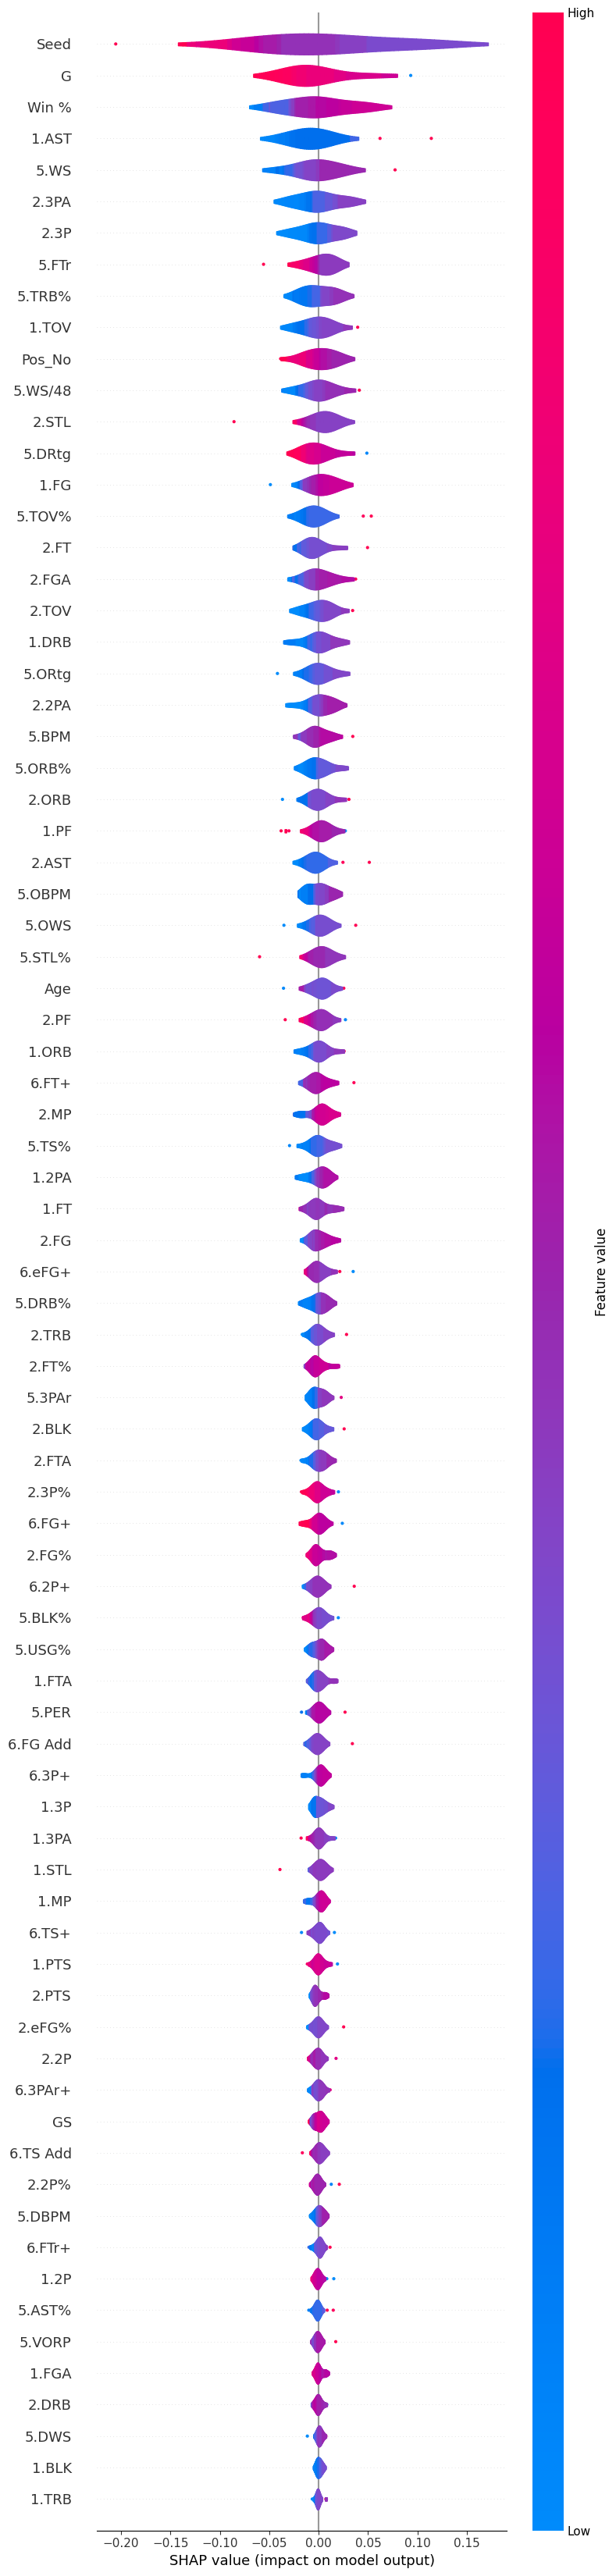

In [40]:
explainer = shap.Explainer(model.predict, normed_test_data)
shap_values = explainer(normed_test_data)
shap.summary_plot(shap_values, test, feature_names=test.columns ,plot_type='violin', max_display=len(test.columns))

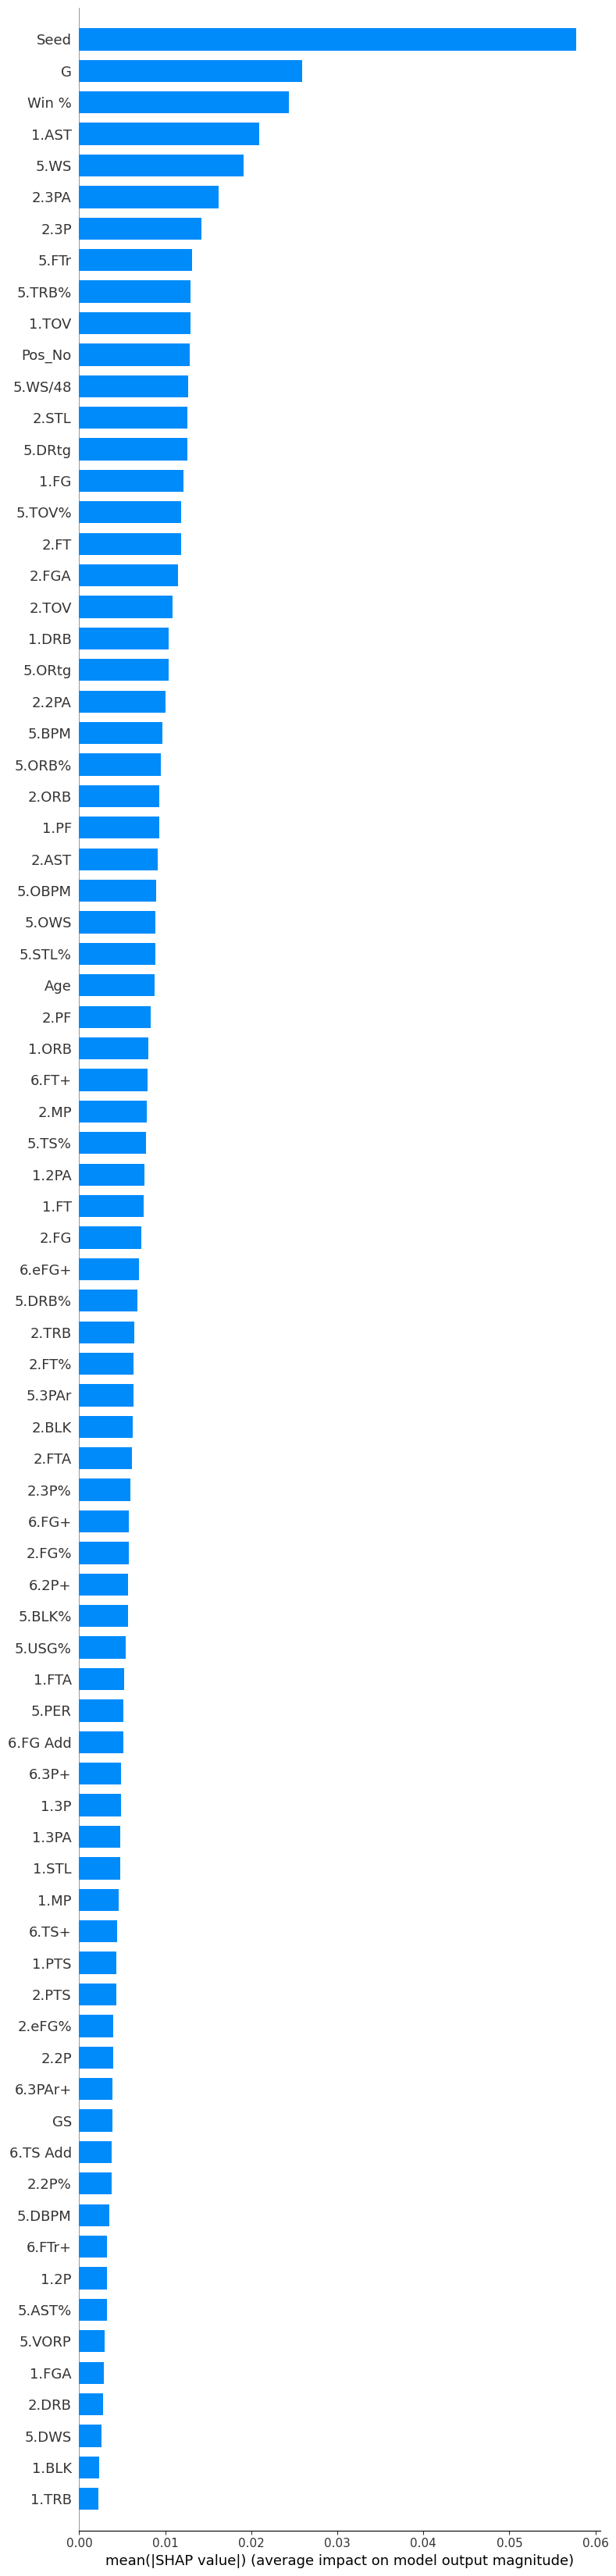

In [41]:
shap.summary_plot(shap_values, test, feature_names=test.columns ,plot_type='bar', max_display=len(test.columns))